In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Thu Dec 06 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.0-7-amd64
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit


In [1]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import os
import nolds
import data
import mne
import matplotlib.pyplot as plt

# PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
PROJ_ROOT = os.getenv('THESIS_ROOT')
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '75b.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
# data = np.transpose(data.values)
metapkl = pd.read_pickle(os.path.join(LABELED_ROOT, 'processed', 'meta', 'meta.pkl'))
metapkl

Opening raw data file /home/kovar/thesis_project/data/processed/75b.fif...
This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 35665 =      0.000 ...   142.660 secs
Ready.


<ipython-input-1-c6ac8536d630>:27: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '75b.fif'))


resp b/a sex  age  sfreq    sc  sc_bef  sc_aft  dep  dep_bef  \
patient trial                                                                
1       a        1   0   0   49    250  26.0      26      13    0        0   
        b        1   1   0   49    250  13.0      26      13   -1        0   
2       a        0   0   0   36    250  31.0      31      30    1        1   
        b        0   1   0   36    250  30.0      31      30    1        1   
3       a        1   0   0   48    250  25.0      25       7    0       -1   
        b        1   1   0   48    250   7.0      25       7   -1       -1   
4       a        0   0   0   55    250  26.0      26      25    0        0   
        b        0   1   0   55    250  25.0      26      25    0        0   
5       a        0   0   0   35    250  26.0      26      37    0        0   
        b        0   1   0   35    250  37.0      26      37    1        0   
6       a        0   0   0   37    250  31.0      31      17    1        1   
        b        0   1   0   37    250  17.0      31      17   -1        1   
7       a        0   0   0   63    250  30.0      30      25    1        1   
        b        0   1   0   63    250  25.0      30      25    0        1   
8       a        1   0   1   50    250  24.0      24      11    0       -1   
        b        1   1   1   50    250  11.0      24      11   -1       -1   
9       a        0   0   1   59    250  34.0      34      27    1        1   
        b        0   1   1   59    250  27.0      34      27    1        1   
10      a        1   0   0   49    250  36.0      36      17    1        1   
        b        1   1   0   49    250  17.0      36      17   -1        1   
11      a        0   0   1   53   1000  27.0      27      26    1        0   
        b        0   1   1   53   1000  26.0      27      26    0        0   
12      a        1   0   1   59   1000  30.0      30      12    1        1   
        b        1   1   1   59   1000  12.0      30      12   -1        1   
13      a        1   0   0   57    250  26.0      26       7    0        0   
        b        1   1   0   57    250   7.0      26       7   -1        0   
14      a        0   0   0   30    250  28.0      28      17    1        0   
        b        0   1   0   30    250  17.0      28      17   -1        0   
15      a        1   0   0   35   1000  25.0      25       3    0       -1   
        b        1   1   0   35   1000   3.0      25       3   -1       -1   
...            ...  ..  ..  ...    ...   ...     ...     ...  ...      ...   
119     a        1   0   1   61    250  23.0      23       4    0       -1   
        b        1   1   1   61    250   4.0      23       4   -1       -1   
120     a        0   0   0   41   1000  28.0      28      19    1        0   
        b        0   1   0   41   1000  19.0      28      19   -1        0   
121     a        0   0   0   34    250  24.0      24      26    0       -1   
        b        0   1   0   34    250  26.0      24      26    0       -1   
122     a        0   0   1   55    250  35.0      35      19    1        1   
        b        0   1   1   55    250  19.0      35      19   -1        1   
123     a        0   0   1   54    250  24.0      24      25    0       -1   
        b        0   1   1   54    250  25.0      24      25    0       -1   
124     a        0   0   0   52    250  30.0      30      23    1        1   
        b        0   1   0   52    250  23.0      30      23    0        1   
125     a        1   0   0   56    250  26.0      26      11    0        0   
        b        1   1   0   56    250  11.0      26      11   -1        0   
126     a        0   0   0   40    250  25.0      25      17    0       -1   
        b        0   1   0   40    250  17.0      25      17   -1       -1   
127     a        0   0   0   35    250  25.0      25      21    0       -1   
        b        0   1   0   35    250  21.0      25      21    0       -1   
128     a        1   0   0   51    2

/home/kovar/thesis_project/
Opening raw data file /home/kovar/thesis_project/data/processed/44a.fif...
This filename (/home/kovar/thesis_project/data/processed/44a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp         1
b/a          0
sex          0
age         36
sfreq      250
sc          25
sc_bef      25
sc_aft      10
dep          0
dep_bef     -1
dep_aft     -1
change     2.5
Name: (44, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/44a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


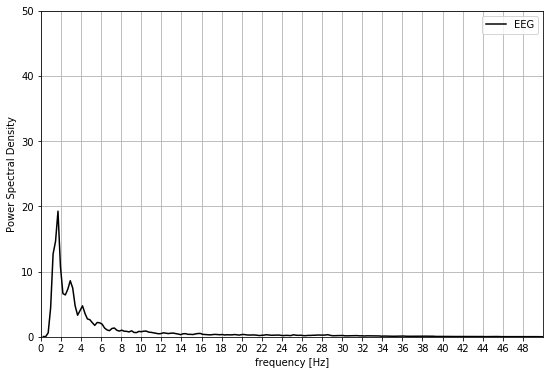

Opening raw data file /home/kovar/thesis_project/data/processed/86a.fif...
This filename (/home/kovar/thesis_project/data/processed/86a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17938 =      0.000 ...    71.752 secs
Ready.
resp             1
b/a              0
sex              0
age             30
sfreq          250
sc              35
sc_bef          35
sc_aft          17
dep              1
dep_bef          1
dep_aft          0
change     2.05882
Name: (86, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/86a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


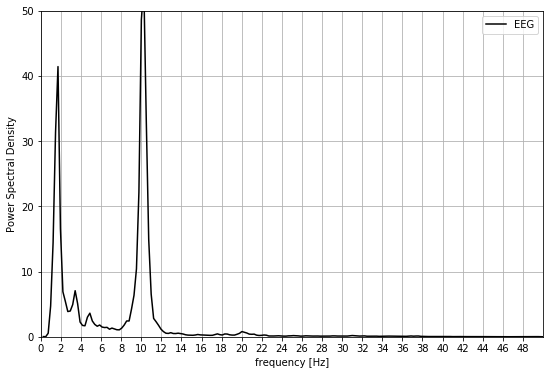

Opening raw data file /home/kovar/thesis_project/data/processed/26b.fif...
This filename (/home/kovar/thesis_project/data/processed/26b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19603 =      0.000 ...    78.412 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/26b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp            1
b/a             1
sex             0
age            50
sfreq         250
sc             16
sc_bef         33
sc_aft         16
dep            -1
dep_bef         1
dep_aft         0
change     2.0625
Name: (26, b), dtype: object


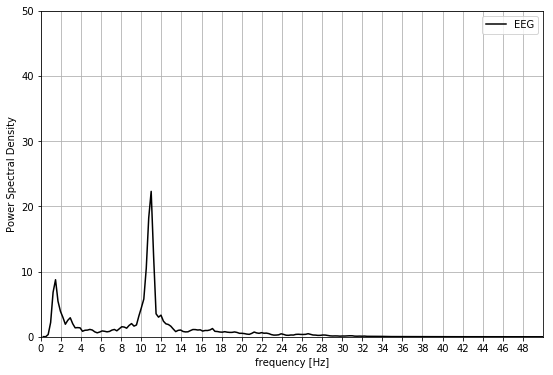

Opening raw data file /home/kovar/thesis_project/data/processed/27b.fif...
This filename (/home/kovar/thesis_project/data/processed/27b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/27b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              1
age             32
sfreq          250
sc              27
sc_bef          29
sc_aft          27
dep              1
dep_bef          0
dep_aft          1
change     1.07407
Name: (27, b), dtype: object


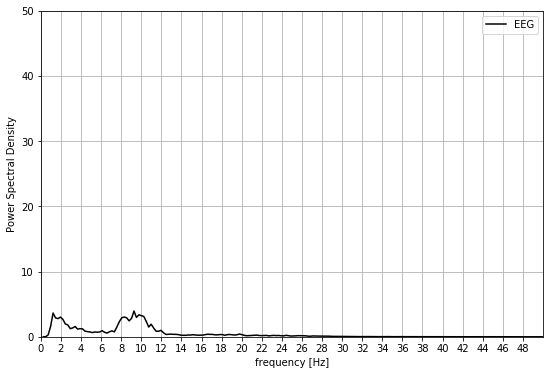

Opening raw data file /home/kovar/thesis_project/data/processed/22b.fif...
This filename (/home/kovar/thesis_project/data/processed/22b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19124 =      0.000 ...    76.496 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/22b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              1
age             58
sfreq          250
sc              27
sc_bef          36
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.33333
Name: (22, b), dtype: object


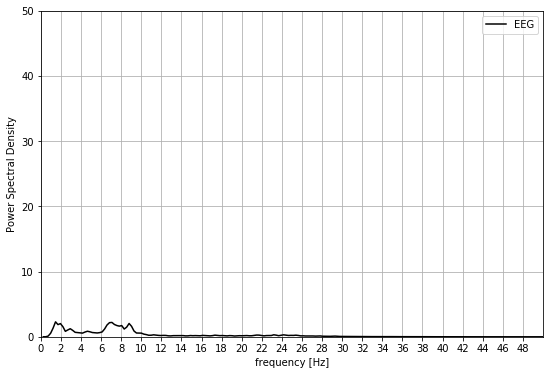

Opening raw data file /home/kovar/thesis_project/data/processed/50b.fif...
This filename (/home/kovar/thesis_project/data/processed/50b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17508 =      0.000 ...    70.032 secs
Ready.
resp             1
b/a              1
sex              1
age             48
sfreq          250
sc              11
sc_bef          29
sc_aft          11
dep             -1
dep_bef          0
dep_aft         -1
change     2.63636
Name: (50, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/50b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


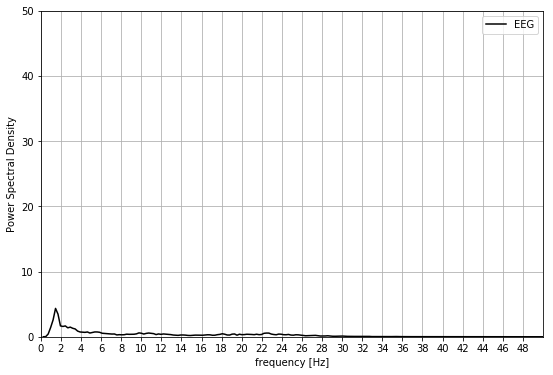

Opening raw data file /home/kovar/thesis_project/data/processed/17b.fif...
This filename (/home/kovar/thesis_project/data/processed/17b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15183 =      0.000 ...    60.732 secs
Ready.
resp             0
b/a              1
sex              0
age             53
sfreq          250
sc              18
sc_bef          34
sc_aft          18
dep             -1
dep_bef          1
dep_aft          0
change     1.88889
Name: (17, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/17b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


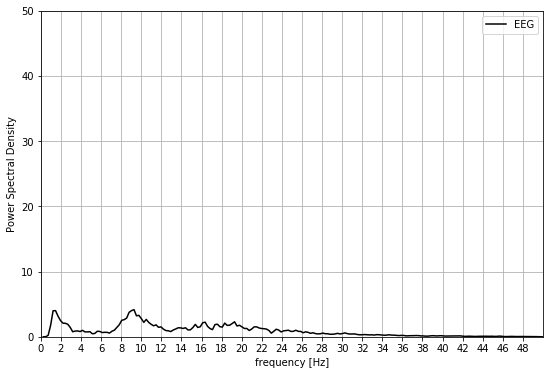

Opening raw data file /home/kovar/thesis_project/data/processed/14a.fif...
This filename (/home/kovar/thesis_project/data/processed/14a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20582 =      0.000 ...    82.328 secs
Ready.
resp             0
b/a              0
sex              0
age             30
sfreq          250
sc              28
sc_bef          28
sc_aft          17
dep              1
dep_bef          0
dep_aft          0
change     1.64706
Name: (14, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/14a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


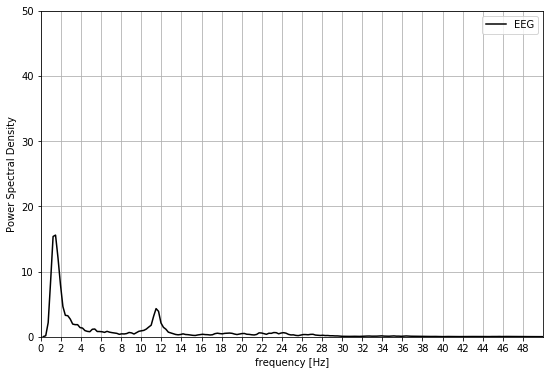

Opening raw data file /home/kovar/thesis_project/data/processed/34b.fif...
This filename (/home/kovar/thesis_project/data/processed/34b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20724 =      0.000 ...    82.896 secs
Ready.
resp             1
b/a              1
sex              0
age             42
sfreq         1000
sc              12
sc_bef          25
sc_aft          12
dep             -1
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (34, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/34b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


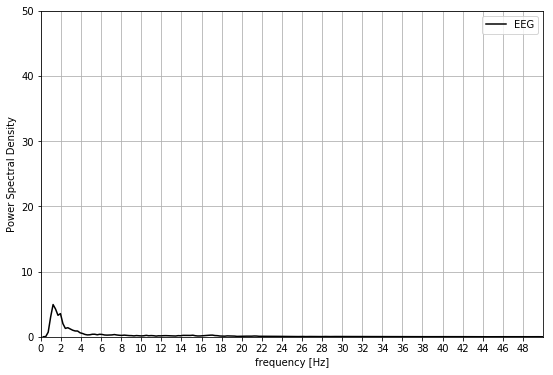

Opening raw data file /home/kovar/thesis_project/data/processed/107a.fif...
This filename (/home/kovar/thesis_project/data/processed/107a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20798 =      0.000 ...    83.192 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/107a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             1
b/a              0
sex              1
age             63
sfreq          250
sc              25
sc_bef          25
sc_aft          12
dep              0
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (107, a), dtype: object


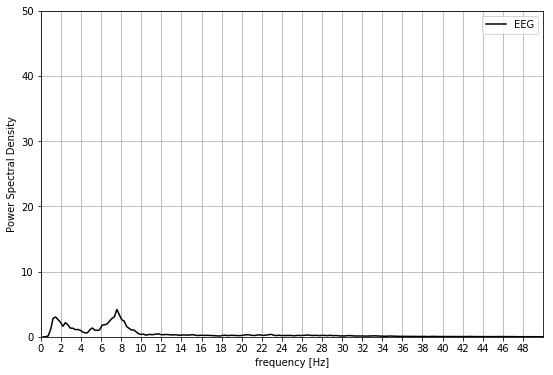

Opening raw data file /home/kovar/thesis_project/data/processed/96b.fif...
This filename (/home/kovar/thesis_project/data/processed/96b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              1
sex              0
age             63
sfreq          250
sc              13
sc_bef          20
sc_aft          13
dep             -1
dep_bef         -1
dep_aft          0
change     1.53846
Name: (96, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/96b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


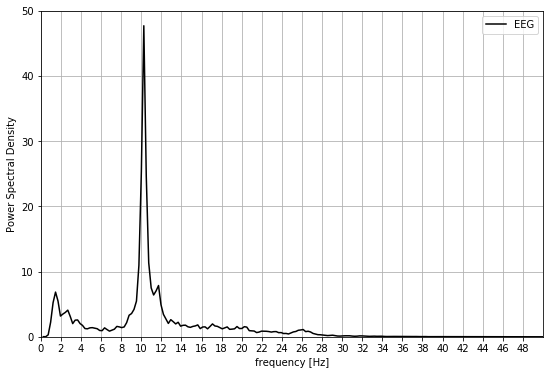

Opening raw data file /home/kovar/thesis_project/data/processed/9a.fif...
This filename (/home/kovar/thesis_project/data/processed/9a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16373 =      0.000 ...    65.492 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/9a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              1
age             59
sfreq          250
sc              34
sc_bef          34
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.25926
Name: (9, a), dtype: object


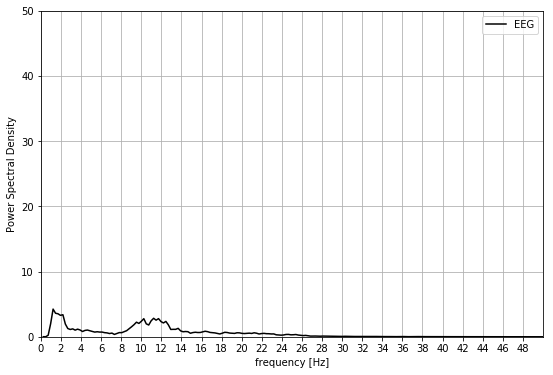

Opening raw data file /home/kovar/thesis_project/data/processed/6b.fif...
This filename (/home/kovar/thesis_project/data/processed/6b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17193 =      0.000 ...    68.772 secs
Ready.
resp             0
b/a              1
sex              0
age             37
sfreq          250
sc              17
sc_bef          31
sc_aft          17
dep             -1
dep_bef          1
dep_aft          0
change     1.82353
Name: (6, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/6b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


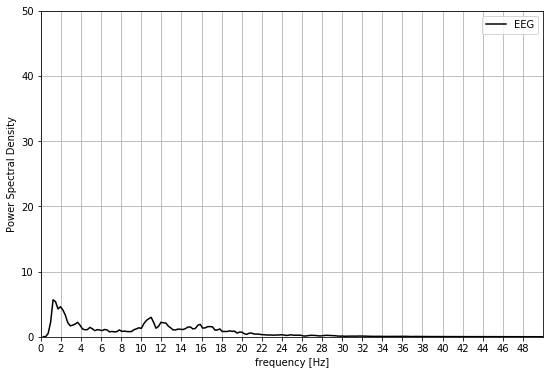

Opening raw data file /home/kovar/thesis_project/data/processed/126a.fif...
This filename (/home/kovar/thesis_project/data/processed/126a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15508 =      0.000 ...    62.032 secs
Ready.
resp             0
b/a              0
sex              0
age             40
sfreq          250
sc              25
sc_bef          25
sc_aft          17
dep              0
dep_bef         -1
dep_aft          0
change     1.47059
Name: (126, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/126a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


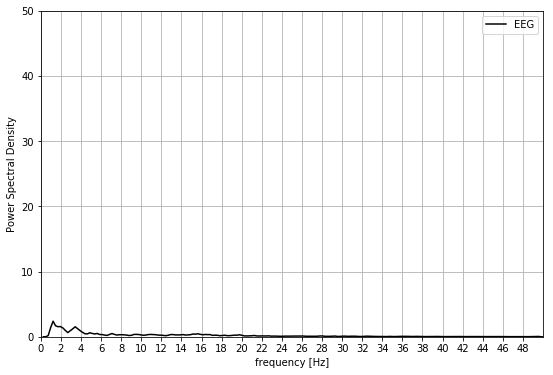

Opening raw data file /home/kovar/thesis_project/data/processed/80b.fif...
This filename (/home/kovar/thesis_project/data/processed/80b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15491 =      0.000 ...    61.964 secs
Ready.
resp             0
b/a              1
sex              0
age             38
sfreq         1000
sc              22
sc_bef          26
sc_aft          22
dep              0
dep_bef          0
dep_aft          1
change     1.18182
Name: (80, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/80b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


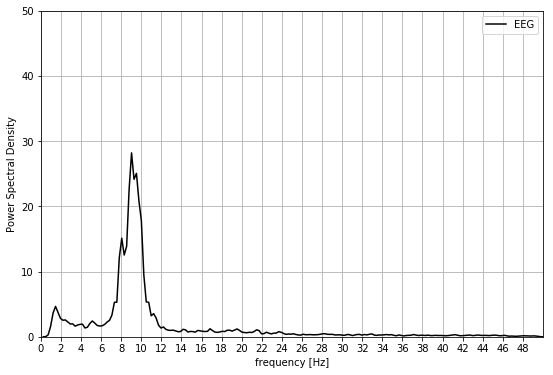

Opening raw data file /home/kovar/thesis_project/data/processed/110b.fif...
This filename (/home/kovar/thesis_project/data/processed/110b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 24394 =      0.000 ...    97.576 secs
Ready.
resp              0
b/a               1
sex               1
age              35
sfreq           250
sc               31
sc_bef           30
sc_aft           31
dep               1
dep_bef           1
dep_aft           1
change     0.967742
Name: (110, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/110b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


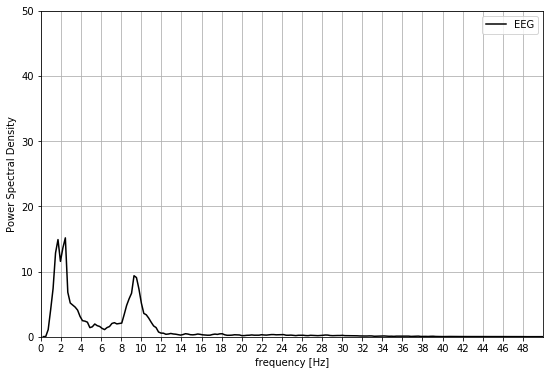

Opening raw data file /home/kovar/thesis_project/data/processed/61b.fif...
This filename (/home/kovar/thesis_project/data/processed/61b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 24442 =      0.000 ...    97.768 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/61b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp         0
b/a          1
sex          0
age         43
sfreq      250
sc          25
sc_bef      25
sc_aft      25
dep          0
dep_bef     -1
dep_aft      1
change       1
Name: (61, b), dtype: object


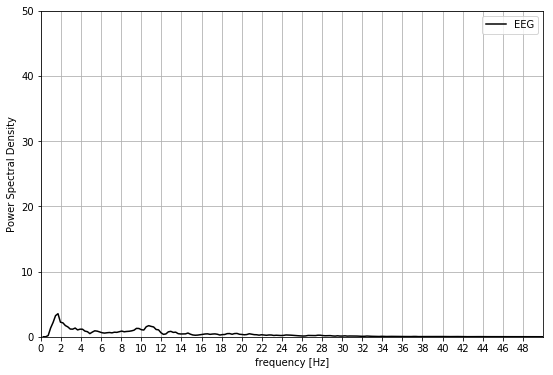

Opening raw data file /home/kovar/thesis_project/data/processed/131a.fif...
This filename (/home/kovar/thesis_project/data/processed/131a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19056 =      0.000 ...    76.224 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/131a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              0
age             35
sfreq          250
sc              25
sc_bef          25
sc_aft          17
dep              0
dep_bef         -1
dep_aft          0
change     1.47059
Name: (131, a), dtype: object


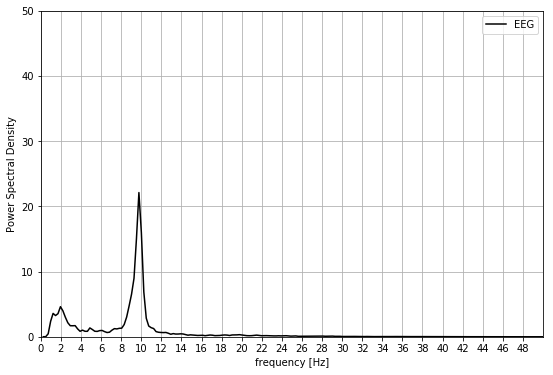

Opening raw data file /home/kovar/thesis_project/data/processed/91a.fif...
This filename (/home/kovar/thesis_project/data/processed/91a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15235 =      0.000 ...    60.940 secs
Ready.
resp             1
b/a              0
sex              0
age             51
sfreq         1000
sc              29
sc_bef          29
sc_aft          14
dep              1
dep_bef          0
dep_aft          0
change     2.07143
Name: (91, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/91a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


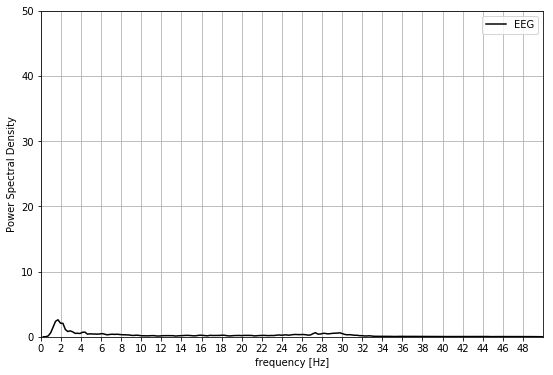

Opening raw data file /home/kovar/thesis_project/data/processed/85b.fif...
This filename (/home/kovar/thesis_project/data/processed/85b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16134 =      0.000 ...    64.536 secs
Ready.
resp             0
b/a              1
sex              0
age             34
sfreq          250
sc              18
sc_bef          21
sc_aft          18
dep             -1
dep_bef         -1
dep_aft          0
change     1.16667
Name: (85, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/85b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


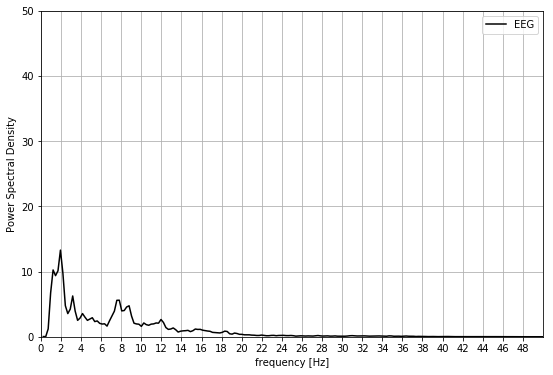

Opening raw data file /home/kovar/thesis_project/data/processed/5b.fif...
This filename (/home/kovar/thesis_project/data/processed/5b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20698 =      0.000 ...    82.792 secs
Ready.
resp              0
b/a               1
sex               0
age              35
sfreq           250
sc               37
sc_bef           26
sc_aft           37
dep               1
dep_bef           0
dep_aft           1
change     0.702703
Name: (5, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/5b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


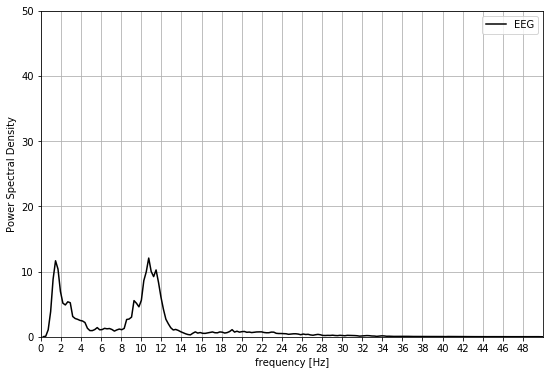

Opening raw data file /home/kovar/thesis_project/data/processed/11a.fif...
This filename (/home/kovar/thesis_project/data/processed/11a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18345 =      0.000 ...    73.380 secs
Ready.
resp             0
b/a              0
sex              1
age             53
sfreq         1000
sc              27
sc_bef          27
sc_aft          26
dep              1
dep_bef          0
dep_aft          1
change     1.03846
Name: (11, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/11a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


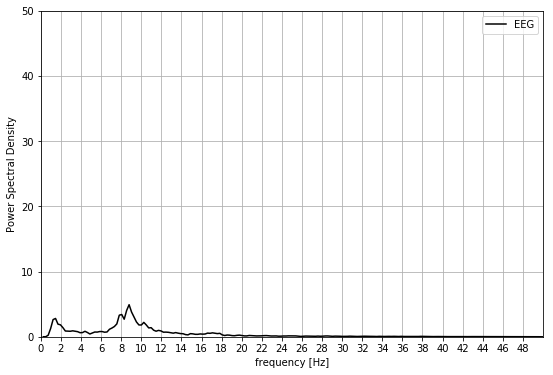

Opening raw data file /home/kovar/thesis_project/data/processed/61a.fif...
This filename (/home/kovar/thesis_project/data/processed/61a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19380 =      0.000 ...    77.520 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/61a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp         0
b/a          0
sex          0
age         43
sfreq      250
sc          25
sc_bef      25
sc_aft      25
dep          0
dep_bef     -1
dep_aft      1
change       1
Name: (61, a), dtype: object


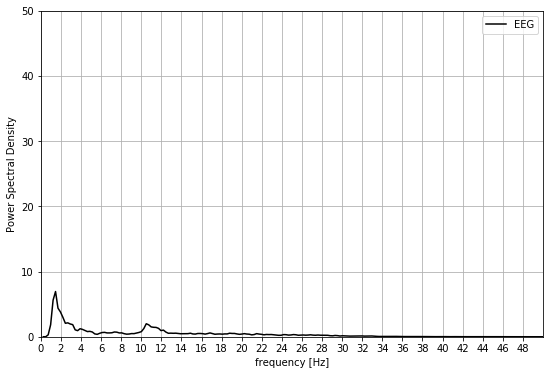

Opening raw data file /home/kovar/thesis_project/data/processed/94b.fif...
This filename (/home/kovar/thesis_project/data/processed/94b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19187 =      0.000 ...    76.748 secs
Ready.
resp             0
b/a              1
sex              0
age             55
sfreq          250
sc              28
sc_bef          34
sc_aft          28
dep              1
dep_bef          1
dep_aft          1
change     1.21429
Name: (94, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/94b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


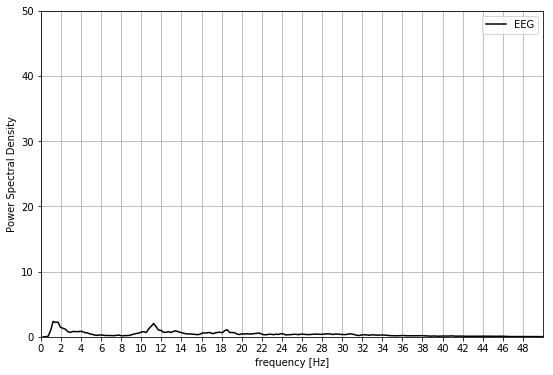

Opening raw data file /home/kovar/thesis_project/data/processed/79b.fif...
This filename (/home/kovar/thesis_project/data/processed/79b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 28767 =      0.000 ...   115.068 secs
Ready.
resp             0
b/a              1
sex              0
age             47
sfreq         1000
sc              19
sc_bef          25
sc_aft          19
dep             -1
dep_bef         -1
dep_aft          0
change     1.31579
Name: (79, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/79b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


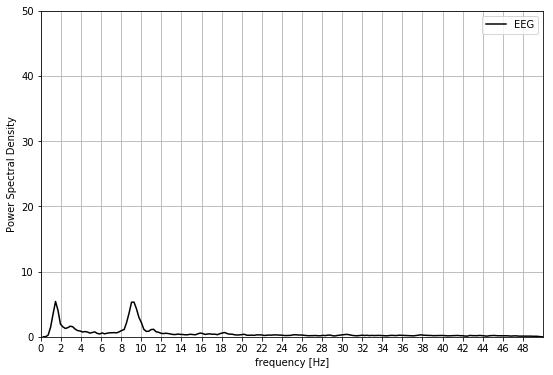

Opening raw data file /home/kovar/thesis_project/data/processed/38b.fif...
This filename (/home/kovar/thesis_project/data/processed/38b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19004 =      0.000 ...    76.016 secs
Ready.
resp             0
b/a              1
sex              0
age             55
sfreq          250
sc              19
sc_bef          29
sc_aft          19
dep             -1
dep_bef          0
dep_aft          0
change     1.52632
Name: (38, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/38b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


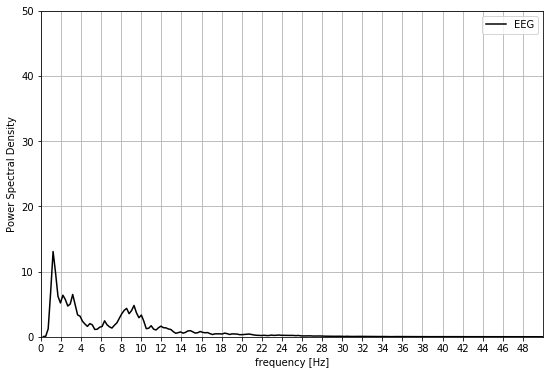

Opening raw data file /home/kovar/thesis_project/data/processed/73b.fif...
This filename (/home/kovar/thesis_project/data/processed/73b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 27294 =      0.000 ...   109.176 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/73b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             53
sfreq          250
sc              18
sc_bef          23
sc_aft          18
dep             -1
dep_bef         -1
dep_aft          0
change     1.27778
Name: (73, b), dtype: object


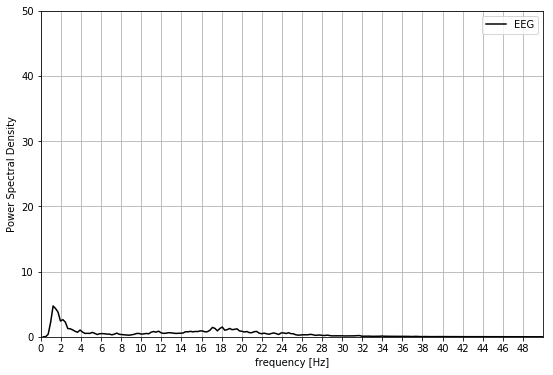

Opening raw data file /home/kovar/thesis_project/data/processed/51a.fif...
This filename (/home/kovar/thesis_project/data/processed/51a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/51a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              1
age             52
sfreq          250
sc              25
sc_bef          25
sc_aft          22
dep              0
dep_bef         -1
dep_aft          1
change     1.13636
Name: (51, a), dtype: object


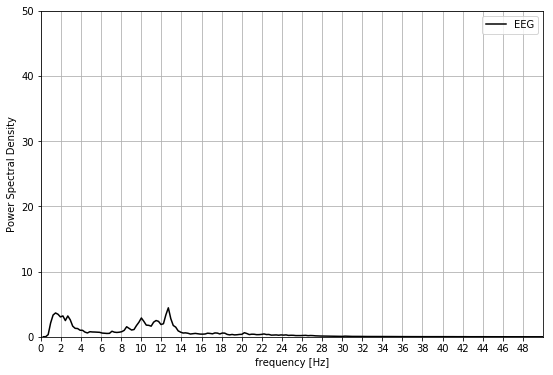

Opening raw data file /home/kovar/thesis_project/data/processed/96a.fif...
This filename (/home/kovar/thesis_project/data/processed/96a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20144 =      0.000 ...    80.576 secs
Ready.
resp             0
b/a              0
sex              0
age             63
sfreq          250
sc              20
sc_bef          20
sc_aft          13
dep              0
dep_bef         -1
dep_aft          0
change     1.53846
Name: (96, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/96a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


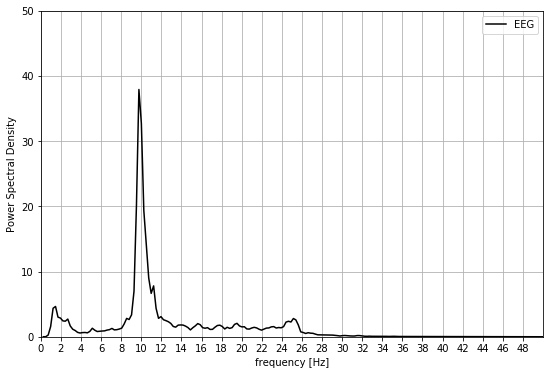

Opening raw data file /home/kovar/thesis_project/data/processed/35a.fif...
This filename (/home/kovar/thesis_project/data/processed/35a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              0
sex              0
age             34
sfreq          250
sc              25
sc_bef          25
sc_aft          15
dep              0
dep_bef         -1
dep_aft          0
change     1.66667
Name: (35, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/35a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


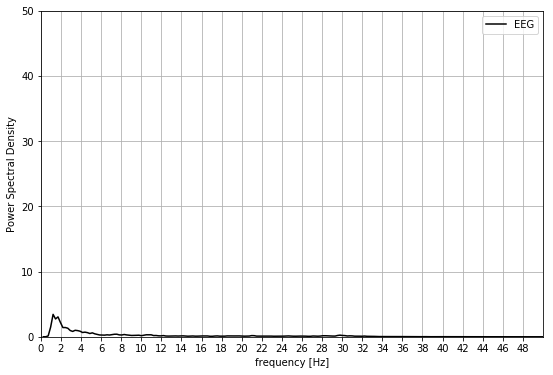

Opening raw data file /home/kovar/thesis_project/data/processed/78a.fif...
This filename (/home/kovar/thesis_project/data/processed/78a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15350 =      0.000 ...    61.400 secs
Ready.
resp             0
b/a              0
sex              0
age             54
sfreq          250
sc              27
sc_bef          27
sc_aft          19
dep              1
dep_bef          0
dep_aft          0
change     1.42105
Name: (78, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/78a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


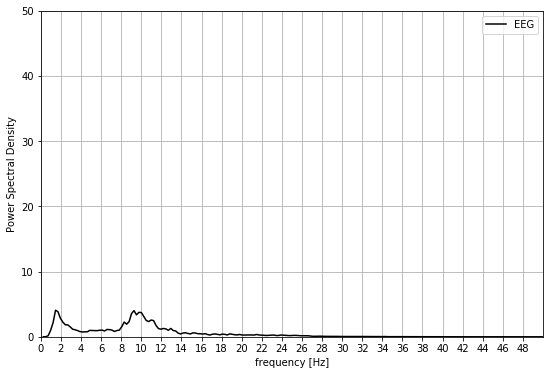

Opening raw data file /home/kovar/thesis_project/data/processed/95a.fif...
This filename (/home/kovar/thesis_project/data/processed/95a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16262 =      0.000 ...    65.048 secs
Ready.
resp             0
b/a              0
sex              0
age             45
sfreq          250
sc              29
sc_bef          29
sc_aft          18
dep              1
dep_bef          0
dep_aft          0
change     1.61111
Name: (95, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/95a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


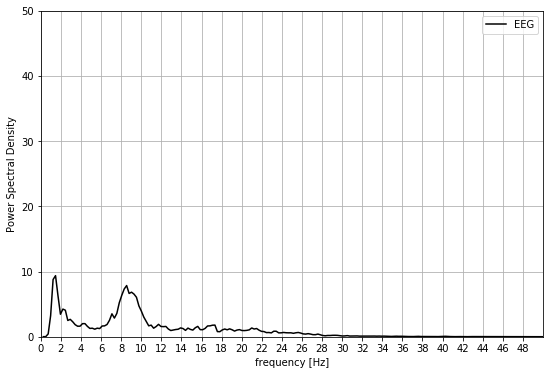

Opening raw data file /home/kovar/thesis_project/data/processed/85a.fif...
This filename (/home/kovar/thesis_project/data/processed/85a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 5887 =      0.000 ...    23.548 secs
Ready.
resp             0
b/a              0
sex              0
age             34
sfreq          250
sc              21
sc_bef          21
sc_aft          18
dep              0
dep_bef         -1
dep_aft          0
change     1.16667
Name: (85, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/85a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


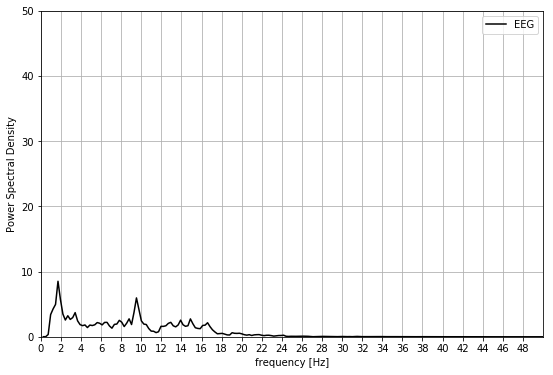

Opening raw data file /home/kovar/thesis_project/data/processed/7b.fif...
This filename (/home/kovar/thesis_project/data/processed/7b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15162 =      0.000 ...    60.648 secs
Ready.
resp         0
b/a          1
sex          0
age         63
sfreq      250
sc          25
sc_bef      30
sc_aft      25
dep          0
dep_bef      1
dep_aft      1
change     1.2
Name: (7, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/7b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


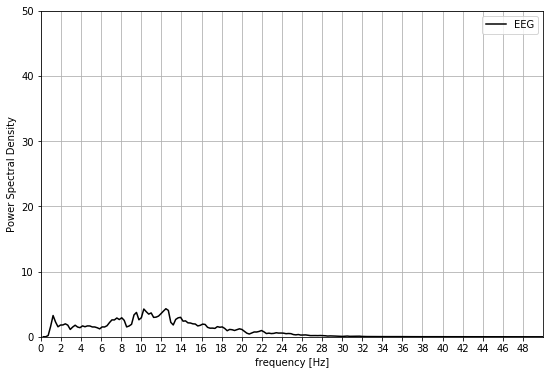

Opening raw data file /home/kovar/thesis_project/data/processed/53b.fif...
This filename (/home/kovar/thesis_project/data/processed/53b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15008 =      0.000 ...    60.032 secs
Ready.
resp             0
b/a              1
sex              0
age             51
sfreq          250
sc              18
sc_bef          31
sc_aft          18
dep             -1
dep_bef          1
dep_aft          0
change     1.72222
Name: (53, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/53b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


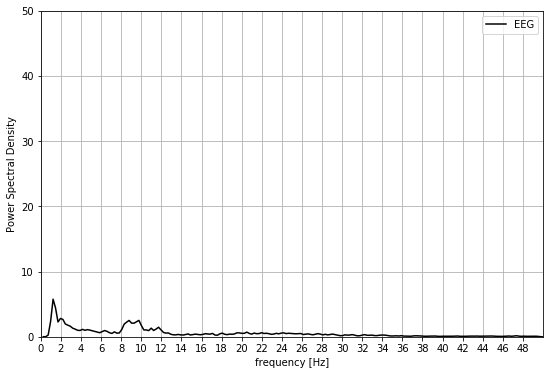

Opening raw data file /home/kovar/thesis_project/data/processed/25b.fif...
This filename (/home/kovar/thesis_project/data/processed/25b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19351 =      0.000 ...    77.404 secs
Ready.
resp             1
b/a              1
sex              0
age             41
sfreq          250
sc              12
sc_bef          26
sc_aft          12
dep             -1
dep_bef          0
dep_aft         -1
change     2.16667
Name: (25, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/25b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


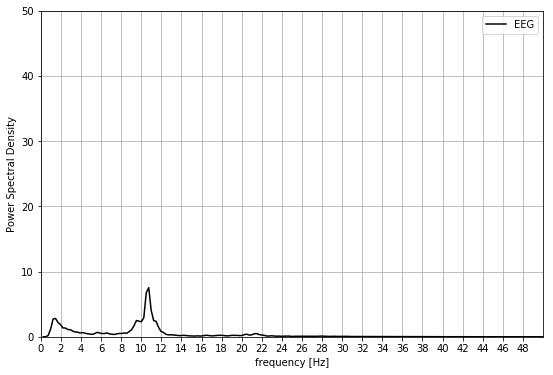

Opening raw data file /home/kovar/thesis_project/data/processed/80a.fif...
This filename (/home/kovar/thesis_project/data/processed/80a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20313 =      0.000 ...    81.252 secs
Ready.
resp             0
b/a              0
sex              0
age             38
sfreq         1000
sc              26
sc_bef          26
sc_aft          22
dep              0
dep_bef          0
dep_aft          1
change     1.18182
Name: (80, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/80a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


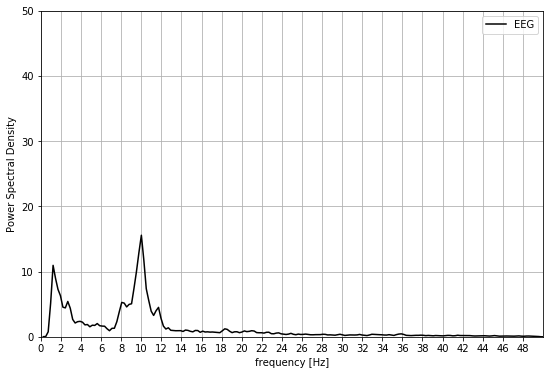

Opening raw data file /home/kovar/thesis_project/data/processed/112b.fif...
This filename (/home/kovar/thesis_project/data/processed/112b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20195 =      0.000 ...    80.780 secs
Ready.
resp             0
b/a              1
sex              1
age             54
sfreq          250
sc              22
sc_bef          36
sc_aft          22
dep              0
dep_bef          1
dep_aft          1
change     1.63636
Name: (112, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/112b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


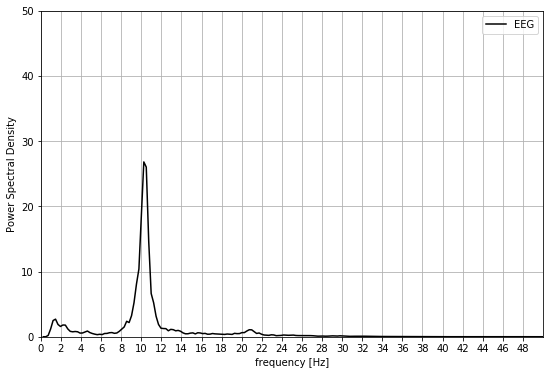

Opening raw data file /home/kovar/thesis_project/data/processed/122b.fif...
This filename (/home/kovar/thesis_project/data/processed/122b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18156 =      0.000 ...    72.624 secs
Ready.
resp             0
b/a              1
sex              1
age             55
sfreq          250
sc              19
sc_bef          35
sc_aft          19
dep             -1
dep_bef          1
dep_aft          0
change     1.84211
Name: (122, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/122b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


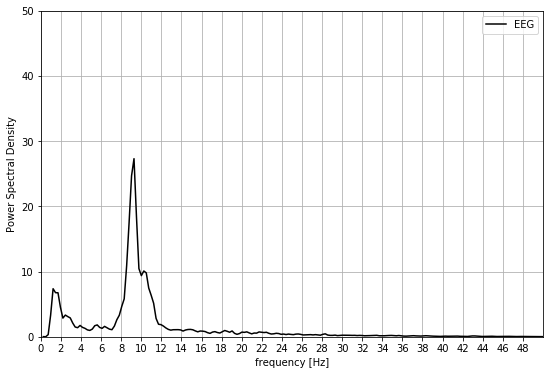

Opening raw data file /home/kovar/thesis_project/data/processed/49a.fif...
This filename (/home/kovar/thesis_project/data/processed/49a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21860 =      0.000 ...    87.440 secs
Ready.
resp             0
b/a              0
sex              0
age             31
sfreq          250
sc              34
sc_bef          34
sc_aft          30
dep              1
dep_bef          1
dep_aft          1
change     1.13333
Name: (49, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/49a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


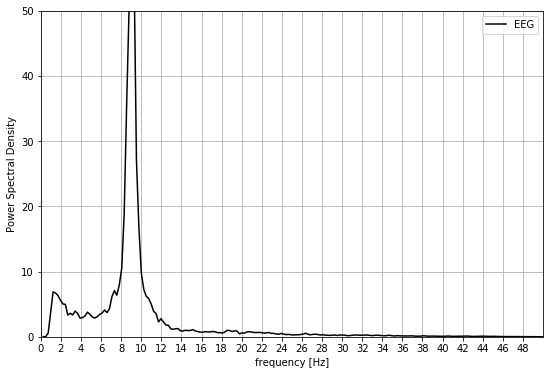

Opening raw data file /home/kovar/thesis_project/data/processed/90b.fif...
This filename (/home/kovar/thesis_project/data/processed/90b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 10098 =      0.000 ...    40.392 secs
Ready.
resp         1
b/a          1
sex          0
age         57
sfreq      250
sc           2
sc_bef      28
sc_aft       2
dep         -1
dep_bef      0
dep_aft     -1
change      14
Name: (90, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/90b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


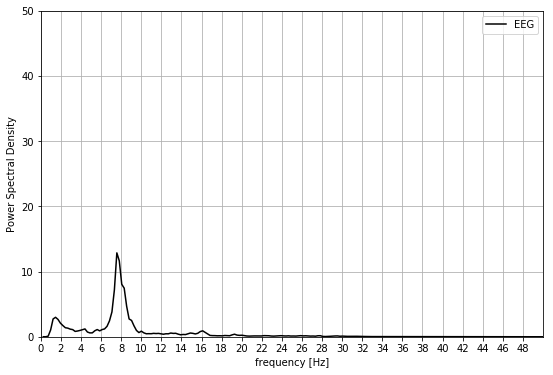

Opening raw data file /home/kovar/thesis_project/data/processed/12a.fif...
This filename (/home/kovar/thesis_project/data/processed/12a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp          1
b/a           0
sex           1
age          59
sfreq      1000
sc           30
sc_bef       30
sc_aft       12
dep           1
dep_bef       1
dep_aft      -1
change      2.5
Name: (12, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/12a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


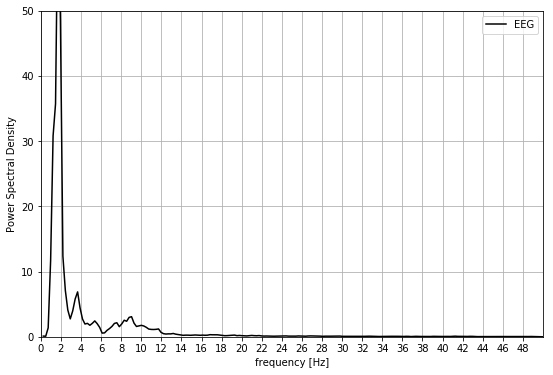

Opening raw data file /home/kovar/thesis_project/data/processed/11b.fif...
This filename (/home/kovar/thesis_project/data/processed/11b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21319 =      0.000 ...    85.276 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/11b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              1
age             53
sfreq         1000
sc              26
sc_bef          27
sc_aft          26
dep              0
dep_bef          0
dep_aft          1
change     1.03846
Name: (11, b), dtype: object


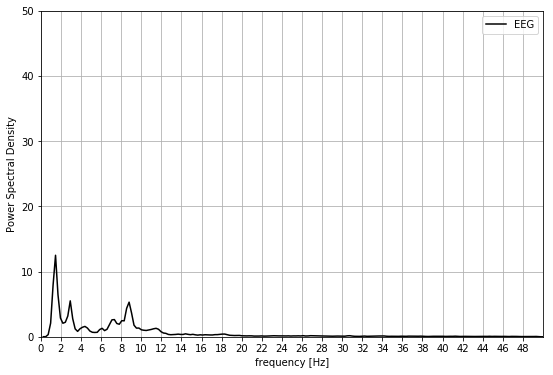

Opening raw data file /home/kovar/thesis_project/data/processed/21a.fif...
This filename (/home/kovar/thesis_project/data/processed/21a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 7743 =      0.000 ...    30.972 secs
Ready.
resp             0
b/a              0
sex              0
age             49
sfreq          250
sc              34
sc_bef          34
sc_aft          23
dep              1
dep_bef          1
dep_aft          1
change     1.47826
Name: (21, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/21a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


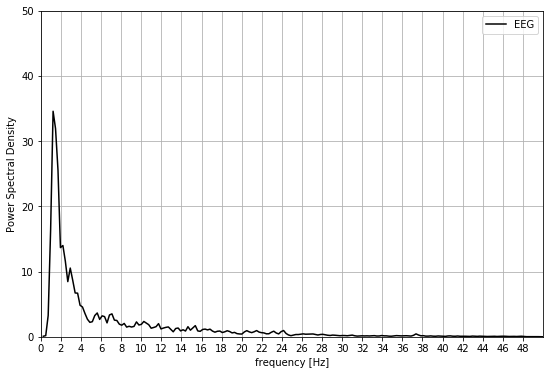

Opening raw data file /home/kovar/thesis_project/data/processed/71b.fif...
This filename (/home/kovar/thesis_project/data/processed/71b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 25438 =      0.000 ...   101.752 secs
Ready.
resp         1
b/a          1
sex          0
age         41
sfreq      250
sc           5
sc_bef      23
sc_aft       5
dep         -1
dep_bef     -1
dep_aft     -1
change     4.6
Name: (71, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/71b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


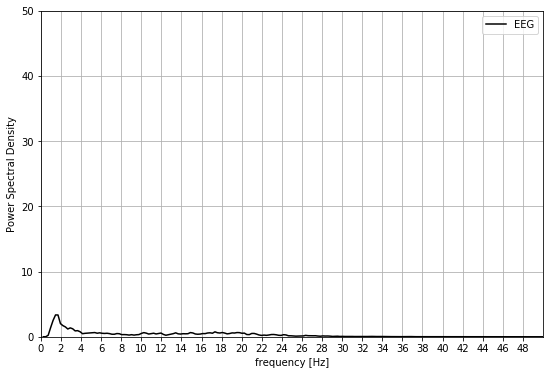

Opening raw data file /home/kovar/thesis_project/data/processed/18b.fif...
This filename (/home/kovar/thesis_project/data/processed/18b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16754 =      0.000 ...    67.016 secs
Ready.
resp             1
b/a              1
sex              0
age             60
sfreq         1000
sc              13
sc_bef          32
sc_aft          13
dep             -1
dep_bef          1
dep_aft          0
change     2.46154
Name: (18, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/18b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


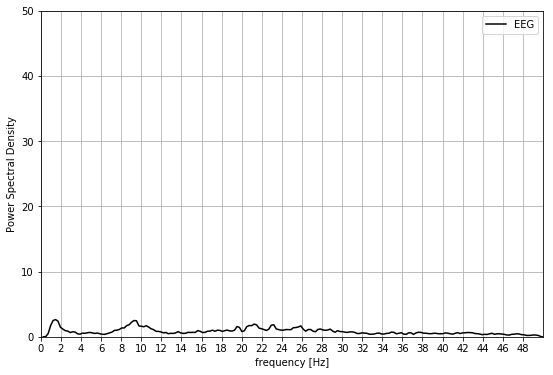

Opening raw data file /home/kovar/thesis_project/data/processed/10b.fif...
This filename (/home/kovar/thesis_project/data/processed/10b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18777 =      0.000 ...    75.108 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/10b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             1
b/a              1
sex              0
age             49
sfreq          250
sc              17
sc_bef          36
sc_aft          17
dep             -1
dep_bef          1
dep_aft          0
change     2.11765
Name: (10, b), dtype: object


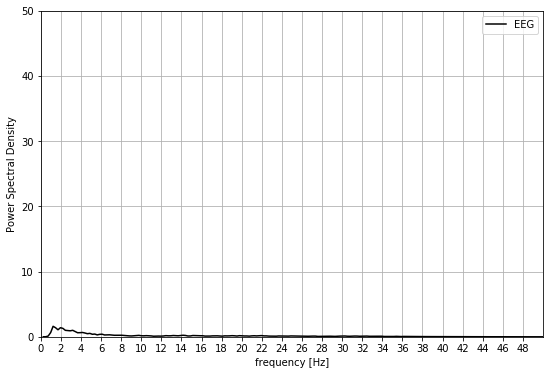

Opening raw data file /home/kovar/thesis_project/data/processed/118a.fif...
This filename (/home/kovar/thesis_project/data/processed/118a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18484 =      0.000 ...    73.936 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/118a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             1
b/a              0
sex              0
age             38
sfreq          250
sc              22
sc_bef          22
sc_aft           7
dep              0
dep_bef         -1
dep_aft         -1
change     3.14286
Name: (118, a), dtype: object


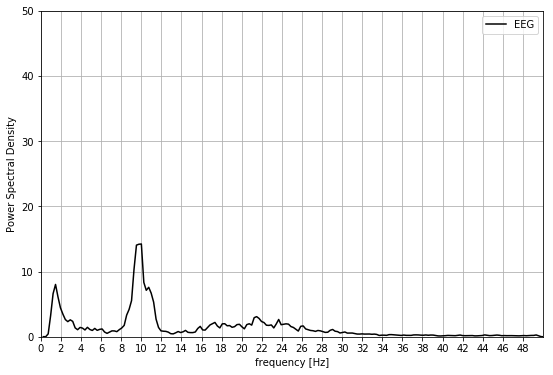

Opening raw data file /home/kovar/thesis_project/data/processed/4a.fif...
This filename (/home/kovar/thesis_project/data/processed/4a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15327 =      0.000 ...    61.308 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/4a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp          0
b/a           0
sex           0
age          55
sfreq       250
sc           26
sc_bef       26
sc_aft       25
dep           0
dep_bef       0
dep_aft       1
change     1.04
Name: (4, a), dtype: object


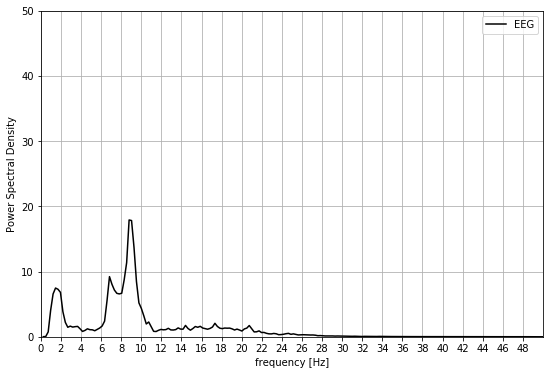

Opening raw data file /home/kovar/thesis_project/data/processed/113a.fif...
This filename (/home/kovar/thesis_project/data/processed/113a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/113a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp              0
b/a               0
sex               1
age              59
sfreq          1000
sc               31
sc_bef           31
sc_aft           36
dep               1
dep_bef           1
dep_aft           1
change     0.861111
Name: (113, a), dtype: object


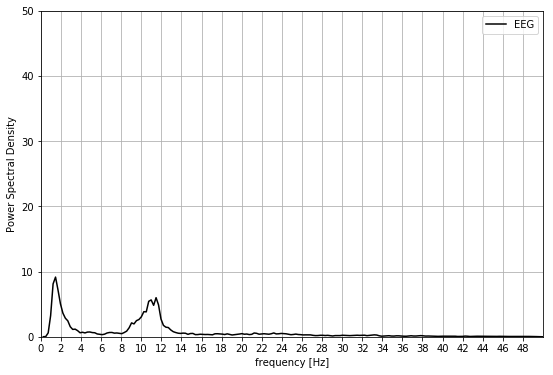

Opening raw data file /home/kovar/thesis_project/data/processed/15a.fif...
This filename (/home/kovar/thesis_project/data/processed/15a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21716 =      0.000 ...    86.864 secs
Ready.
resp             1
b/a              0
sex              0
age             35
sfreq         1000
sc              25
sc_bef          25
sc_aft           3
dep              0
dep_bef         -1
dep_aft         -1
change     8.33333
Name: (15, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/15a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


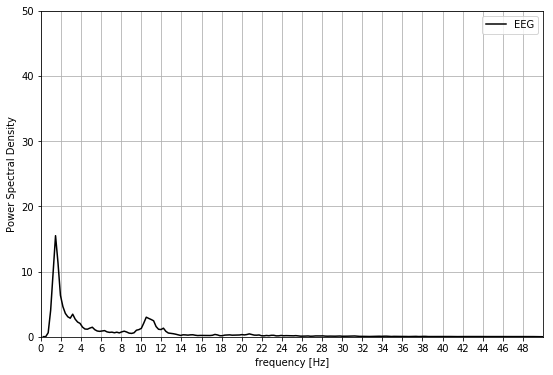

Opening raw data file /home/kovar/thesis_project/data/processed/60a.fif...
This filename (/home/kovar/thesis_project/data/processed/60a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17034 =      0.000 ...    68.136 secs
Ready.
resp             0
b/a              0
sex              0
age             44
sfreq         1000
sc              26
sc_bef          26
sc_aft          22
dep              0
dep_bef          0
dep_aft          1
change     1.18182
Name: (60, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/60a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


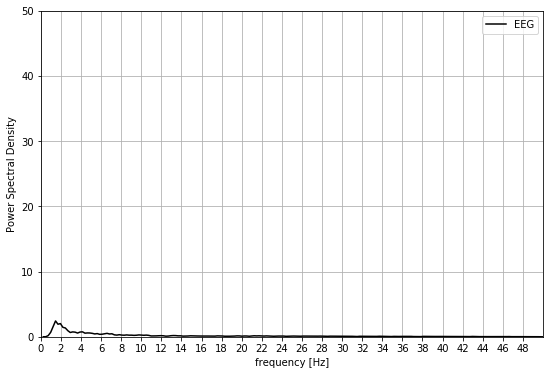

Opening raw data file /home/kovar/thesis_project/data/processed/65a.fif...
This filename (/home/kovar/thesis_project/data/processed/65a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19621 =      0.000 ...    78.484 secs
Ready.
resp            0
b/a             0
sex             0
age            46
sfreq         250
sc             23
sc_bef         23
sc_aft         16
dep             0
dep_bef        -1
dep_aft         0
change     1.4375
Name: (65, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/65a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


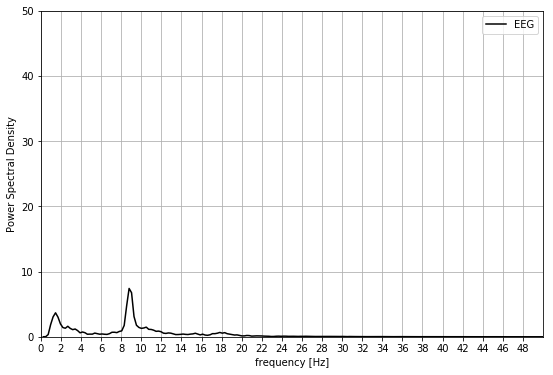

Opening raw data file /home/kovar/thesis_project/data/processed/124b.fif...
This filename (/home/kovar/thesis_project/data/processed/124b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 29934 =      0.000 ...   119.736 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/124b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             52
sfreq          250
sc              23
sc_bef          30
sc_aft          23
dep              0
dep_bef          1
dep_aft          1
change     1.30435
Name: (124, b), dtype: object


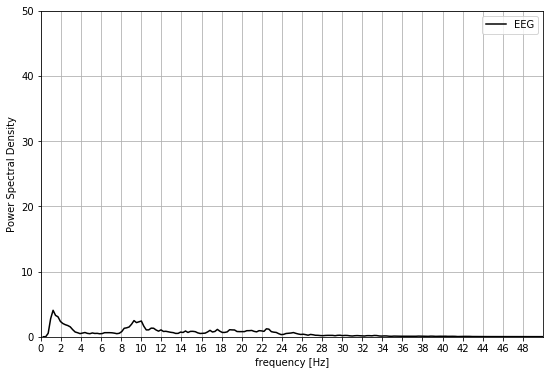

Opening raw data file /home/kovar/thesis_project/data/processed/55a.fif...
This filename (/home/kovar/thesis_project/data/processed/55a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19300 =      0.000 ...    77.200 secs
Ready.
resp         0
b/a          0
sex          0
age         59
sfreq      250
sc          32
sc_bef      32
sc_aft      32
dep          1
dep_bef      1
dep_aft      1
change       1
Name: (55, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/55a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


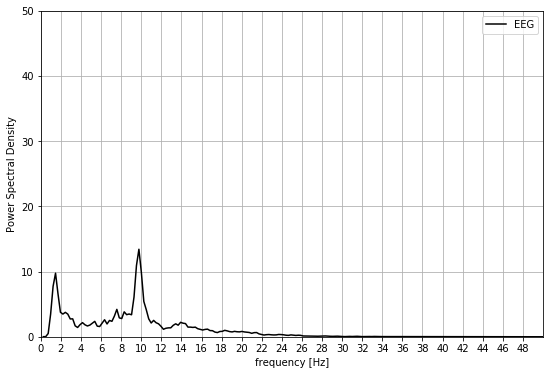

Opening raw data file /home/kovar/thesis_project/data/processed/42a.fif...
This filename (/home/kovar/thesis_project/data/processed/42a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20327 =      0.000 ...    81.308 secs
Ready.
resp             0
b/a              0
sex              0
age             61
sfreq         1000
sc              28
sc_bef          28
sc_aft          17
dep              1
dep_bef          0
dep_aft          0
change     1.64706
Name: (42, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/42a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


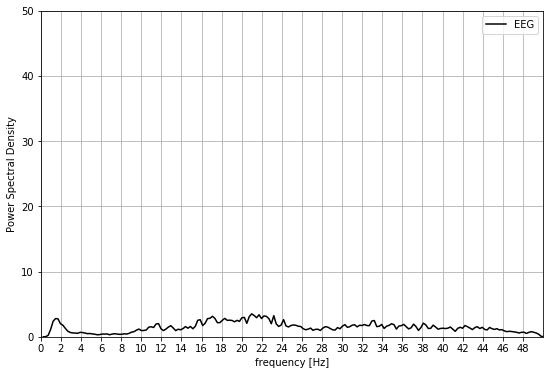

Opening raw data file /home/kovar/thesis_project/data/processed/59b.fif...
This filename (/home/kovar/thesis_project/data/processed/59b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21931 =      0.000 ...    87.724 secs
Ready.
resp             0
b/a              1
sex              1
age             42
sfreq         1000
sc              23
sc_bef          29
sc_aft          23
dep              0
dep_bef          0
dep_aft          1
change     1.26087
Name: (59, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/59b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


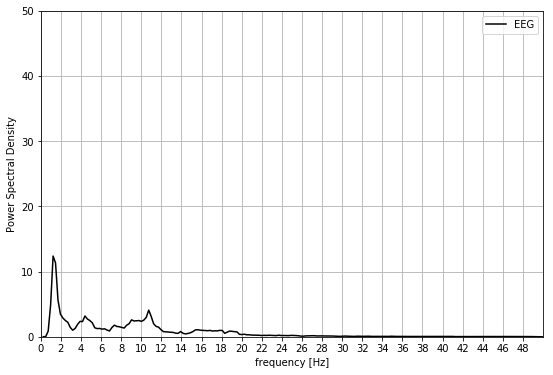

Opening raw data file /home/kovar/thesis_project/data/processed/8b.fif...
This filename (/home/kovar/thesis_project/data/processed/8b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18645 =      0.000 ...    74.580 secs
Ready.
resp             1
b/a              1
sex              1
age             50
sfreq          250
sc              11
sc_bef          24
sc_aft          11
dep             -1
dep_bef         -1
dep_aft         -1
change     2.18182
Name: (8, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/8b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


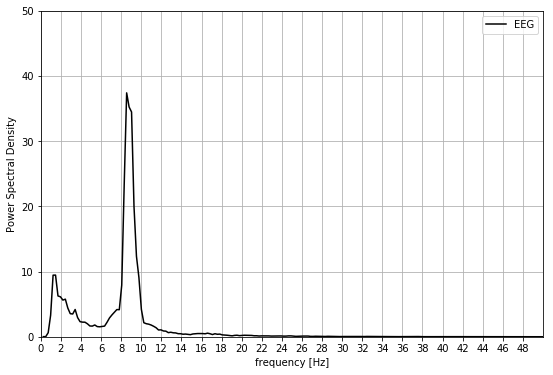

Opening raw data file /home/kovar/thesis_project/data/processed/54b.fif...
This filename (/home/kovar/thesis_project/data/processed/54b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20654 =      0.000 ...    82.616 secs
Ready.
resp             0
b/a              1
sex              0
age             49
sfreq          250
sc              26
sc_bef          36
sc_aft          26
dep              0
dep_bef          1
dep_aft          1
change     1.38462
Name: (54, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/54b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


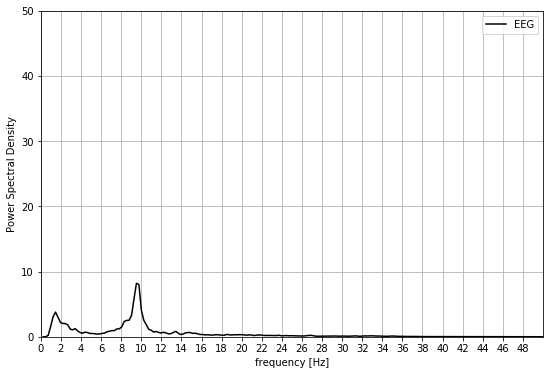

Opening raw data file /home/kovar/thesis_project/data/processed/62a.fif...
This filename (/home/kovar/thesis_project/data/processed/62a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20123 =      0.000 ...    80.492 secs
Ready.
resp         1
b/a          0
sex          0
age         34
sfreq      250
sc          23
sc_bef      23
sc_aft      10
dep          0
dep_bef     -1
dep_aft     -1
change     2.3
Name: (62, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/62a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


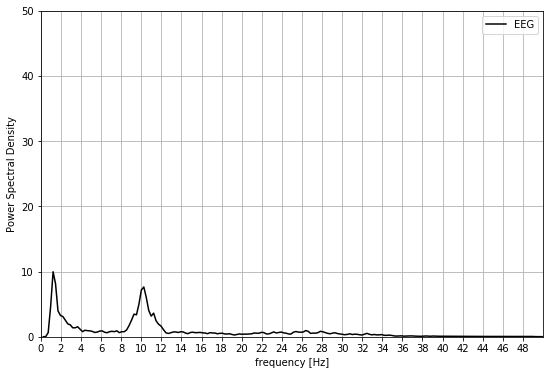

Opening raw data file /home/kovar/thesis_project/data/processed/106a.fif...
This filename (/home/kovar/thesis_project/data/processed/106a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21133 =      0.000 ...    84.532 secs
Ready.
resp             1
b/a              0
sex              0
age             35
sfreq          250
sc              31
sc_bef          31
sc_aft           7
dep              1
dep_bef          1
dep_aft         -1
change     4.42857
Name: (106, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/106a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


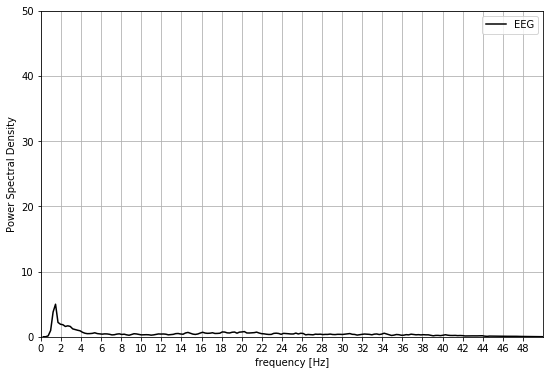

Opening raw data file /home/kovar/thesis_project/data/processed/63a.fif...
This filename (/home/kovar/thesis_project/data/processed/63a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15767 =      0.000 ...    63.068 secs
Ready.
resp          1
b/a           0
sex           1
age          65
sfreq      1000
sc           26
sc_bef       26
sc_aft        4
dep           0
dep_bef       0
dep_aft      -1
change      6.5
Name: (63, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/63a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


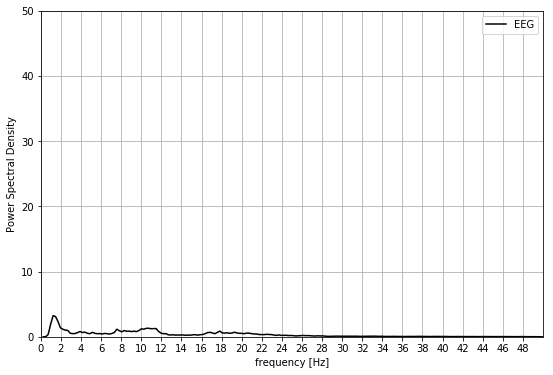

Opening raw data file /home/kovar/thesis_project/data/processed/41a.fif...
This filename (/home/kovar/thesis_project/data/processed/41a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20905 =      0.000 ...    83.620 secs
Ready.
resp             0
b/a              0
sex              0
age             59
sfreq         1000
sc              29
sc_bef          29
sc_aft          19
dep              1
dep_bef          0
dep_aft          0
change     1.52632
Name: (41, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/41a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


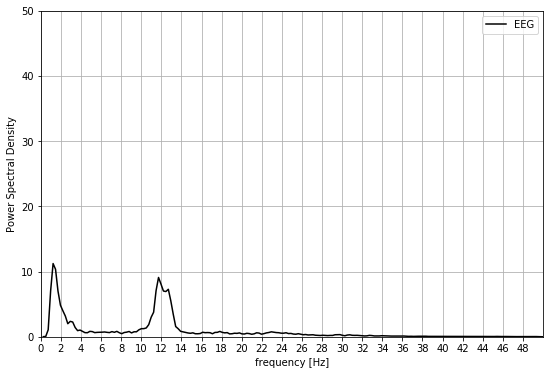

Opening raw data file /home/kovar/thesis_project/data/processed/119a.fif...
This filename (/home/kovar/thesis_project/data/processed/119a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23879 =      0.000 ...    95.516 secs
Ready.
resp          1
b/a           0
sex           1
age          61
sfreq       250
sc           23
sc_bef       23
sc_aft        4
dep           0
dep_bef      -1
dep_aft      -1
change     5.75
Name: (119, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/119a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


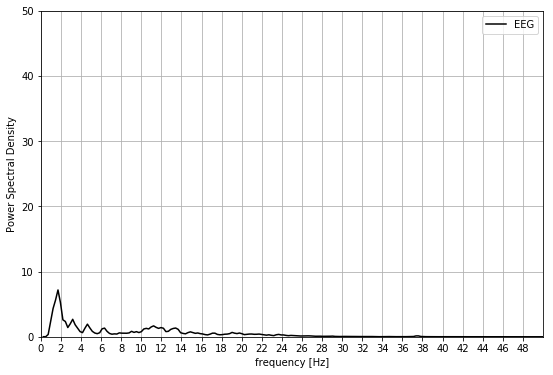

Opening raw data file /home/kovar/thesis_project/data/processed/54a.fif...
This filename (/home/kovar/thesis_project/data/processed/54a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              0
sex              0
age             49
sfreq          250
sc              36
sc_bef          36
sc_aft          26
dep              1
dep_bef          1
dep_aft          1
change     1.38462
Name: (54, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/54a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


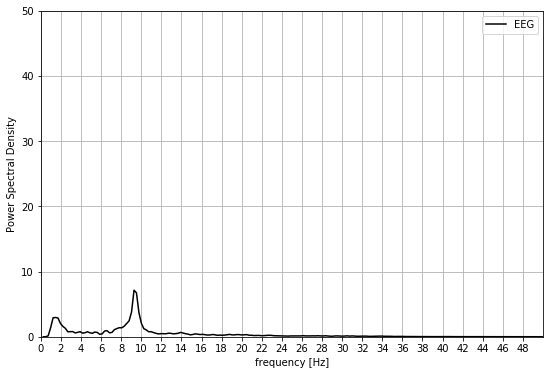

Opening raw data file /home/kovar/thesis_project/data/processed/22a.fif...
This filename (/home/kovar/thesis_project/data/processed/22a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16337 =      0.000 ...    65.348 secs
Ready.
resp             0
b/a              0
sex              1
age             58
sfreq          250
sc              36
sc_bef          36
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.33333
Name: (22, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/22a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


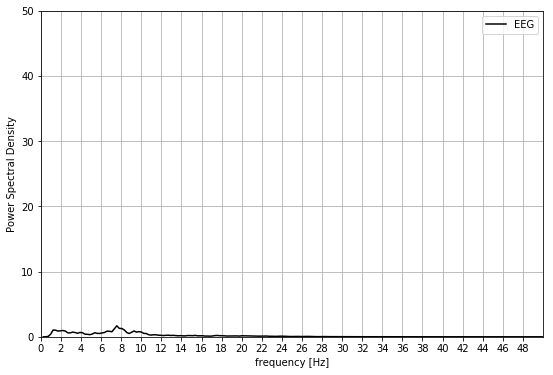

Opening raw data file /home/kovar/thesis_project/data/processed/93b.fif...
This filename (/home/kovar/thesis_project/data/processed/93b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16909 =      0.000 ...    67.636 secs
Ready.
resp         1
b/a          1
sex          0
age         50
sfreq      250
sc          10
sc_bef      28
sc_aft      10
dep         -1
dep_bef      0
dep_aft     -1
change     2.8
Name: (93, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/93b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


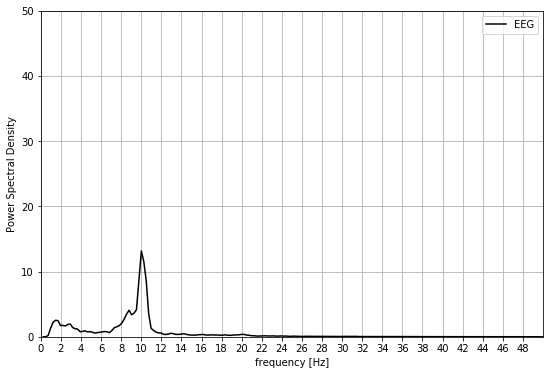

Opening raw data file /home/kovar/thesis_project/data/processed/43a.fif...
This filename (/home/kovar/thesis_project/data/processed/43a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17211 =      0.000 ...    68.844 secs
Ready.
resp             1
b/a              0
sex              1
age             43
sfreq          250
sc              28
sc_bef          28
sc_aft          12
dep              1
dep_bef          0
dep_aft         -1
change     2.33333
Name: (43, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/43a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


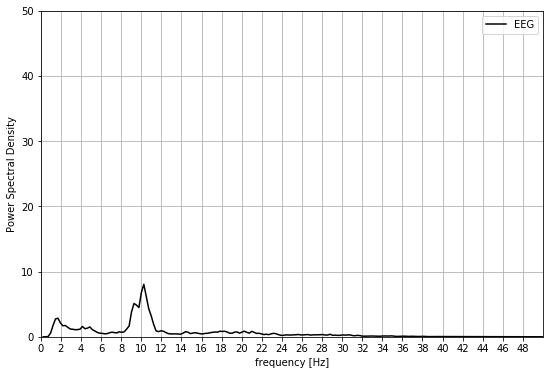

Opening raw data file /home/kovar/thesis_project/data/processed/127b.fif...
This filename (/home/kovar/thesis_project/data/processed/127b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              1
sex              0
age             35
sfreq          250
sc              21
sc_bef          25
sc_aft          21
dep              0
dep_bef         -1
dep_aft          1
change     1.19048
Name: (127, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/127b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


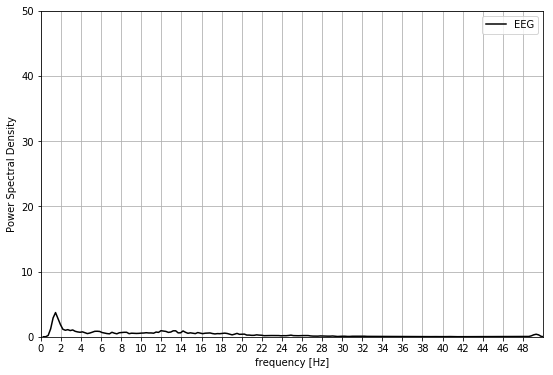

Opening raw data file /home/kovar/thesis_project/data/processed/24b.fif...
This filename (/home/kovar/thesis_project/data/processed/24b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 25142 =      0.000 ...   100.568 secs
Ready.
resp             0
b/a              1
sex              0
age             52
sfreq          250
sc              22
sc_bef          25
sc_aft          22
dep              0
dep_bef         -1
dep_aft          1
change     1.13636
Name: (24, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/24b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


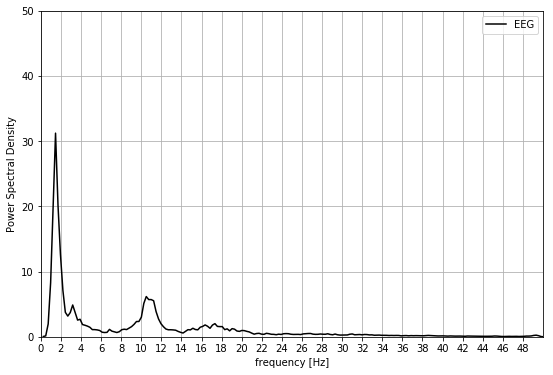

Opening raw data file /home/kovar/thesis_project/data/processed/88b.fif...
This filename (/home/kovar/thesis_project/data/processed/88b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18050 =      0.000 ...    72.200 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/88b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             39
sfreq         1000
sc              29
sc_bef          30
sc_aft          29
dep              1
dep_bef          1
dep_aft          1
change     1.03448
Name: (88, b), dtype: object


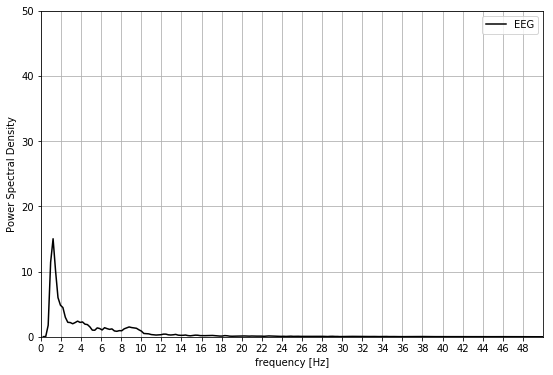

Opening raw data file /home/kovar/thesis_project/data/processed/31a.fif...
This filename (/home/kovar/thesis_project/data/processed/31a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              0
sex              0
age             61
sfreq          250
sc              25
sc_bef          25
sc_aft          19
dep              0
dep_bef         -1
dep_aft          0
change     1.31579
Name: (31, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/31a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


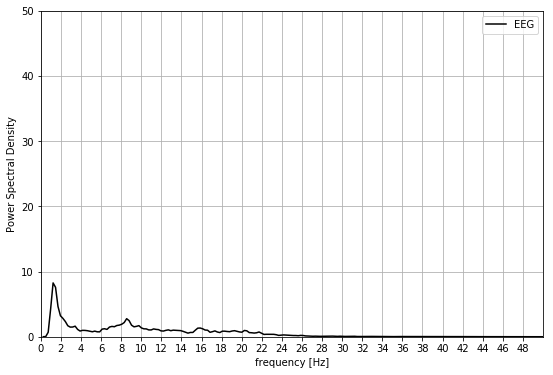

Opening raw data file /home/kovar/thesis_project/data/processed/35b.fif...
This filename (/home/kovar/thesis_project/data/processed/35b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 33885 =      0.000 ...   135.540 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/35b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             34
sfreq          250
sc              15
sc_bef          25
sc_aft          15
dep             -1
dep_bef         -1
dep_aft          0
change     1.66667
Name: (35, b), dtype: object


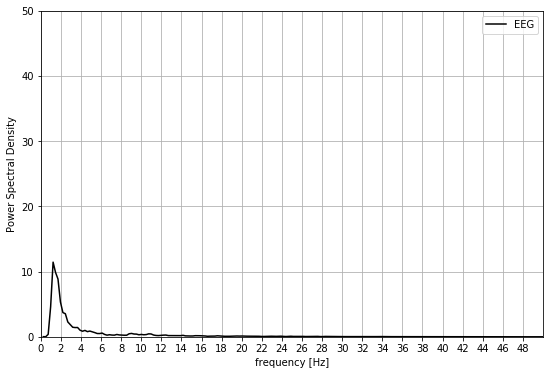

Opening raw data file /home/kovar/thesis_project/data/processed/38a.fif...
This filename (/home/kovar/thesis_project/data/processed/38a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19075 =      0.000 ...    76.300 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/38a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              0
age             55
sfreq          250
sc              29
sc_bef          29
sc_aft          19
dep              1
dep_bef          0
dep_aft          0
change     1.52632
Name: (38, a), dtype: object


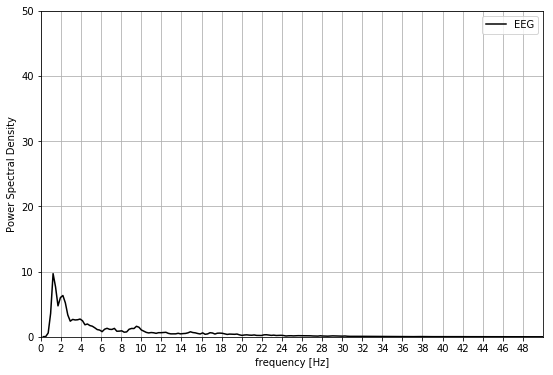

Opening raw data file /home/kovar/thesis_project/data/processed/68a.fif...
This filename (/home/kovar/thesis_project/data/processed/68a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23228 =      0.000 ...    92.912 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/68a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             1
b/a              0
sex              0
age             55
sfreq         1000
sc              25
sc_bef          25
sc_aft          11
dep              0
dep_bef         -1
dep_aft         -1
change     2.27273
Name: (68, a), dtype: object


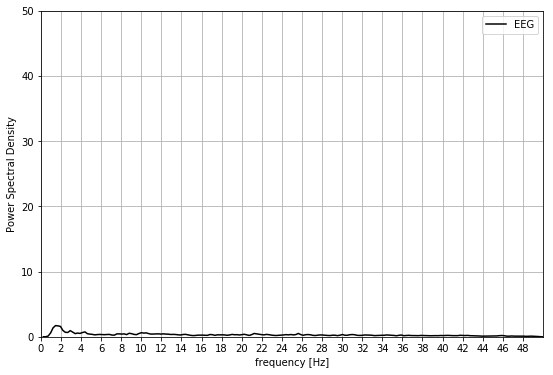

Opening raw data file /home/kovar/thesis_project/data/processed/41b.fif...
This filename (/home/kovar/thesis_project/data/processed/41b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 30651 =      0.000 ...   122.604 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/41b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             59
sfreq         1000
sc              19
sc_bef          29
sc_aft          19
dep             -1
dep_bef          0
dep_aft          0
change     1.52632
Name: (41, b), dtype: object


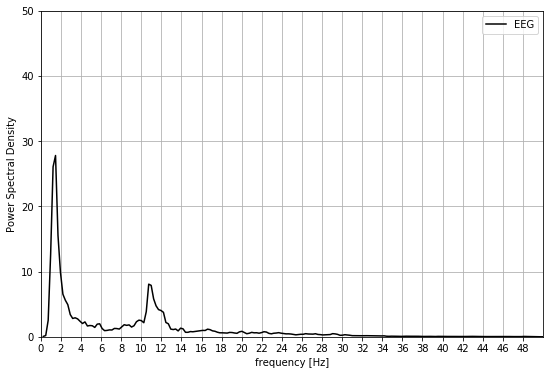

Opening raw data file /home/kovar/thesis_project/data/processed/121b.fif...
This filename (/home/kovar/thesis_project/data/processed/121b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 34195 =      0.000 ...   136.780 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/121b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp              0
b/a               1
sex               0
age              34
sfreq           250
sc               26
sc_bef           24
sc_aft           26
dep               0
dep_bef          -1
dep_aft           1
change     0.923077
Name: (121, b), dtype: object


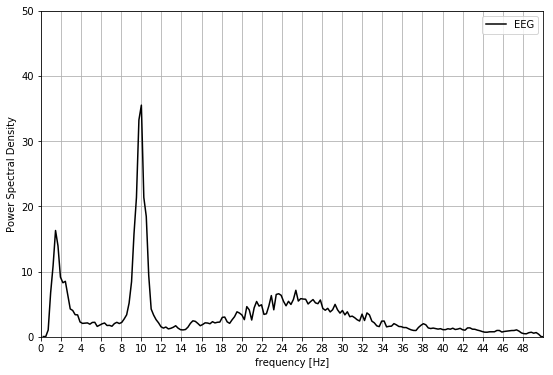

Opening raw data file /home/kovar/thesis_project/data/processed/66a.fif...
This filename (/home/kovar/thesis_project/data/processed/66a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 8669 =      0.000 ...    34.676 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/66a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              0
age             42
sfreq          250
sc              28
sc_bef          28
sc_aft          24
dep              1
dep_bef          0
dep_aft          1
change     1.16667
Name: (66, a), dtype: object


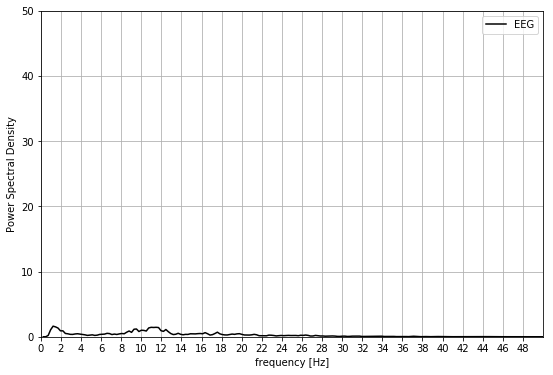

Opening raw data file /home/kovar/thesis_project/data/processed/21b.fif...
This filename (/home/kovar/thesis_project/data/processed/21b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 14712 =      0.000 ...    58.848 secs
Ready.
resp             0
b/a              1
sex              0
age             49
sfreq          250
sc              23
sc_bef          34
sc_aft          23
dep              0
dep_bef          1
dep_aft          1
change     1.47826
Name: (21, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/21b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


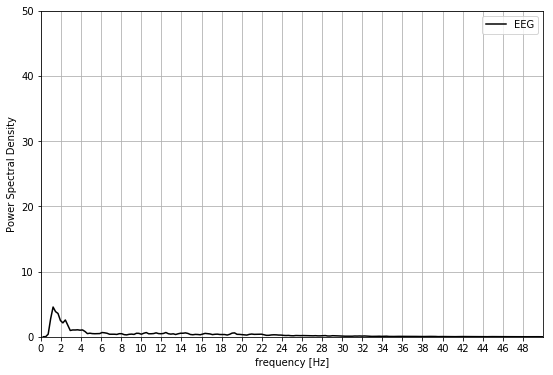

Opening raw data file /home/kovar/thesis_project/data/processed/103b.fif...
This filename (/home/kovar/thesis_project/data/processed/103b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21146 =      0.000 ...    84.584 secs
Ready.
resp             1
b/a              1
sex              1
age             38
sfreq         1000
sc               9
sc_bef          26
sc_aft           9
dep             -1
dep_bef          0
dep_aft         -1
change     2.88889
Name: (103, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/103b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


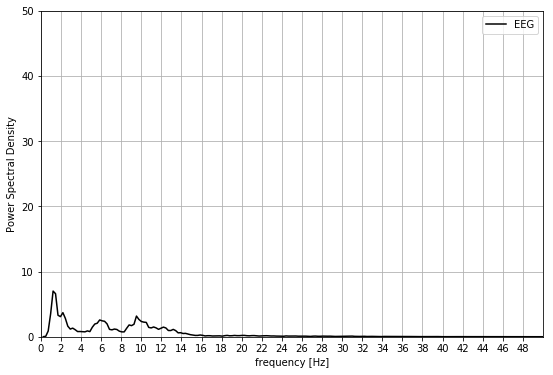

Opening raw data file /home/kovar/thesis_project/data/processed/52b.fif...
This filename (/home/kovar/thesis_project/data/processed/52b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/52b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


Isotrak not found
    Range : 0 ... 17763 =      0.000 ...    71.052 secs
Ready.
resp             1
b/a              1
sex              0
age             41
sfreq          250
sc              11
sc_bef          30
sc_aft          11
dep             -1
dep_bef          1
dep_aft         -1
change     2.72727
Name: (52, b), dtype: object


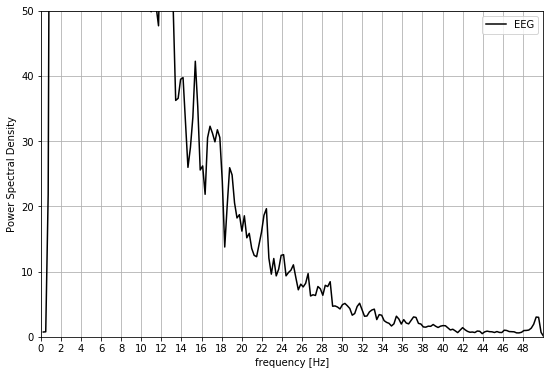

Opening raw data file /home/kovar/thesis_project/data/processed/84b.fif...
This filename (/home/kovar/thesis_project/data/processed/84b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16641 =      0.000 ...    66.564 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/84b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp         1
b/a          1
sex          1
age         49
sfreq      250
sc          14
sc_bef      28
sc_aft      14
dep         -1
dep_bef      0
dep_aft      0
change       2
Name: (84, b), dtype: object


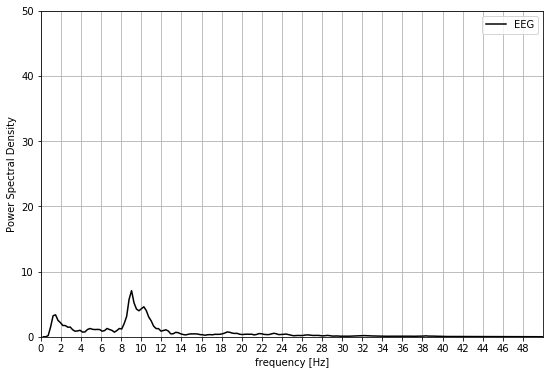

Opening raw data file /home/kovar/thesis_project/data/processed/77b.fif...
This filename (/home/kovar/thesis_project/data/processed/77b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15758 =      0.000 ...    63.032 secs
Ready.
resp          1
b/a           1
sex           0
age          31
sfreq      1000
sc           10
sc_bef       32
sc_aft       10
dep          -1
dep_bef       1
dep_aft      -1
change      3.2
Name: (77, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/77b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


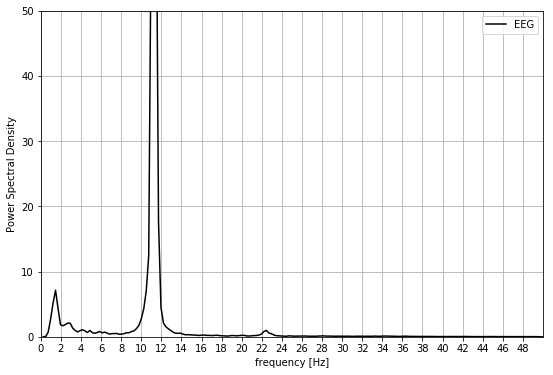

Opening raw data file /home/kovar/thesis_project/data/processed/18a.fif...
This filename (/home/kovar/thesis_project/data/processed/18a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20560 =      0.000 ...    82.240 secs
Ready.
resp             1
b/a              0
sex              0
age             60
sfreq         1000
sc              32
sc_bef          32
sc_aft          13
dep              1
dep_bef          1
dep_aft          0
change     2.46154
Name: (18, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/18a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


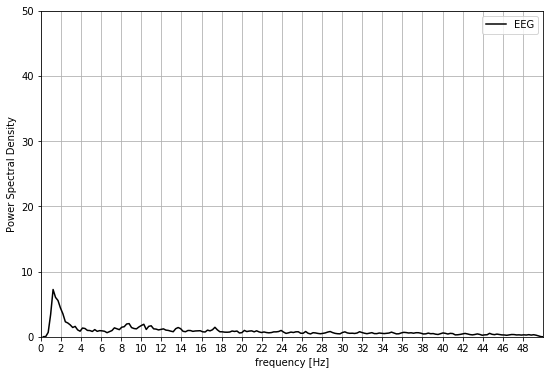

Opening raw data file /home/kovar/thesis_project/data/processed/113b.fif...
This filename (/home/kovar/thesis_project/data/processed/113b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23870 =      0.000 ...    95.480 secs
Ready.
resp              0
b/a               1
sex               1
age              59
sfreq          1000
sc               36
sc_bef           31
sc_aft           36
dep               1
dep_bef           1
dep_aft           1
change     0.861111
Name: (113, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/113b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


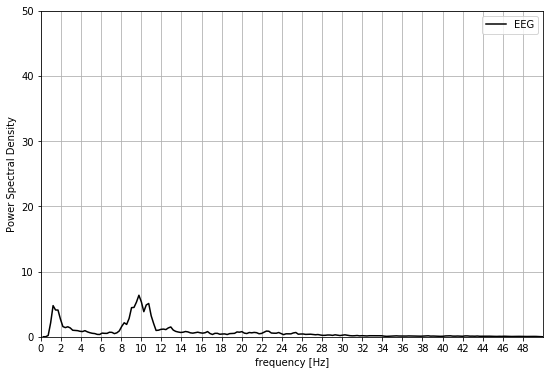

Opening raw data file /home/kovar/thesis_project/data/processed/3a.fif...
This filename (/home/kovar/thesis_project/data/processed/3a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17064 =      0.000 ...    68.256 secs
Ready.
resp             1
b/a              0
sex              0
age             48
sfreq          250
sc              25
sc_bef          25
sc_aft           7
dep              0
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (3, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/3a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


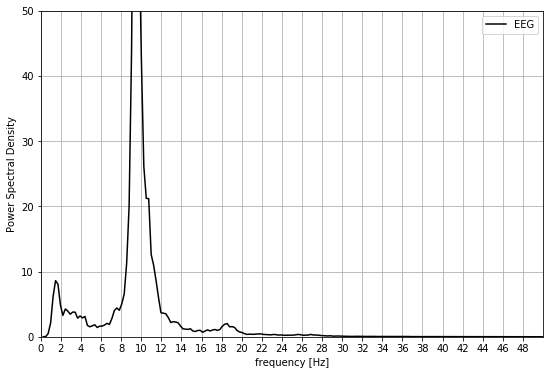

Opening raw data file /home/kovar/thesis_project/data/processed/13a.fif...
This filename (/home/kovar/thesis_project/data/processed/13a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 13129 =      0.000 ...    52.516 secs
Ready.
resp             1
b/a              0
sex              0
age             57
sfreq          250
sc              26
sc_bef          26
sc_aft           7
dep              0
dep_bef          0
dep_aft         -1
change     3.71429
Name: (13, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/13a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


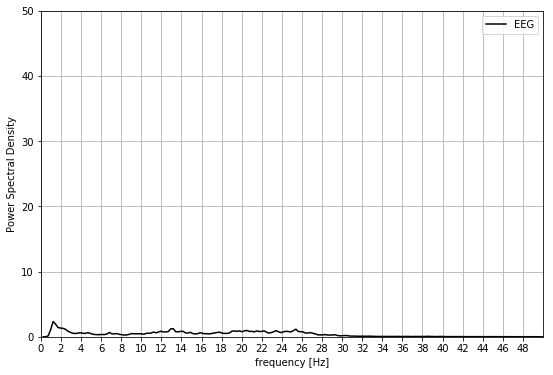

Opening raw data file /home/kovar/thesis_project/data/processed/64a.fif...
This filename (/home/kovar/thesis_project/data/processed/64a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15985 =      0.000 ...    63.940 secs
Ready.
resp          0
b/a           0
sex           0
age          53
sfreq      1000
sc           26
sc_bef       26
sc_aft       26
dep           0
dep_bef       0
dep_aft       1
change        1
Name: (64, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/64a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


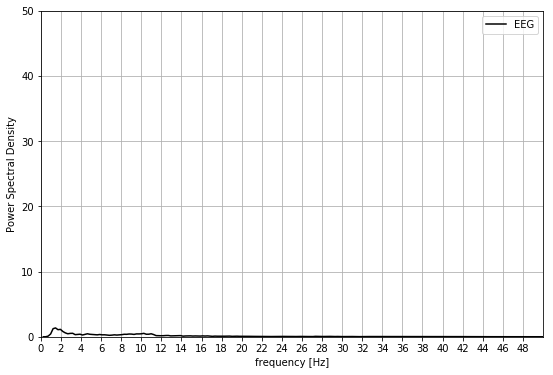

Opening raw data file /home/kovar/thesis_project/data/processed/39b.fif...
This filename (/home/kovar/thesis_project/data/processed/39b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15660 =      0.000 ...    62.640 secs
Ready.
resp             0
b/a              1
sex              1
age             51
sfreq          250
sc              15
sc_bef          23
sc_aft          15
dep             -1
dep_bef         -1
dep_aft          0
change     1.53333
Name: (39, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/39b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


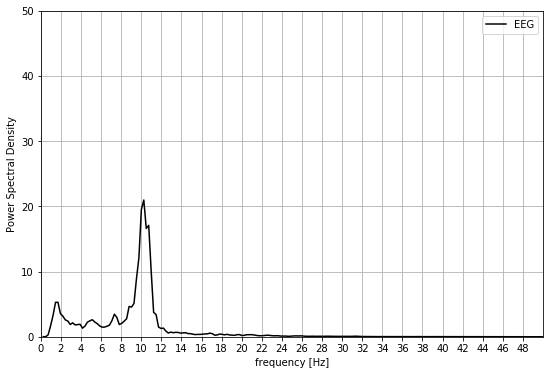

Opening raw data file /home/kovar/thesis_project/data/processed/128a.fif...
This filename (/home/kovar/thesis_project/data/processed/128a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              0
sex              0
age             51
sfreq          250
sc              21
sc_bef          21
sc_aft           9
dep              0
dep_bef         -1
dep_aft         -1
change     2.33333
Name: (128, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/128a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


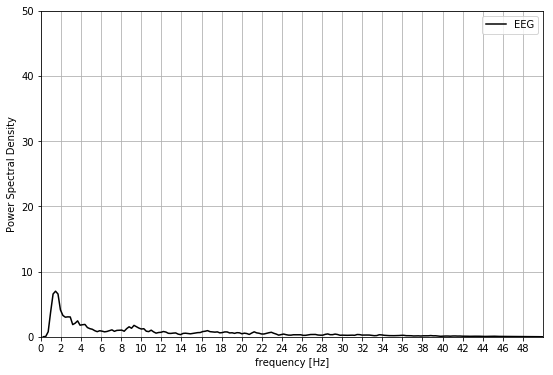

Opening raw data file /home/kovar/thesis_project/data/processed/25a.fif...
This filename (/home/kovar/thesis_project/data/processed/25a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16625 =      0.000 ...    66.500 secs
Ready.
resp             1
b/a              0
sex              0
age             41
sfreq          250
sc              26
sc_bef          26
sc_aft          12
dep              0
dep_bef          0
dep_aft         -1
change     2.16667
Name: (25, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/25a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


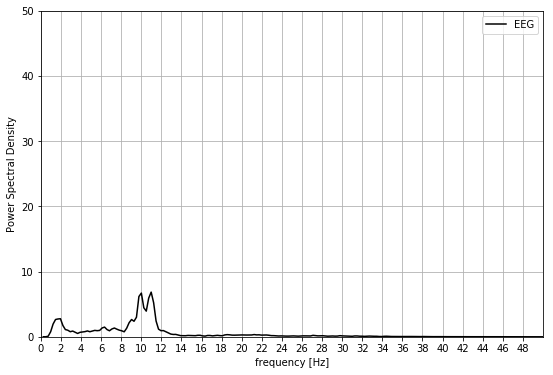

Opening raw data file /home/kovar/thesis_project/data/processed/99b.fif...
This filename (/home/kovar/thesis_project/data/processed/99b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16851 =      0.000 ...    67.404 secs
Ready.
resp             0
b/a              1
sex              0
age             47
sfreq          250
sc              21
sc_bef          23
sc_aft          21
dep              0
dep_bef         -1
dep_aft          1
change     1.09524
Name: (99, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/99b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


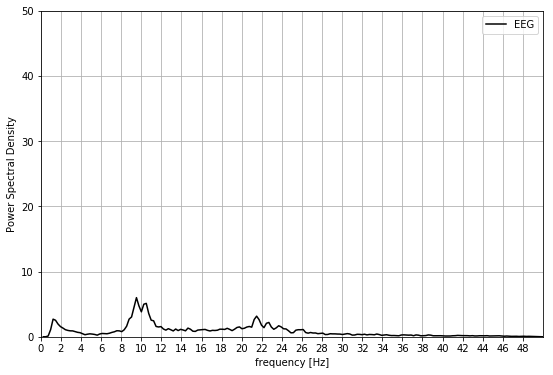

Opening raw data file /home/kovar/thesis_project/data/processed/20b.fif...
This filename (/home/kovar/thesis_project/data/processed/20b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15267 =      0.000 ...    61.068 secs
Ready.
resp             1
b/a              1
sex              0
age             49
sfreq          250
sc              13
sc_bef          27
sc_aft          13
dep             -1
dep_bef          0
dep_aft          0
change     2.07692
Name: (20, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/20b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


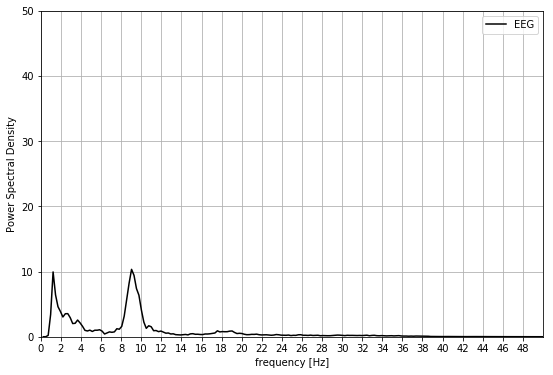

Opening raw data file /home/kovar/thesis_project/data/processed/28a.fif...
This filename (/home/kovar/thesis_project/data/processed/28a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp         1
b/a          0
sex          1
age         57
sfreq      250
sc          34
sc_bef      34
sc_aft      10
dep          1
dep_bef      1
dep_aft     -1
change     3.4
Name: (28, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/28a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


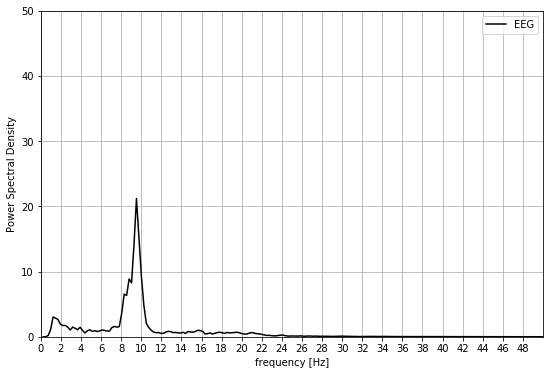

Opening raw data file /home/kovar/thesis_project/data/processed/62b.fif...
This filename (/home/kovar/thesis_project/data/processed/62b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23683 =      0.000 ...    94.732 secs
Ready.
resp         1
b/a          1
sex          0
age         34
sfreq      250
sc          10
sc_bef      23
sc_aft      10
dep         -1
dep_bef     -1
dep_aft     -1
change     2.3
Name: (62, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/62b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


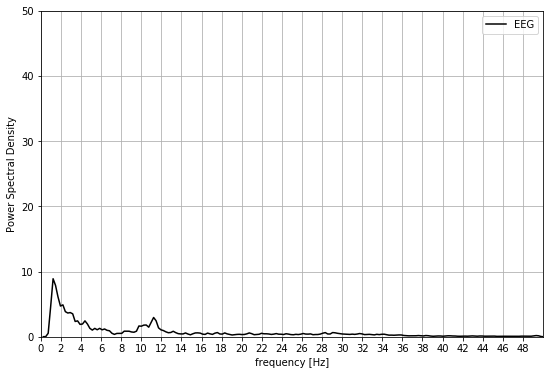

Opening raw data file /home/kovar/thesis_project/data/processed/28b.fif...
This filename (/home/kovar/thesis_project/data/processed/28b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23525 =      0.000 ...    94.100 secs
Ready.
resp         1
b/a          1
sex          1
age         57
sfreq      250
sc          10
sc_bef      34
sc_aft      10
dep         -1
dep_bef      1
dep_aft     -1
change     3.4
Name: (28, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/28b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


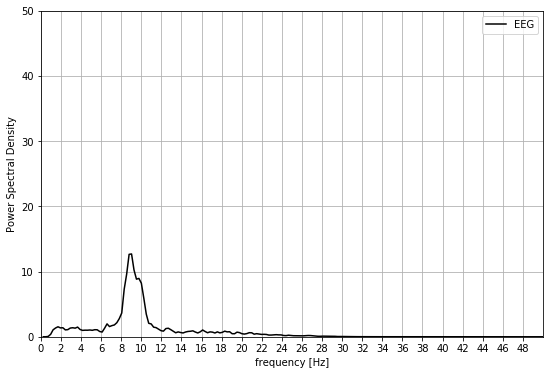

Opening raw data file /home/kovar/thesis_project/data/processed/105a.fif...
This filename (/home/kovar/thesis_project/data/processed/105a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23128 =      0.000 ...    92.512 secs
Ready.
resp         1
b/a          0
sex          0
age         46
sfreq      250
sc          30
sc_bef      30
sc_aft       1
dep          1
dep_bef      1
dep_aft     -1
change      30
Name: (105, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/105a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


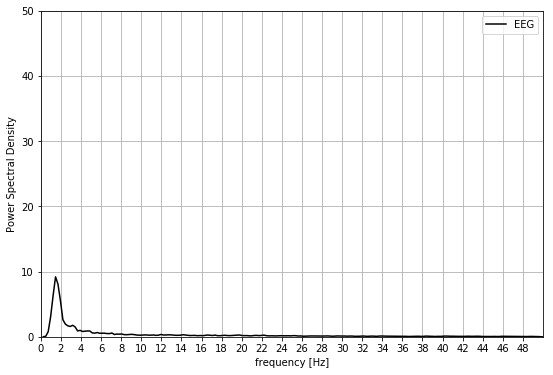

Opening raw data file /home/kovar/thesis_project/data/processed/109b.fif...
This filename (/home/kovar/thesis_project/data/processed/109b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              1
sex              0
age             37
sfreq          250
sc              18
sc_bef          28
sc_aft          18
dep             -1
dep_bef          0
dep_aft          0
change     1.55556
Name: (109, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/109b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


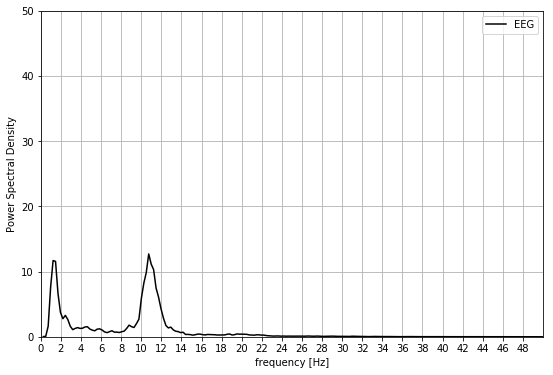

Opening raw data file /home/kovar/thesis_project/data/processed/117b.fif...
This filename (/home/kovar/thesis_project/data/processed/117b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20358 =      0.000 ...    81.432 secs
Ready.
resp             0
b/a              1
sex              0
age             39
sfreq          250
sc              19
sc_bef          28
sc_aft          19
dep             -1
dep_bef          0
dep_aft          0
change     1.47368
Name: (117, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/117b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


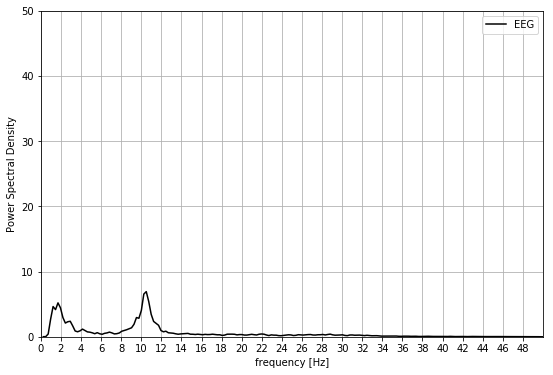

Opening raw data file /home/kovar/thesis_project/data/processed/98a.fif...
This filename (/home/kovar/thesis_project/data/processed/98a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 14235 =      0.000 ...    56.940 secs
Ready.
resp             1
b/a              0
sex              0
age             52
sfreq          250
sc              24
sc_bef          24
sc_aft          11
dep              0
dep_bef         -1
dep_aft         -1
change     2.18182
Name: (98, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/98a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


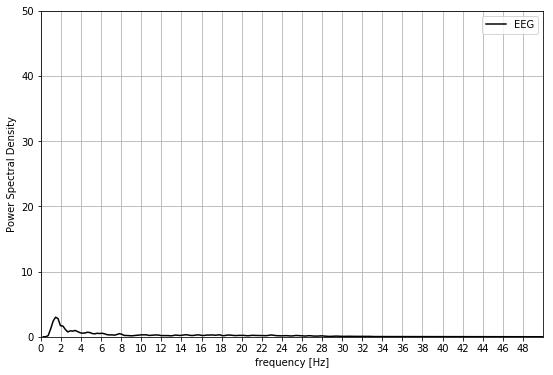

Opening raw data file /home/kovar/thesis_project/data/processed/64b.fif...
This filename (/home/kovar/thesis_project/data/processed/64b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp          0
b/a           1
sex           0
age          53
sfreq      1000
sc           26
sc_bef       26
sc_aft       26
dep           0
dep_bef       0
dep_aft       1
change        1
Name: (64, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/64b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


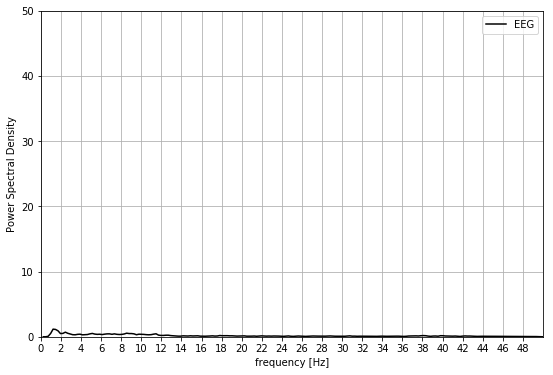

Opening raw data file /home/kovar/thesis_project/data/processed/98b.fif...
This filename (/home/kovar/thesis_project/data/processed/98b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 12829 =      0.000 ...    51.316 secs
Ready.
resp             1
b/a              1
sex              0
age             52
sfreq          250
sc              11
sc_bef          24
sc_aft          11
dep             -1
dep_bef         -1
dep_aft         -1
change     2.18182
Name: (98, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/98b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


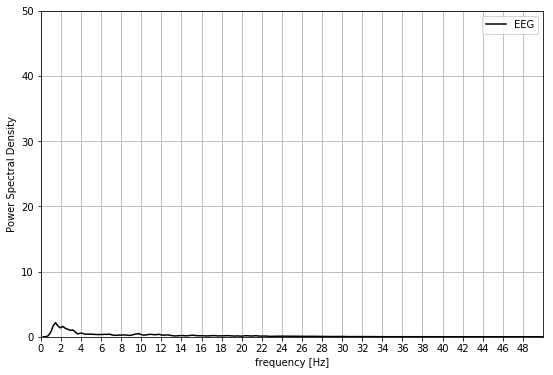

Opening raw data file /home/kovar/thesis_project/data/processed/2a.fif...
This filename (/home/kovar/thesis_project/data/processed/2a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 10598 =      0.000 ...    42.392 secs
Ready.
resp             0
b/a              0
sex              0
age             36
sfreq          250
sc              31
sc_bef          31
sc_aft          30
dep              1
dep_bef          1
dep_aft          1
change     1.03333
Name: (2, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/2a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


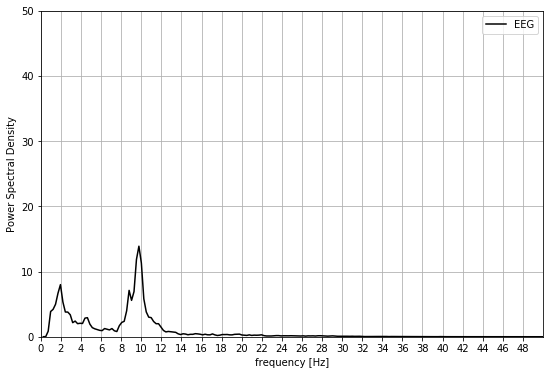

Opening raw data file /home/kovar/thesis_project/data/processed/90a.fif...
This filename (/home/kovar/thesis_project/data/processed/90a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 22607 =      0.000 ...    90.428 secs
Ready.
resp         1
b/a          0
sex          0
age         57
sfreq      250
sc          28
sc_bef      28
sc_aft       2
dep          1
dep_bef      0
dep_aft     -1
change      14
Name: (90, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/90a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


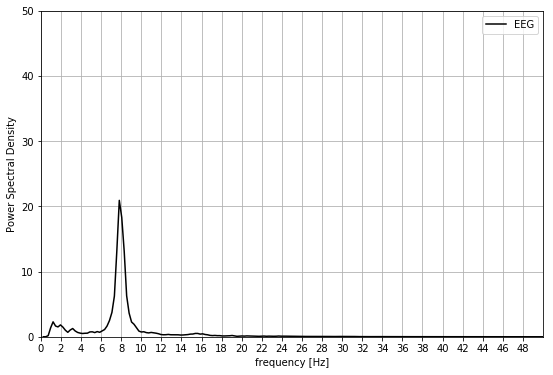

Opening raw data file /home/kovar/thesis_project/data/processed/5a.fif...
This filename (/home/kovar/thesis_project/data/processed/5a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 30656 =      0.000 ...   122.624 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/5a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp              0
b/a               0
sex               0
age              35
sfreq           250
sc               26
sc_bef           26
sc_aft           37
dep               0
dep_bef           0
dep_aft           1
change     0.702703
Name: (5, a), dtype: object


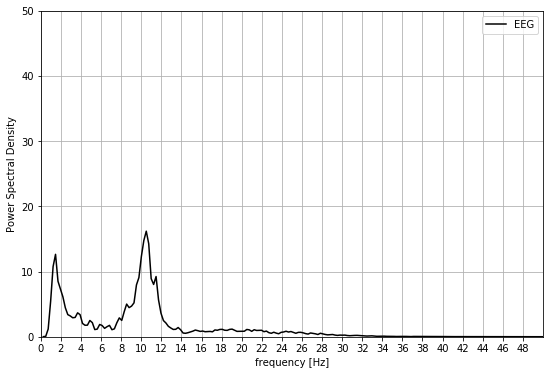

Opening raw data file /home/kovar/thesis_project/data/processed/108a.fif...
This filename (/home/kovar/thesis_project/data/processed/108a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18239 =      0.000 ...    72.956 secs
Ready.
resp             1
b/a              0
sex              0
age             65
sfreq          250
sc              27
sc_bef          27
sc_aft          11
dep              1
dep_bef          0
dep_aft         -1
change     2.45455
Name: (108, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/108a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


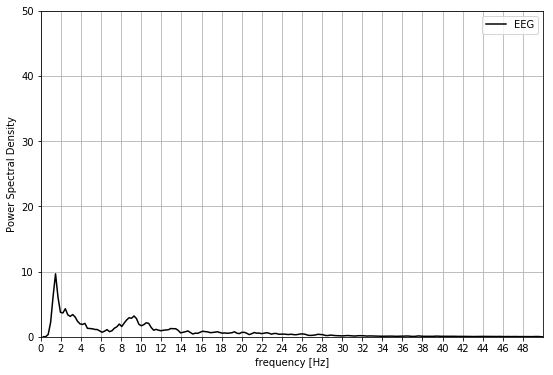

Opening raw data file /home/kovar/thesis_project/data/processed/34a.fif...
This filename (/home/kovar/thesis_project/data/processed/34a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20242 =      0.000 ...    80.968 secs
Ready.
resp             1
b/a              0
sex              0
age             42
sfreq         1000
sc              25
sc_bef          25
sc_aft          12
dep              0
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (34, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/34a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


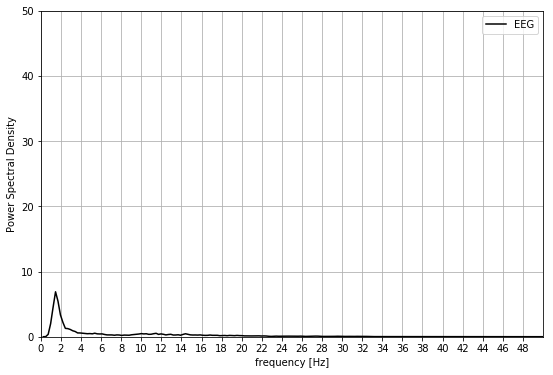

Opening raw data file /home/kovar/thesis_project/data/processed/92b.fif...
This filename (/home/kovar/thesis_project/data/processed/92b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16104 =      0.000 ...    64.416 secs
Ready.
resp         1
b/a          1
sex          0
age         61
sfreq      250
sc          10
sc_bef      29
sc_aft      10
dep         -1
dep_bef      0
dep_aft     -1
change     2.9
Name: (92, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/92b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


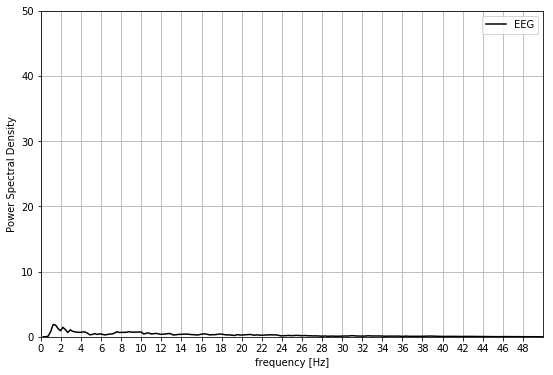

Opening raw data file /home/kovar/thesis_project/data/processed/70a.fif...
This filename (/home/kovar/thesis_project/data/processed/70a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 14707 =      0.000 ...    58.828 secs
Ready.
resp             0
b/a              0
sex              0
age             50
sfreq         1000
sc              25
sc_bef          25
sc_aft          18
dep              0
dep_bef         -1
dep_aft          0
change     1.38889
Name: (70, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/70a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


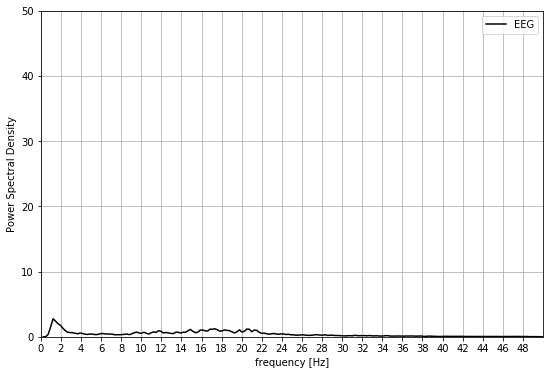

Opening raw data file /home/kovar/thesis_project/data/processed/32a.fif...
This filename (/home/kovar/thesis_project/data/processed/32a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15941 =      0.000 ...    63.764 secs
Ready.
resp             1
b/a              0
sex              0
age             54
sfreq          250
sc              25
sc_bef          25
sc_aft           7
dep              0
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (32, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/32a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


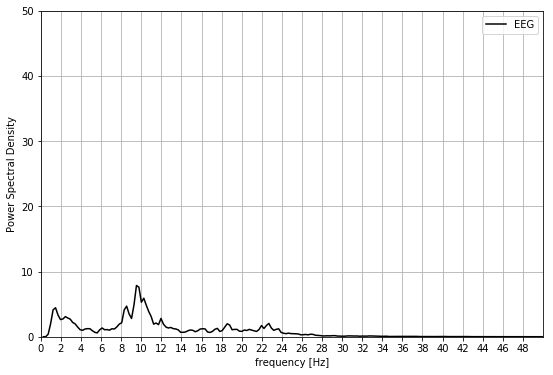

Opening raw data file /home/kovar/thesis_project/data/processed/51b.fif...
This filename (/home/kovar/thesis_project/data/processed/51b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19058 =      0.000 ...    76.232 secs
Ready.
resp             0
b/a              1
sex              1
age             52
sfreq          250
sc              22
sc_bef          25
sc_aft          22
dep              0
dep_bef         -1
dep_aft          1
change     1.13636
Name: (51, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/51b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


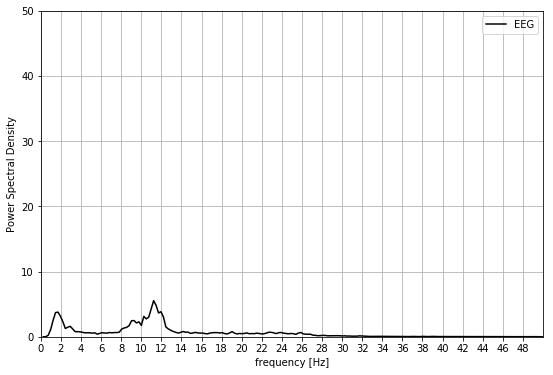

Opening raw data file /home/kovar/thesis_project/data/processed/133a.fif...
This filename (/home/kovar/thesis_project/data/processed/133a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20961 =      0.000 ...    83.844 secs
Ready.
resp             0
b/a              0
sex              0
age             64
sfreq          250
sc              33
sc_bef          33
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.22222
Name: (133, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/133a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


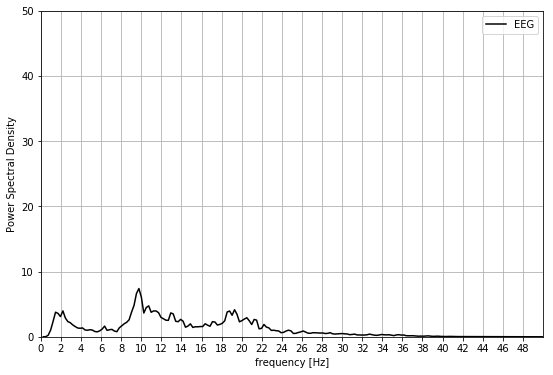

Opening raw data file /home/kovar/thesis_project/data/processed/8a.fif...
This filename (/home/kovar/thesis_project/data/processed/8a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 14392 =      0.000 ...    57.568 secs
Ready.
resp             1
b/a              0
sex              1
age             50
sfreq          250
sc              24
sc_bef          24
sc_aft          11
dep              0
dep_bef         -1
dep_aft         -1
change     2.18182
Name: (8, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/8a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


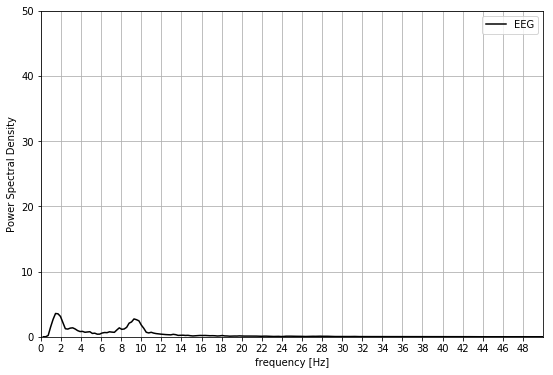

Opening raw data file /home/kovar/thesis_project/data/processed/107b.fif...
This filename (/home/kovar/thesis_project/data/processed/107b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              1
sex              1
age             63
sfreq          250
sc              12
sc_bef          25
sc_aft          12
dep             -1
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (107, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/107b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


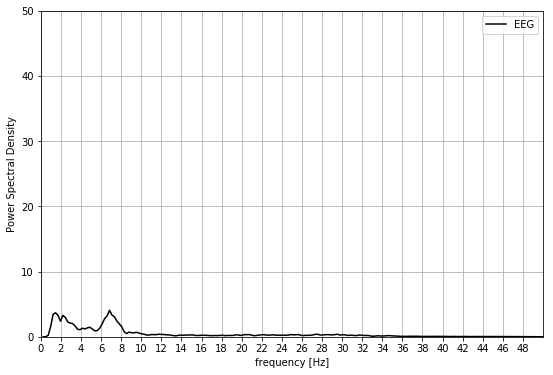

Opening raw data file /home/kovar/thesis_project/data/processed/128b.fif...
This filename (/home/kovar/thesis_project/data/processed/128b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 11594 =      0.000 ...    46.376 secs
Ready.
resp             1
b/a              1
sex              0
age             51
sfreq          250
sc               9
sc_bef          21
sc_aft           9
dep             -1
dep_bef         -1
dep_aft         -1
change     2.33333
Name: (128, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/128b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


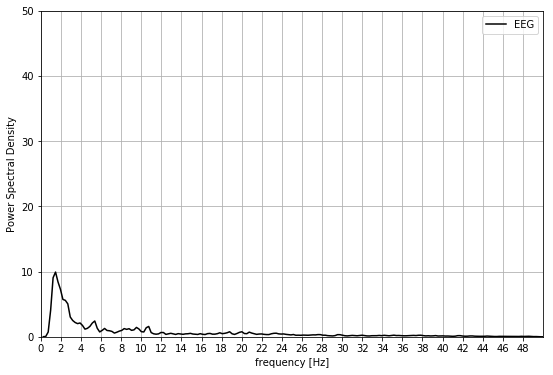

Opening raw data file /home/kovar/thesis_project/data/processed/103a.fif...
This filename (/home/kovar/thesis_project/data/processed/103a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              0
sex              1
age             38
sfreq         1000
sc              26
sc_bef          26
sc_aft           9
dep              0
dep_bef          0
dep_aft         -1
change     2.88889
Name: (103, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/103a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


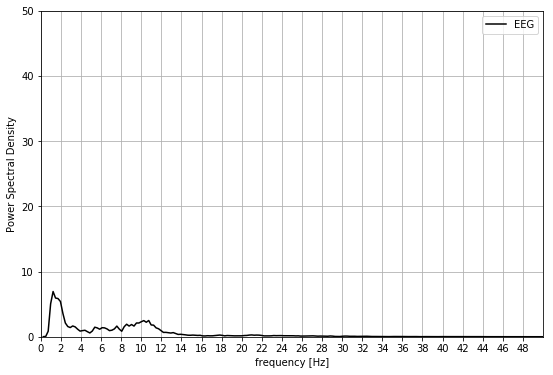

Opening raw data file /home/kovar/thesis_project/data/processed/13b.fif...
This filename (/home/kovar/thesis_project/data/processed/13b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15292 =      0.000 ...    61.168 secs
Ready.
resp             1
b/a              1
sex              0
age             57
sfreq          250
sc               7
sc_bef          26
sc_aft           7
dep             -1
dep_bef          0
dep_aft         -1
change     3.71429
Name: (13, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/13b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


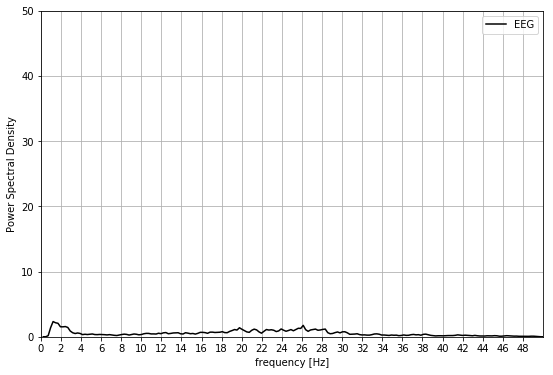

Opening raw data file /home/kovar/thesis_project/data/processed/129b.fif...
This filename (/home/kovar/thesis_project/data/processed/129b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp         1
b/a          1
sex          0
age         38
sfreq      250
sc           6
sc_bef      27
sc_aft       6
dep         -1
dep_bef      0
dep_aft     -1
change     4.5
Name: (129, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/129b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


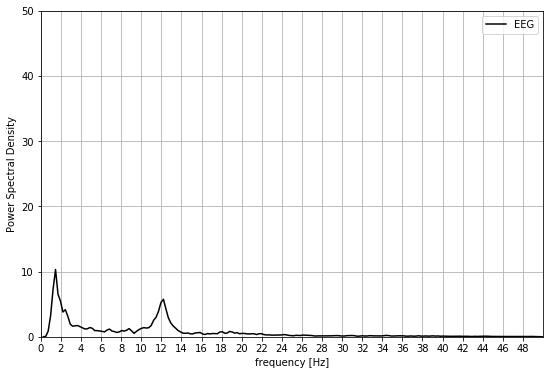

Opening raw data file /home/kovar/thesis_project/data/processed/114b.fif...
This filename (/home/kovar/thesis_project/data/processed/114b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20021 =      0.000 ...    80.084 secs
Ready.
resp             1
b/a              1
sex              0
age             55
sfreq          250
sc              12
sc_bef          25
sc_aft          12
dep             -1
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (114, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/114b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


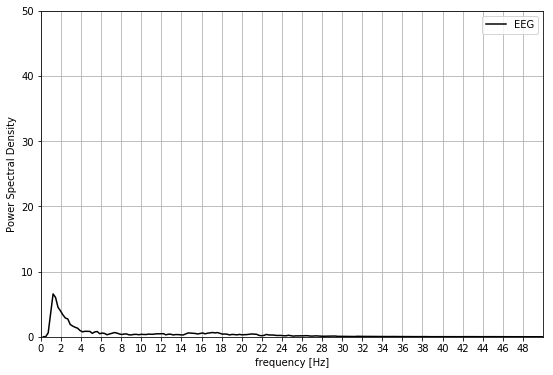

Opening raw data file /home/kovar/thesis_project/data/processed/60b.fif...
This filename (/home/kovar/thesis_project/data/processed/60b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15692 =      0.000 ...    62.768 secs
Ready.
resp             0
b/a              1
sex              0
age             44
sfreq         1000
sc              22
sc_bef          26
sc_aft          22
dep              0
dep_bef          0
dep_aft          1
change     1.18182
Name: (60, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/60b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


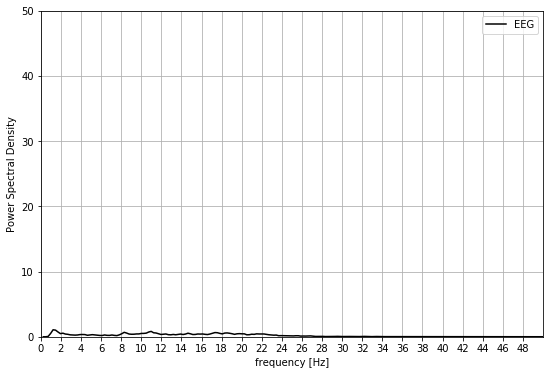

Opening raw data file /home/kovar/thesis_project/data/processed/37a.fif...
This filename (/home/kovar/thesis_project/data/processed/37a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 27423 =      0.000 ...   109.692 secs
Ready.
resp             0
b/a              0
sex              0
age             43
sfreq          250
sc              25
sc_bef          25
sc_aft          21
dep              0
dep_bef         -1
dep_aft          1
change     1.19048
Name: (37, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/37a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


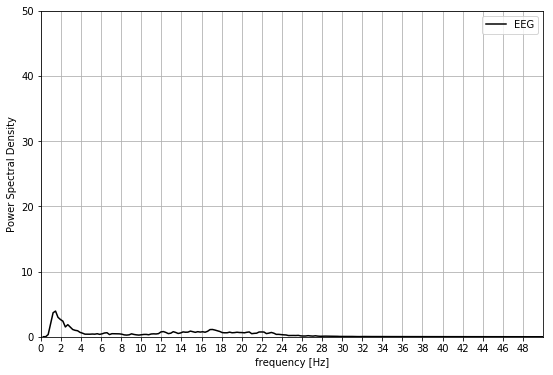

Opening raw data file /home/kovar/thesis_project/data/processed/14b.fif...
This filename (/home/kovar/thesis_project/data/processed/14b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19516 =      0.000 ...    78.064 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/14b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             30
sfreq          250
sc              17
sc_bef          28
sc_aft          17
dep             -1
dep_bef          0
dep_aft          0
change     1.64706
Name: (14, b), dtype: object


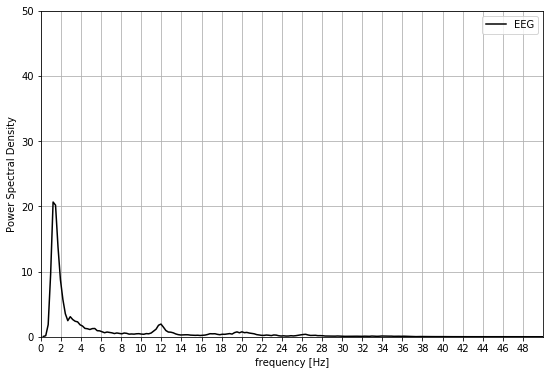

Opening raw data file /home/kovar/thesis_project/data/processed/52a.fif...
This filename (/home/kovar/thesis_project/data/processed/52a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              0
sex              0
age             41
sfreq          250
sc              30
sc_bef          30
sc_aft          11
dep              1
dep_bef          1
dep_aft         -1
change     2.72727
Name: (52, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/52a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


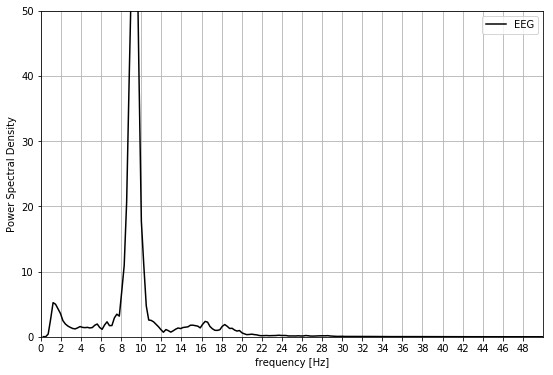

Opening raw data file /home/kovar/thesis_project/data/processed/24a.fif...
This filename (/home/kovar/thesis_project/data/processed/24a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23916 =      0.000 ...    95.664 secs
Ready.
resp             0
b/a              0
sex              0
age             52
sfreq          250
sc              25
sc_bef          25
sc_aft          22
dep              0
dep_bef         -1
dep_aft          1
change     1.13636
Name: (24, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/24a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


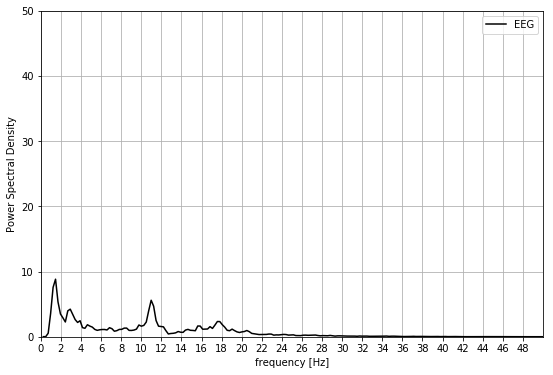

Opening raw data file /home/kovar/thesis_project/data/processed/120b.fif...
This filename (/home/kovar/thesis_project/data/processed/120b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 12209 =      0.000 ...    48.836 secs
Ready.
resp             0
b/a              1
sex              0
age             41
sfreq         1000
sc              19
sc_bef          28
sc_aft          19
dep             -1
dep_bef          0
dep_aft          0
change     1.47368
Name: (120, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/120b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


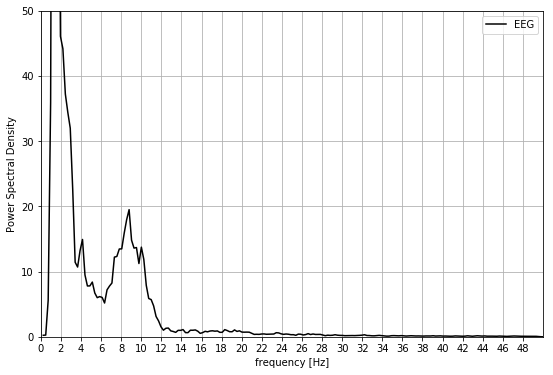

Opening raw data file /home/kovar/thesis_project/data/processed/115a.fif...
This filename (/home/kovar/thesis_project/data/processed/115a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 28996 =      0.000 ...   115.984 secs
Ready.
resp         1
b/a          0
sex          0
age         30
sfreq      250
sc          21
sc_bef      21
sc_aft      10
dep          0
dep_bef     -1
dep_aft     -1
change     2.1
Name: (115, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/115a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


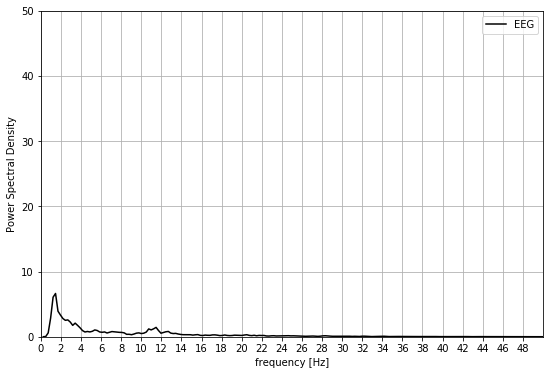

Opening raw data file /home/kovar/thesis_project/data/processed/76b.fif...
This filename (/home/kovar/thesis_project/data/processed/76b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15097 =      0.000 ...    60.388 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/76b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             58
sfreq         1000
sc              18
sc_bef          30
sc_aft          18
dep             -1
dep_bef          1
dep_aft          0
change     1.66667
Name: (76, b), dtype: object


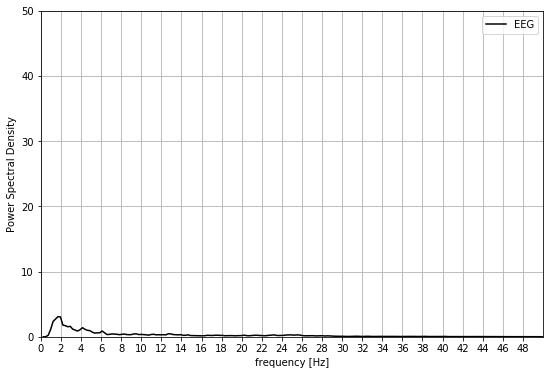

Opening raw data file /home/kovar/thesis_project/data/processed/76a.fif...
This filename (/home/kovar/thesis_project/data/processed/76a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15263 =      0.000 ...    61.052 secs
Ready.
resp             0
b/a              0
sex              0
age             58
sfreq         1000
sc              30
sc_bef          30
sc_aft          18
dep              1
dep_bef          1
dep_aft          0
change     1.66667
Name: (76, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/76a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


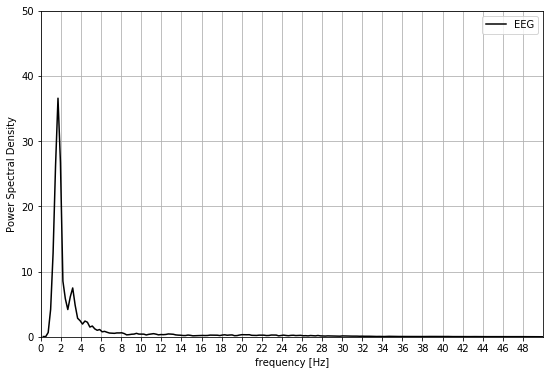

Opening raw data file /home/kovar/thesis_project/data/processed/37b.fif...
This filename (/home/kovar/thesis_project/data/processed/37b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15252 =      0.000 ...    61.008 secs
Ready.
resp             0
b/a              1
sex              0
age             43
sfreq          250
sc              21
sc_bef          25
sc_aft          21
dep              0
dep_bef         -1
dep_aft          1
change     1.19048
Name: (37, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/37b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


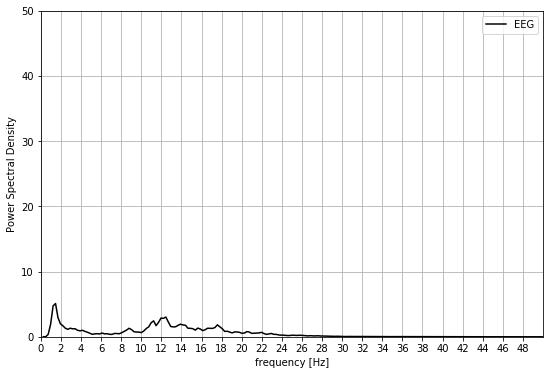

Opening raw data file /home/kovar/thesis_project/data/processed/44b.fif...
This filename (/home/kovar/thesis_project/data/processed/44b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 22121 =      0.000 ...    88.484 secs
Ready.
resp         1
b/a          1
sex          0
age         36
sfreq      250
sc          10
sc_bef      25
sc_aft      10
dep         -1
dep_bef     -1
dep_aft     -1
change     2.5
Name: (44, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/44b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


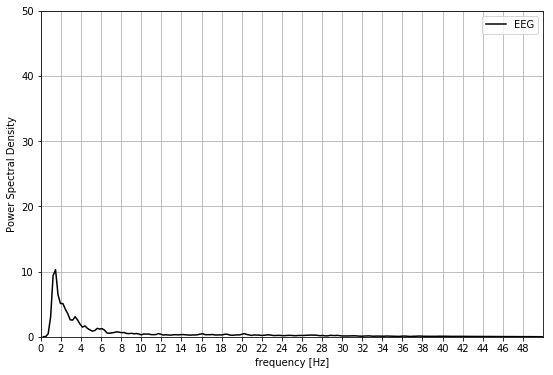

Opening raw data file /home/kovar/thesis_project/data/processed/78b.fif...
This filename (/home/kovar/thesis_project/data/processed/78b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15851 =      0.000 ...    63.404 secs
Ready.
resp             0
b/a              1
sex              0
age             54
sfreq          250
sc              19
sc_bef          27
sc_aft          19
dep             -1
dep_bef          0
dep_aft          0
change     1.42105
Name: (78, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/78b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


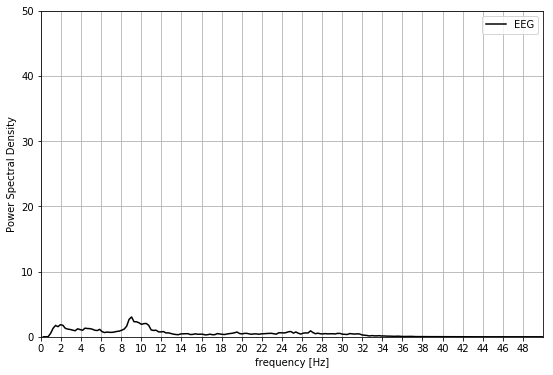

Opening raw data file /home/kovar/thesis_project/data/processed/121a.fif...
This filename (/home/kovar/thesis_project/data/processed/121a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21453 =      0.000 ...    85.812 secs
Ready.
resp              0
b/a               0
sex               0
age              34
sfreq           250
sc               24
sc_bef           24
sc_aft           26
dep               0
dep_bef          -1
dep_aft           1
change     0.923077
Name: (121, a), dtype: object

/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/121a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


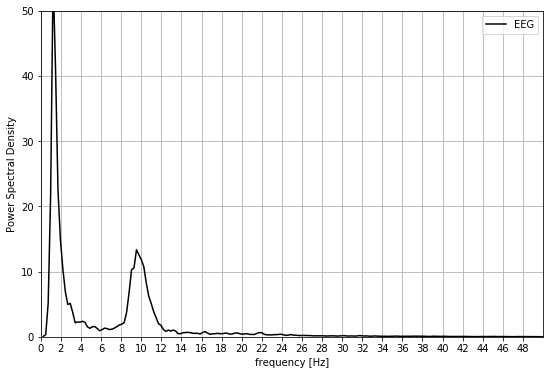

Opening raw data file /home/kovar/thesis_project/data/processed/74a.fif...
This filename (/home/kovar/thesis_project/data/processed/74a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18654 =      0.000 ...    74.616 secs
Ready.
resp             0
b/a              0
sex              0
age             38
sfreq          250
sc              26
sc_bef          26
sc_aft          19
dep              0
dep_bef          0
dep_aft          0
change     1.36842
Name: (74, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/74a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


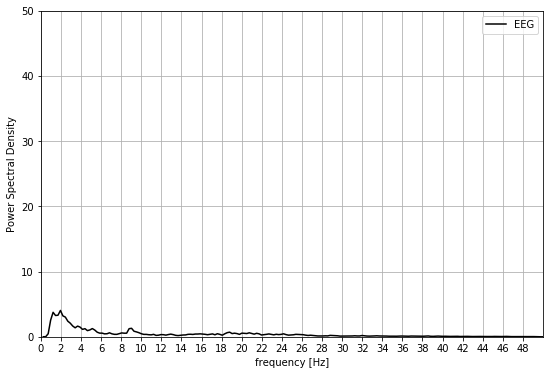

Opening raw data file /home/kovar/thesis_project/data/processed/36b.fif...
This filename (/home/kovar/thesis_project/data/processed/36b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19812 =      0.000 ...    79.248 secs
Ready.
resp           1
b/a            1
sex            1
age           53
sfreq        250
sc             8
sc_bef        25
sc_aft         8
dep           -1
dep_bef       -1
dep_aft       -1
change     3.125
Name: (36, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/36b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


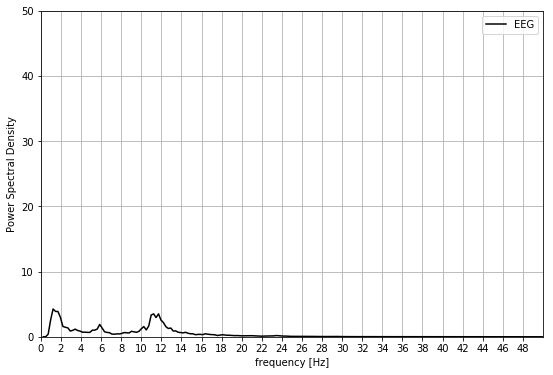

Opening raw data file /home/kovar/thesis_project/data/processed/15b.fif...
This filename (/home/kovar/thesis_project/data/processed/15b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18969 =      0.000 ...    75.876 secs
Ready.
resp             1
b/a              1
sex              0
age             35
sfreq         1000
sc               3
sc_bef          25
sc_aft           3
dep             -1
dep_bef         -1
dep_aft         -1
change     8.33333
Name: (15, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/15b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


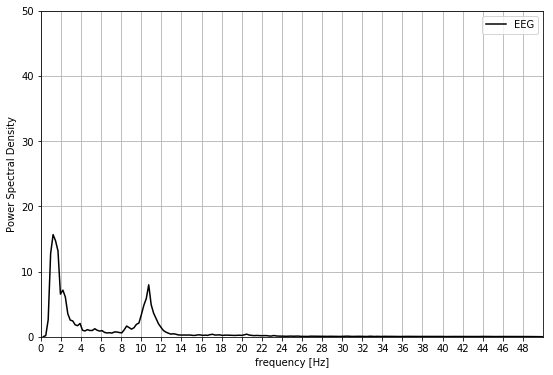

Opening raw data file /home/kovar/thesis_project/data/processed/16a.fif...
This filename (/home/kovar/thesis_project/data/processed/16a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15255 =      0.000 ...    61.020 secs
Ready.
resp             0
b/a              0
sex              0
age             39
sfreq          250
sc              29
sc_bef          29
sc_aft          24
dep              1
dep_bef          0
dep_aft          1
change     1.20833
Name: (16, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/16a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


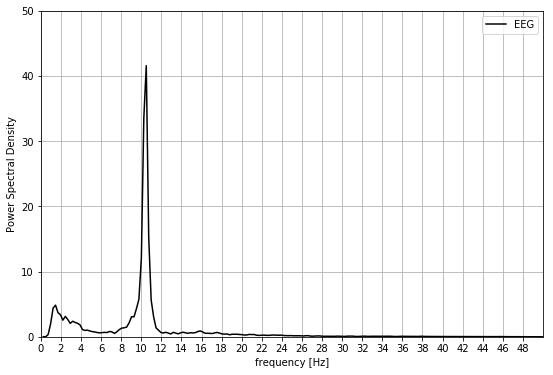

Opening raw data file /home/kovar/thesis_project/data/processed/123b.fif...
This filename (/home/kovar/thesis_project/data/processed/123b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 25961 =      0.000 ...   103.844 secs
Ready.
resp          0
b/a           1
sex           1
age          54
sfreq       250
sc           25
sc_bef       24
sc_aft       25
dep           0
dep_bef      -1
dep_aft       1
change     0.96
Name: (123, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/123b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


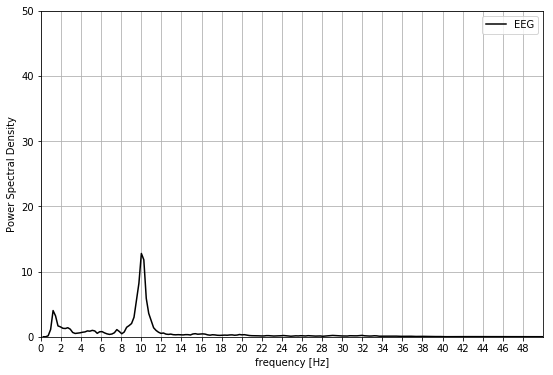

Opening raw data file /home/kovar/thesis_project/data/processed/77a.fif...
This filename (/home/kovar/thesis_project/data/processed/77a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18386 =      0.000 ...    73.544 secs
Ready.
resp          1
b/a           0
sex           0
age          31
sfreq      1000
sc           32
sc_bef       32
sc_aft       10
dep           1
dep_bef       1
dep_aft      -1
change      3.2
Name: (77, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/77a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


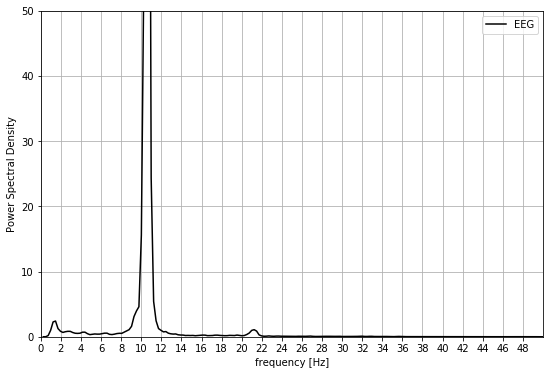

Opening raw data file /home/kovar/thesis_project/data/processed/83b.fif...
This filename (/home/kovar/thesis_project/data/processed/83b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18158 =      0.000 ...    72.632 secs
Ready.
resp             0
b/a              1
sex              1
age             63
sfreq          250
sc              34
sc_bef          41
sc_aft          34
dep              1
dep_bef          1
dep_aft          1
change     1.20588
Name: (83, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/83b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


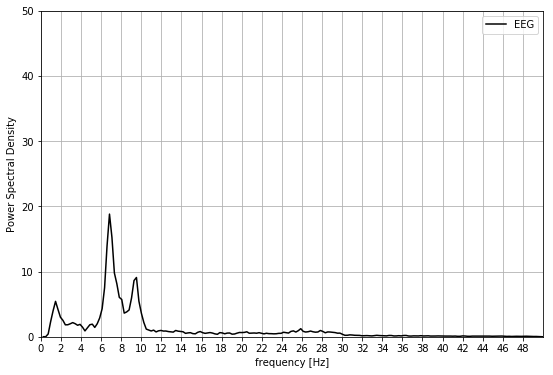

Opening raw data file /home/kovar/thesis_project/data/processed/56a.fif...
This filename (/home/kovar/thesis_project/data/processed/56a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15511 =      0.000 ...    62.044 secs
Ready.
resp             0
b/a              0
sex              0
age             48
sfreq         1000
sc              31
sc_bef          31
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.14815
Name: (56, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/56a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


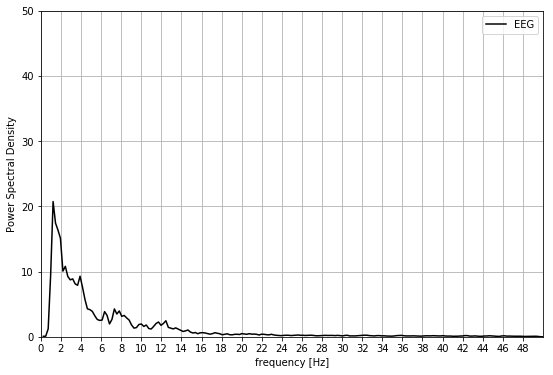

Opening raw data file /home/kovar/thesis_project/data/processed/116b.fif...
This filename (/home/kovar/thesis_project/data/processed/116b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16734 =      0.000 ...    66.936 secs
Ready.
resp             0
b/a              1
sex              0
age             40
sfreq         1000
sc              17
sc_bef          27
sc_aft          17
dep             -1
dep_bef          0
dep_aft          0
change     1.58824
Name: (116, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/116b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


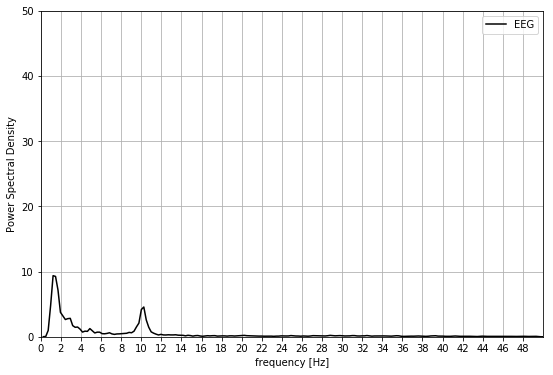

Opening raw data file /home/kovar/thesis_project/data/processed/33b.fif...
This filename (/home/kovar/thesis_project/data/processed/33b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 22941 =      0.000 ...    91.764 secs
Ready.
resp             1
b/a              1
sex              0
age             62
sfreq          250
sc               7
sc_bef          25
sc_aft           7
dep             -1
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (33, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/33b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


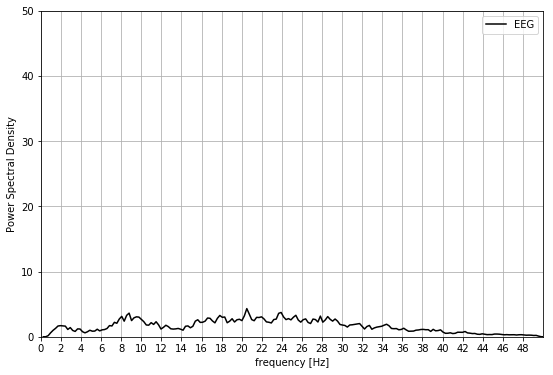

Opening raw data file /home/kovar/thesis_project/data/processed/47a.fif...
This filename (/home/kovar/thesis_project/data/processed/47a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 26145 =      0.000 ...   104.580 secs
Ready.
resp         1
b/a          0
sex          0
age         43
sfreq      250
sc          21
sc_bef      21
sc_aft      10
dep          0
dep_bef     -1
dep_aft     -1
change     2.1
Name: (47, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/47a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


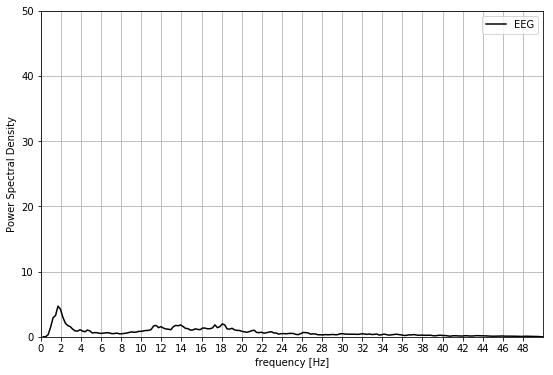

Opening raw data file /home/kovar/thesis_project/data/processed/117a.fif...
This filename (/home/kovar/thesis_project/data/processed/117a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18082 =      0.000 ...    72.328 secs
Ready.
resp             0
b/a              0
sex              0
age             39
sfreq          250
sc              28
sc_bef          28
sc_aft          19
dep              1
dep_bef          0
dep_aft          0
change     1.47368
Name: (117, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/117a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


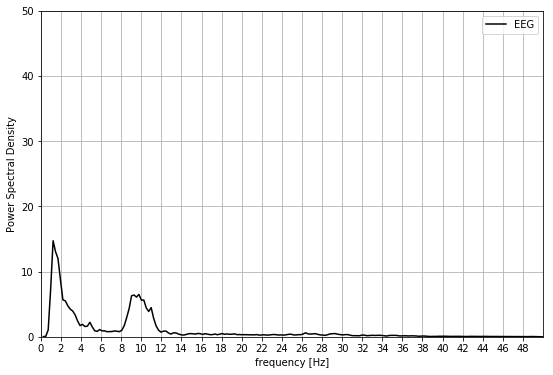

Opening raw data file /home/kovar/thesis_project/data/processed/19a.fif...
This filename (/home/kovar/thesis_project/data/processed/19a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16050 =      0.000 ...    64.200 secs
Ready.
resp              0
b/a               0
sex               0
age              59
sfreq           250
sc               17
sc_bef           17
sc_aft           19
dep              -1
dep_bef          -1
dep_aft           0
change     0.894737
Name: (19, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/19a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


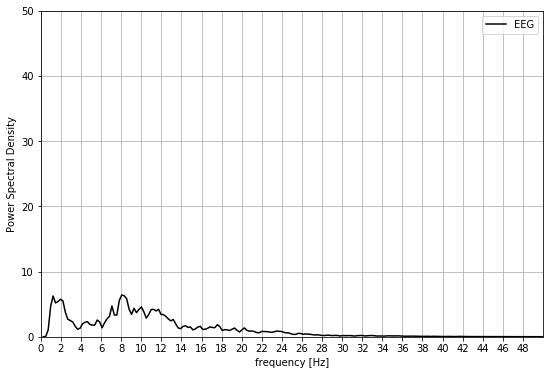

Opening raw data file /home/kovar/thesis_project/data/processed/101a.fif...
This filename (/home/kovar/thesis_project/data/processed/101a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 11823 =      0.000 ...    47.292 secs
Ready.
resp             0
b/a              0
sex              0
age             47
sfreq          250
sc              28
sc_bef          28
sc_aft          15
dep              1
dep_bef          0
dep_aft          0
change     1.86667
Name: (101, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/101a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


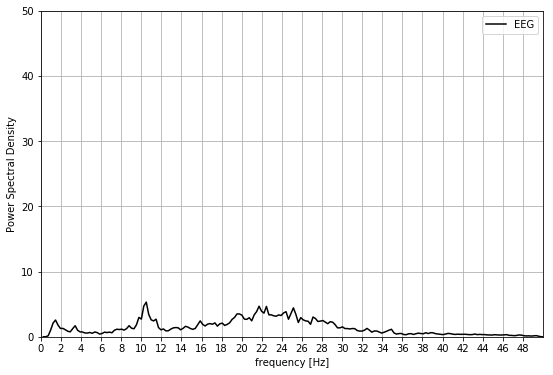

Opening raw data file /home/kovar/thesis_project/data/processed/57b.fif...
This filename (/home/kovar/thesis_project/data/processed/57b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15681 =      0.000 ...    62.724 secs
Ready.
resp             1
b/a              1
sex              1
age             50
sfreq         1000
sc              12
sc_bef          25
sc_aft          12
dep             -1
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (57, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/57b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


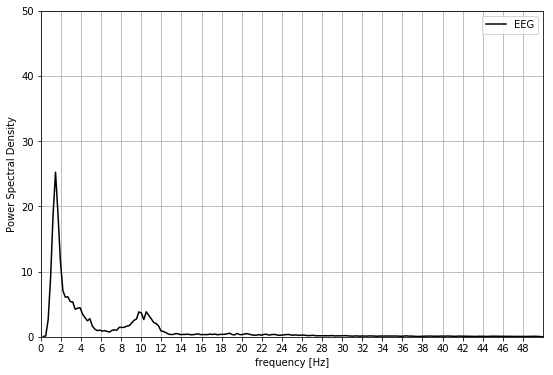

Opening raw data file /home/kovar/thesis_project/data/processed/48a.fif...
This filename (/home/kovar/thesis_project/data/processed/48a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21401 =      0.000 ...    85.604 secs
Ready.
resp             1
b/a              0
sex              0
age             51
sfreq          250
sc              26
sc_bef          26
sc_aft          12
dep              0
dep_bef          0
dep_aft         -1
change     2.16667
Name: (48, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/48a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


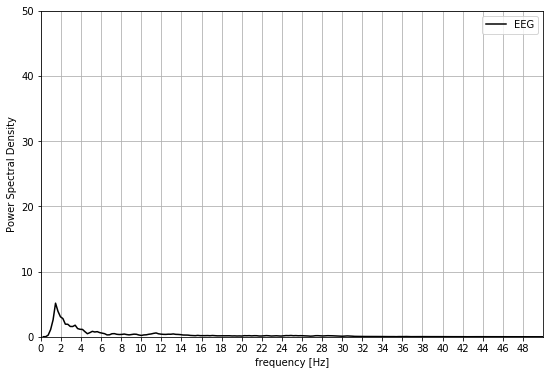

Opening raw data file /home/kovar/thesis_project/data/processed/132b.fif...
This filename (/home/kovar/thesis_project/data/processed/132b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 33615 =      0.000 ...   134.460 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/132b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp         1
b/a          1
sex          0
age         55
sfreq      250
sc          10
sc_bef      27
sc_aft      10
dep         -1
dep_bef      0
dep_aft     -1
change     2.7
Name: (132, b), dtype: object


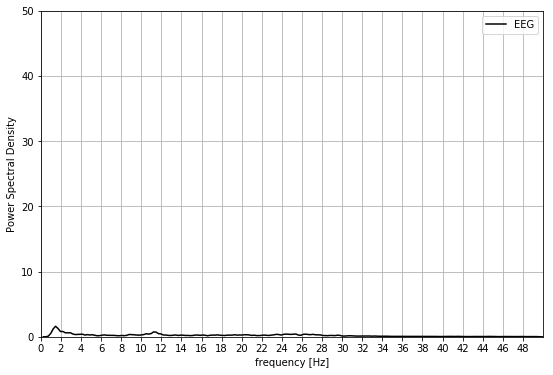

Opening raw data file /home/kovar/thesis_project/data/processed/116a.fif...
This filename (/home/kovar/thesis_project/data/processed/116a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15695 =      0.000 ...    62.780 secs
Ready.
resp             0
b/a              0
sex              0
age             40
sfreq         1000
sc              27
sc_bef          27
sc_aft          17
dep              1
dep_bef          0
dep_aft          0
change     1.58824
Name: (116, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/116a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


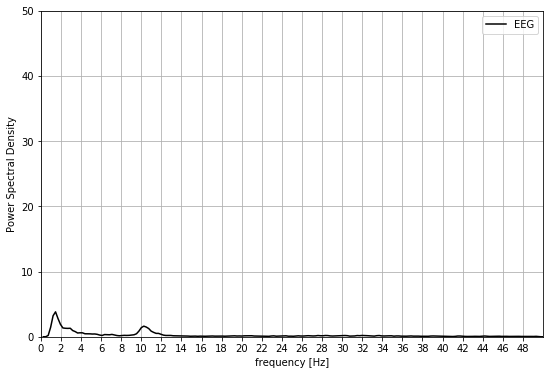

Opening raw data file /home/kovar/thesis_project/data/processed/127a.fif...
This filename (/home/kovar/thesis_project/data/processed/127a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 25087 =      0.000 ...   100.348 secs
Ready.
resp             0
b/a              0
sex              0
age             35
sfreq          250
sc              25
sc_bef          25
sc_aft          21
dep              0
dep_bef         -1
dep_aft          1
change     1.19048
Name: (127, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/127a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


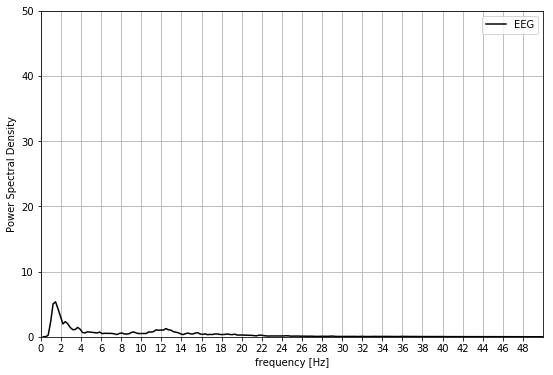

Opening raw data file /home/kovar/thesis_project/data/processed/45a.fif...
This filename (/home/kovar/thesis_project/data/processed/45a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15800 =      0.000 ...    63.200 secs
Ready.
resp          0
b/a           0
sex           0
age          51
sfreq       250
sc           27
sc_bef       27
sc_aft       25
dep           1
dep_bef       0
dep_aft       1
change     1.08
Name: (45, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/45a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


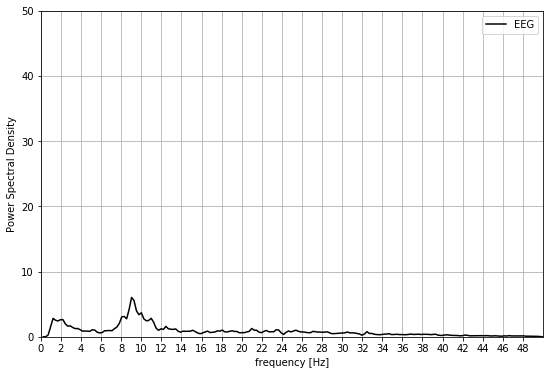

Opening raw data file /home/kovar/thesis_project/data/processed/23b.fif...
This filename (/home/kovar/thesis_project/data/processed/23b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21450 =      0.000 ...    85.800 secs
Ready.
resp           1
b/a            1
sex            0
age           46
sfreq       1000
sc             8
sc_bef        29
sc_aft         8
dep           -1
dep_bef        0
dep_aft       -1
change     3.625
Name: (23, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/23b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


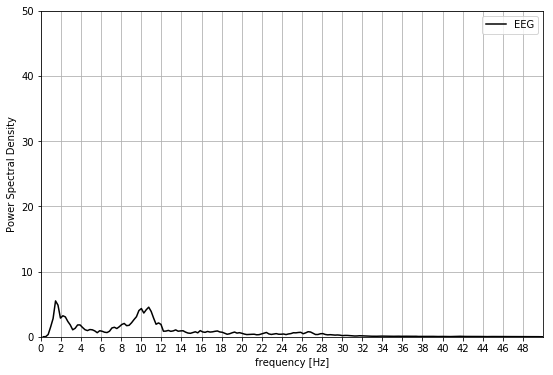

Opening raw data file /home/kovar/thesis_project/data/processed/71a.fif...
This filename (/home/kovar/thesis_project/data/processed/71a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19188 =      0.000 ...    76.752 secs
Ready.
resp         1
b/a          0
sex          0
age         41
sfreq      250
sc          23
sc_bef      23
sc_aft       5
dep          0
dep_bef     -1
dep_aft     -1
change     4.6
Name: (71, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/71a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


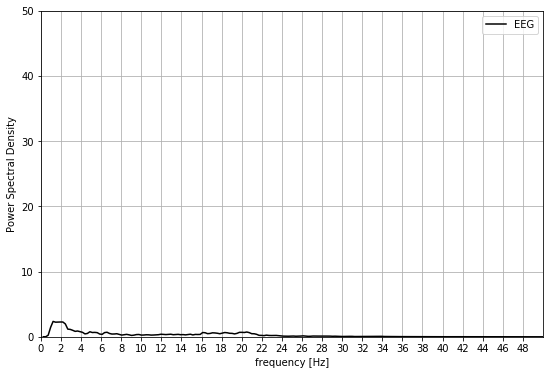

Opening raw data file /home/kovar/thesis_project/data/processed/65b.fif...
This filename (/home/kovar/thesis_project/data/processed/65b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17318 =      0.000 ...    69.272 secs
Ready.
resp            0
b/a             1
sex             0
age            46
sfreq         250
sc             16
sc_bef         23
sc_aft         16
dep            -1
dep_bef        -1
dep_aft         0
change     1.4375
Name: (65, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/65b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


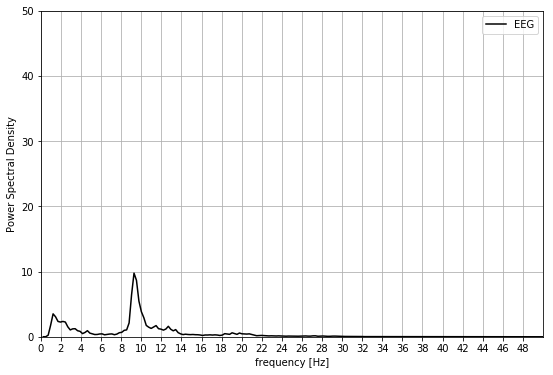

Opening raw data file /home/kovar/thesis_project/data/processed/2b.fif...
This filename (/home/kovar/thesis_project/data/processed/2b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17652 =      0.000 ...    70.608 secs
Ready.
resp             0
b/a              1
sex              0
age             36
sfreq          250
sc              30
sc_bef          31
sc_aft          30
dep              1
dep_bef          1
dep_aft          1
change     1.03333
Name: (2, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/2b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


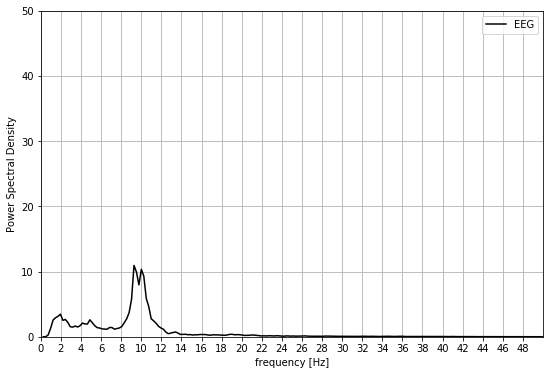

Opening raw data file /home/kovar/thesis_project/data/processed/42b.fif...
This filename (/home/kovar/thesis_project/data/processed/42b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19952 =      0.000 ...    79.808 secs
Ready.
resp             0
b/a              1
sex              0
age             61
sfreq         1000
sc              17
sc_bef          28
sc_aft          17
dep             -1
dep_bef          0
dep_aft          0
change     1.64706
Name: (42, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/42b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


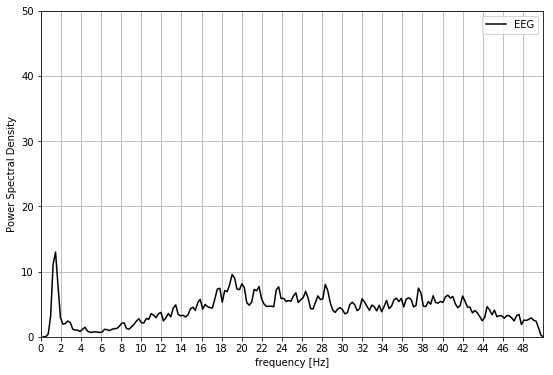

Opening raw data file /home/kovar/thesis_project/data/processed/1a.fif...
This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.
resp         1
b/a          0
sex          0
age         49
sfreq      250
sc          26
sc_bef      26
sc_aft      13
dep          0
dep_bef      0
dep_aft      0
change       2
Name: (1, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


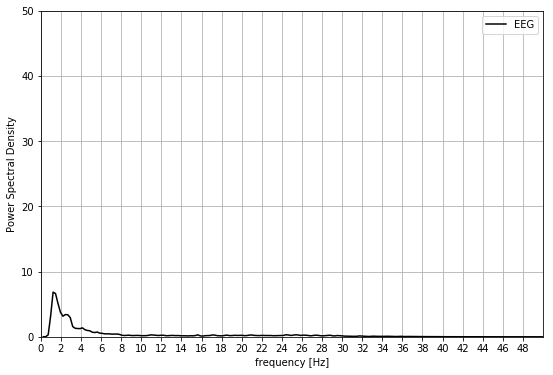

Opening raw data file /home/kovar/thesis_project/data/processed/100a.fif...
This filename (/home/kovar/thesis_project/data/processed/100a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 12393 =      0.000 ...    49.572 secs
Ready.
resp             1
b/a              0
sex              0
age             52
sfreq         1000
sc              25
sc_bef          25
sc_aft           7
dep              0
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (100, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/100a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


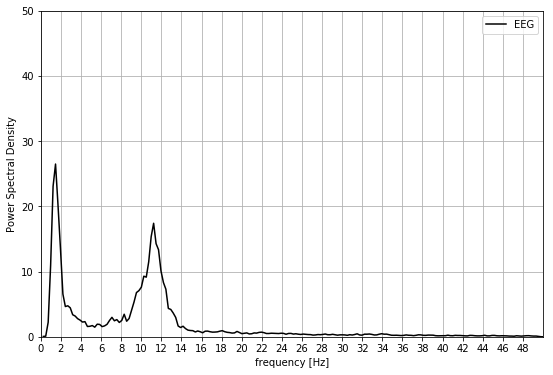

Opening raw data file /home/kovar/thesis_project/data/processed/99a.fif...
This filename (/home/kovar/thesis_project/data/processed/99a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19691 =      0.000 ...    78.764 secs
Ready.
resp             0
b/a              0
sex              0
age             47
sfreq          250
sc              23
sc_bef          23
sc_aft          21
dep              0
dep_bef         -1
dep_aft          1
change     1.09524
Name: (99, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/99a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


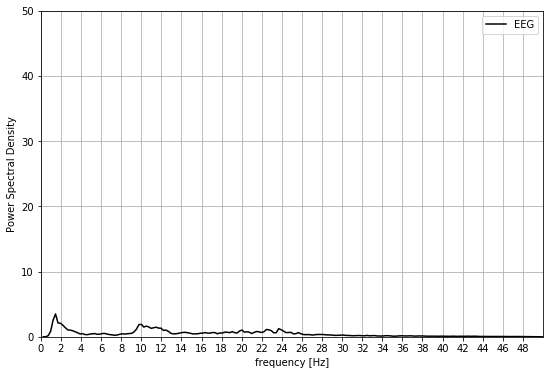

Opening raw data file /home/kovar/thesis_project/data/processed/58b.fif...
This filename (/home/kovar/thesis_project/data/processed/58b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19664 =      0.000 ...    78.656 secs
Ready.
resp             1
b/a              1
sex              0
age             41
sfreq         1000
sc              12
sc_bef          28
sc_aft          12
dep             -1
dep_bef          0
dep_aft         -1
change     2.33333
Name: (58, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/58b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


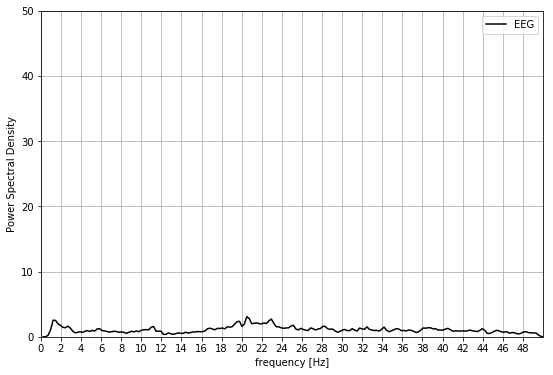

Opening raw data file /home/kovar/thesis_project/data/processed/120a.fif...
This filename (/home/kovar/thesis_project/data/processed/120a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16061 =      0.000 ...    64.244 secs
Ready.
resp             0
b/a              0
sex              0
age             41
sfreq         1000
sc              28
sc_bef          28
sc_aft          19
dep              1
dep_bef          0
dep_aft          0
change     1.47368
Name: (120, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/120a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


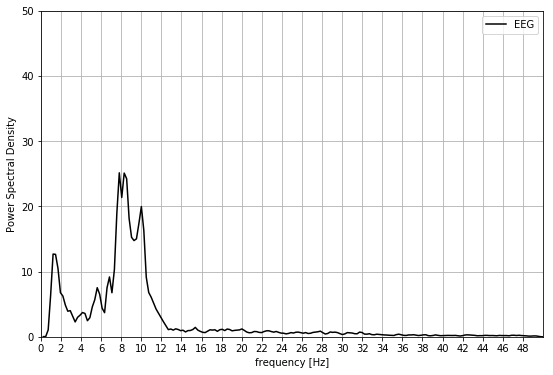

Opening raw data file /home/kovar/thesis_project/data/processed/56b.fif...
This filename (/home/kovar/thesis_project/data/processed/56b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 25134 =      0.000 ...   100.536 secs
Ready.
resp             0
b/a              1
sex              0
age             48
sfreq         1000
sc              27
sc_bef          31
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.14815
Name: (56, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/56b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


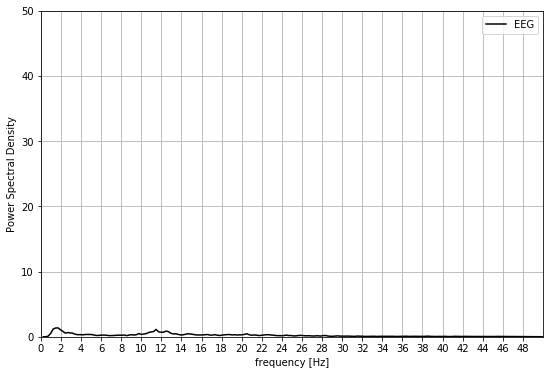

Opening raw data file /home/kovar/thesis_project/data/processed/91b.fif...
This filename (/home/kovar/thesis_project/data/processed/91b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              1
sex              0
age             51
sfreq         1000
sc              14
sc_bef          29
sc_aft          14
dep             -1
dep_bef          0
dep_aft          0
change     2.07143
Name: (91, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/91b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


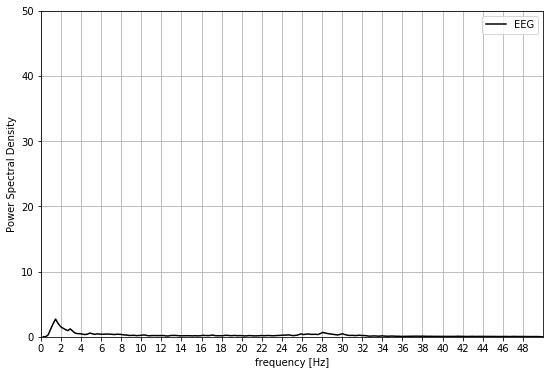

Opening raw data file /home/kovar/thesis_project/data/processed/53a.fif...
This filename (/home/kovar/thesis_project/data/processed/53a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 14736 =      0.000 ...    58.944 secs
Ready.
resp             0
b/a              0
sex              0
age             51
sfreq          250
sc              31
sc_bef          31
sc_aft          18
dep              1
dep_bef          1
dep_aft          0
change     1.72222
Name: (53, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/53a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


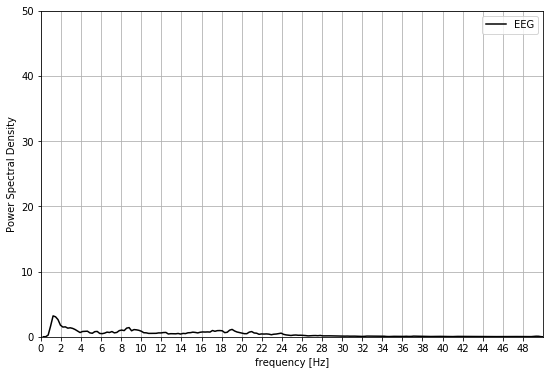

Opening raw data file /home/kovar/thesis_project/data/processed/75a.fif...
This filename (/home/kovar/thesis_project/data/processed/75a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18892 =      0.000 ...    75.568 secs
Ready.
resp         1
b/a          0
sex          0
age         30
sfreq      250
sc          20
sc_bef      20
sc_aft      10
dep          0
dep_bef     -1
dep_aft     -1
change       2
Name: (75, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/75a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


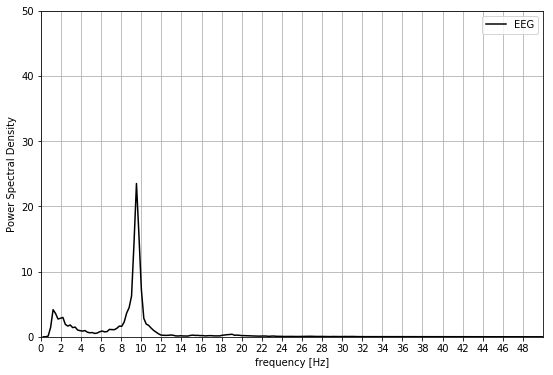

Opening raw data file /home/kovar/thesis_project/data/processed/43b.fif...
This filename (/home/kovar/thesis_project/data/processed/43b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15846 =      0.000 ...    63.384 secs
Ready.
resp             1
b/a              1
sex              1
age             43
sfreq          250
sc              12
sc_bef          28
sc_aft          12
dep             -1
dep_bef          0
dep_aft         -1
change     2.33333
Name: (43, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/43b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


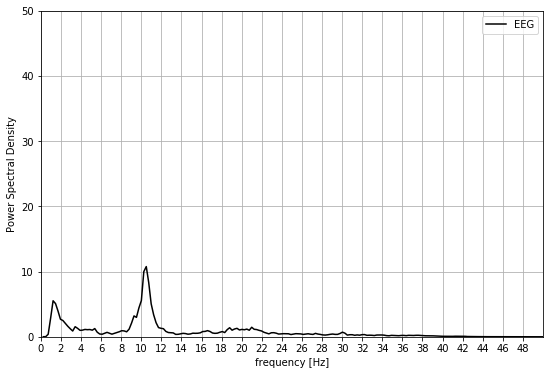

Opening raw data file /home/kovar/thesis_project/data/processed/23a.fif...
This filename (/home/kovar/thesis_project/data/processed/23a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21208 =      0.000 ...    84.832 secs
Ready.
resp           1
b/a            0
sex            0
age           46
sfreq       1000
sc            29
sc_bef        29
sc_aft         8
dep            1
dep_bef        0
dep_aft       -1
change     3.625
Name: (23, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/23a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


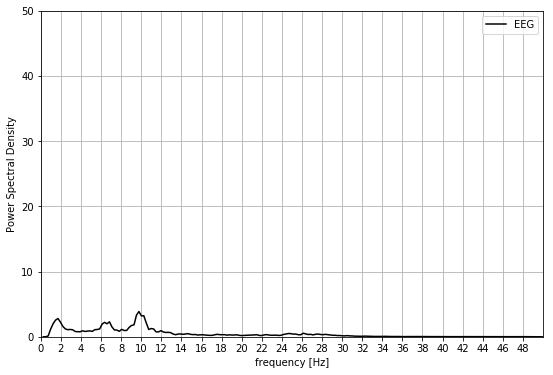

Opening raw data file /home/kovar/thesis_project/data/processed/58a.fif...
This filename (/home/kovar/thesis_project/data/processed/58a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19372 =      0.000 ...    77.488 secs
Ready.
resp             1
b/a              0
sex              0
age             41
sfreq         1000
sc              28
sc_bef          28
sc_aft          12
dep              1
dep_bef          0
dep_aft         -1
change     2.33333
Name: (58, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/58a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


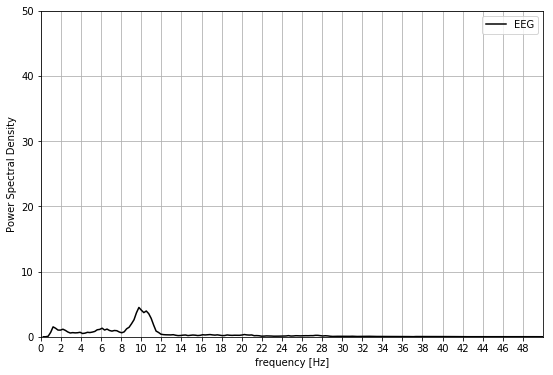

Opening raw data file /home/kovar/thesis_project/data/processed/10a.fif...
This filename (/home/kovar/thesis_project/data/processed/10a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18472 =      0.000 ...    73.888 secs
Ready.
resp             1
b/a              0
sex              0
age             49
sfreq          250
sc              36
sc_bef          36
sc_aft          17
dep              1
dep_bef          1
dep_aft          0
change     2.11765
Name: (10, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/10a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


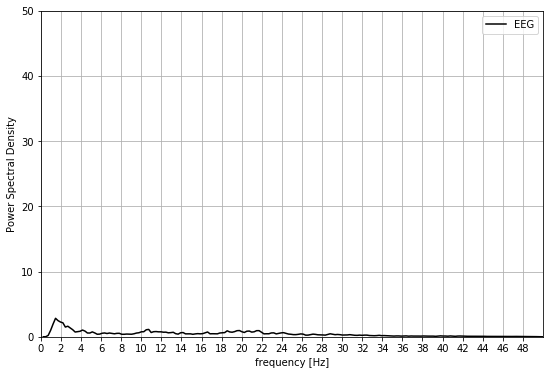

Opening raw data file /home/kovar/thesis_project/data/processed/89b.fif...
This filename (/home/kovar/thesis_project/data/processed/89b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 26917 =      0.000 ...   107.668 secs
Ready.
resp             0
b/a              1
sex              0
age             52
sfreq         1000
sc              24
sc_bef          31
sc_aft          24
dep              0
dep_bef          1
dep_aft          1
change     1.29167
Name: (89, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/89b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


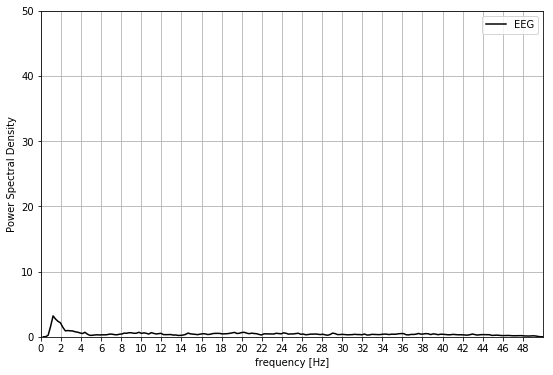

Opening raw data file /home/kovar/thesis_project/data/processed/100b.fif...
This filename (/home/kovar/thesis_project/data/processed/100b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17015 =      0.000 ...    68.060 secs
Ready.
resp             1
b/a              1
sex              0
age             52
sfreq         1000
sc               7
sc_bef          25
sc_aft           7
dep             -1
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (100, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/100b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


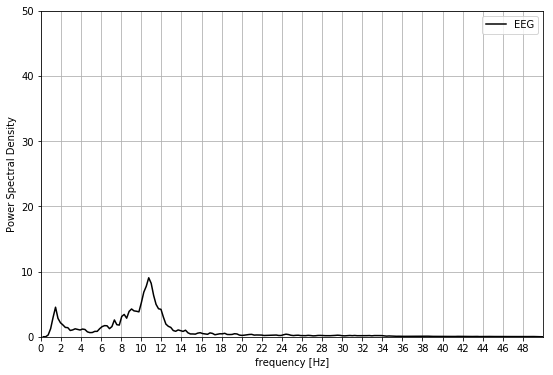

Opening raw data file /home/kovar/thesis_project/data/processed/126b.fif...
This filename (/home/kovar/thesis_project/data/processed/126b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18722 =      0.000 ...    74.888 secs
Ready.
resp             0
b/a              1
sex              0
age             40
sfreq          250
sc              17
sc_bef          25
sc_aft          17
dep             -1
dep_bef         -1
dep_aft          0
change     1.47059
Name: (126, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/126b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


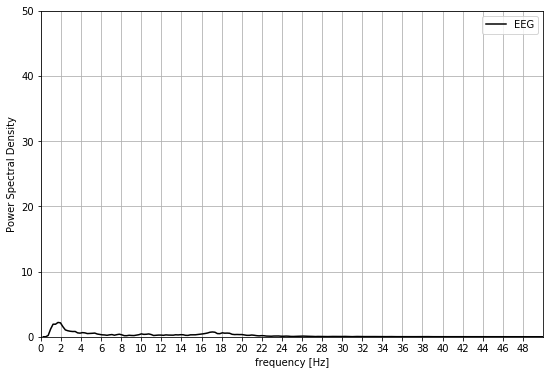

Opening raw data file /home/kovar/thesis_project/data/processed/72a.fif...
This filename (/home/kovar/thesis_project/data/processed/72a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16666 =      0.000 ...    66.664 secs
Ready.
resp             0
b/a              0
sex              0
age             55
sfreq          250
sc              23
sc_bef          23
sc_aft          18
dep              0
dep_bef         -1
dep_aft          0
change     1.27778
Name: (72, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/72a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


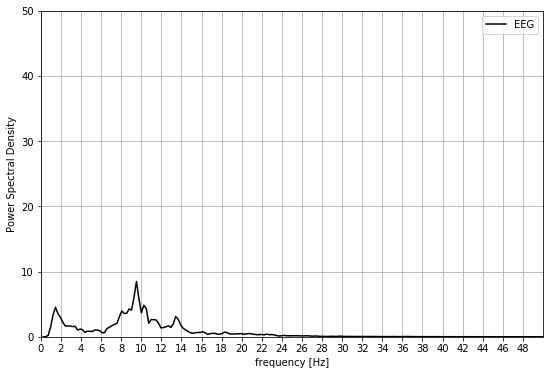

Opening raw data file /home/kovar/thesis_project/data/processed/68b.fif...
This filename (/home/kovar/thesis_project/data/processed/68b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23068 =      0.000 ...    92.272 secs
Ready.
resp             1
b/a              1
sex              0
age             55
sfreq         1000
sc              11
sc_bef          25
sc_aft          11
dep             -1
dep_bef         -1
dep_aft         -1
change     2.27273
Name: (68, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/68b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


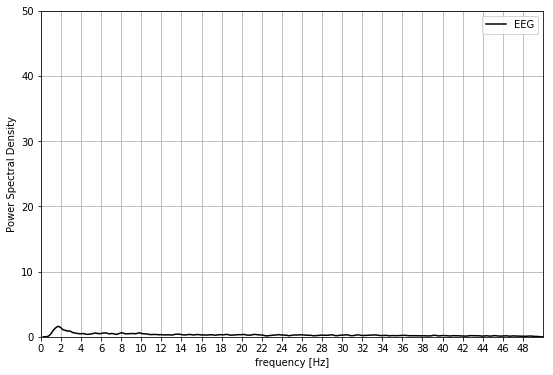

Opening raw data file /home/kovar/thesis_project/data/processed/115b.fif...
This filename (/home/kovar/thesis_project/data/processed/115b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19586 =      0.000 ...    78.344 secs
Ready.
resp         1
b/a          1
sex          0
age         30
sfreq      250
sc          10
sc_bef      21
sc_aft      10
dep         -1
dep_bef     -1
dep_aft     -1
change     2.1
Name: (115, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/115b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


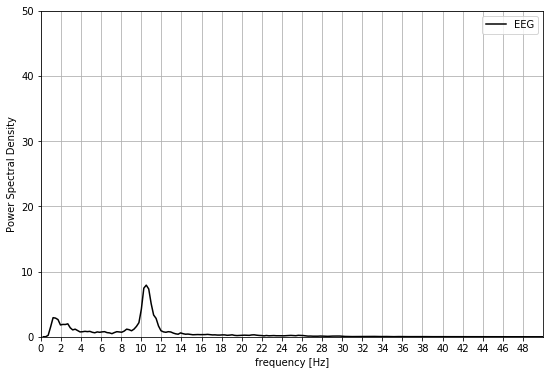

Opening raw data file /home/kovar/thesis_project/data/processed/104b.fif...
This filename (/home/kovar/thesis_project/data/processed/104b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16885 =      0.000 ...    67.540 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/104b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp         1
b/a          1
sex          0
age         64
sfreq      250
sc           2
sc_bef      32
sc_aft       2
dep         -1
dep_bef      1
dep_aft     -1
change      16
Name: (104, b), dtype: object


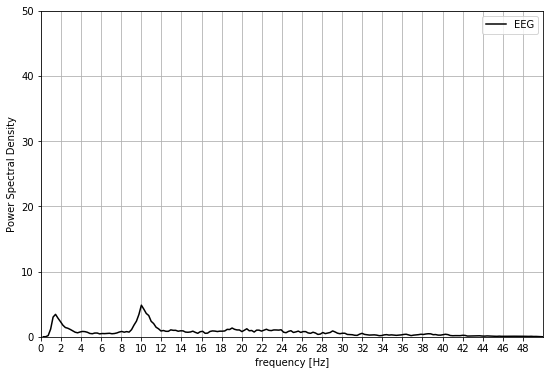

Opening raw data file /home/kovar/thesis_project/data/processed/67b.fif...
This filename (/home/kovar/thesis_project/data/processed/67b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17764 =      0.000 ...    71.056 secs
Ready.
resp             0
b/a              1
sex              0
age             54
sfreq          250
sc              23
sc_bef          24
sc_aft          23
dep              0
dep_bef         -1
dep_aft          1
change     1.04348
Name: (67, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/67b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


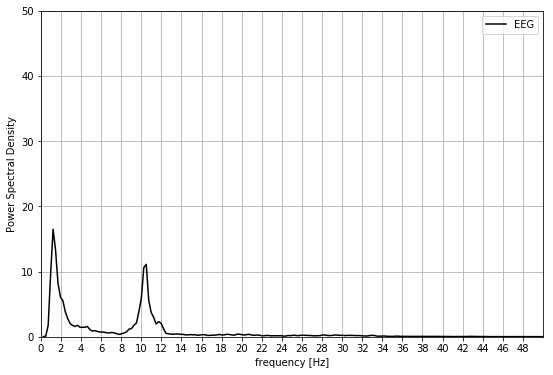

Opening raw data file /home/kovar/thesis_project/data/processed/66b.fif...
This filename (/home/kovar/thesis_project/data/processed/66b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 12931 =      0.000 ...    51.724 secs
Ready.
resp             0
b/a              1
sex              0
age             42
sfreq          250
sc              24
sc_bef          28
sc_aft          24
dep              0
dep_bef          0
dep_aft          1
change     1.16667
Name: (66, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/66b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


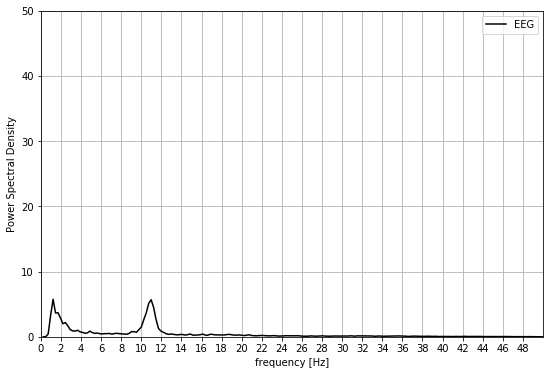

Opening raw data file /home/kovar/thesis_project/data/processed/30b.fif...
This filename (/home/kovar/thesis_project/data/processed/30b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17610 =      0.000 ...    70.440 secs
Ready.
resp             0
b/a              1
sex              0
age             37
sfreq          250
sc              22
sc_bef          31
sc_aft          22
dep              0
dep_bef          1
dep_aft          1
change     1.40909
Name: (30, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/30b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


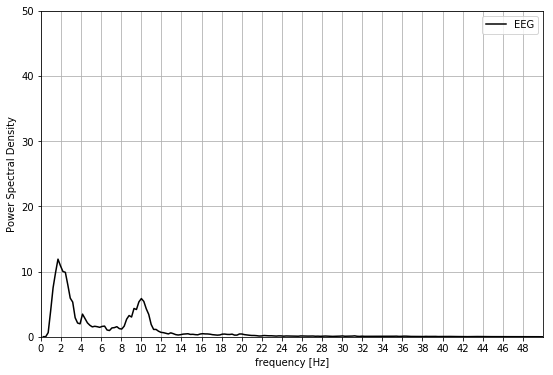

Opening raw data file /home/kovar/thesis_project/data/processed/123a.fif...
This filename (/home/kovar/thesis_project/data/processed/123a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16044 =      0.000 ...    64.176 secs
Ready.
resp          0
b/a           0
sex           1
age          54
sfreq       250
sc           24
sc_bef       24
sc_aft       25
dep           0
dep_bef      -1
dep_aft       1
change     0.96
Name: (123, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/123a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


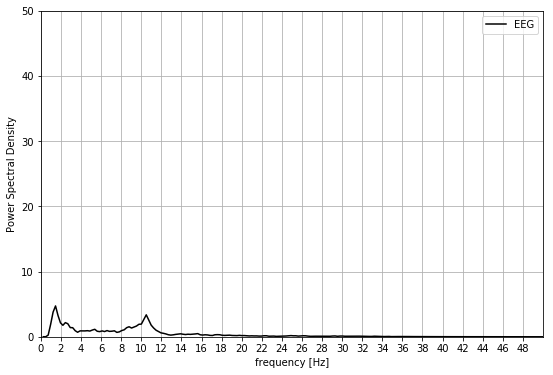

Opening raw data file /home/kovar/thesis_project/data/processed/48b.fif...
This filename (/home/kovar/thesis_project/data/processed/48b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19357 =      0.000 ...    77.428 secs
Ready.
resp             1
b/a              1
sex              0
age             51
sfreq          250
sc              12
sc_bef          26
sc_aft          12
dep             -1
dep_bef          0
dep_aft         -1
change     2.16667
Name: (48, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/48b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


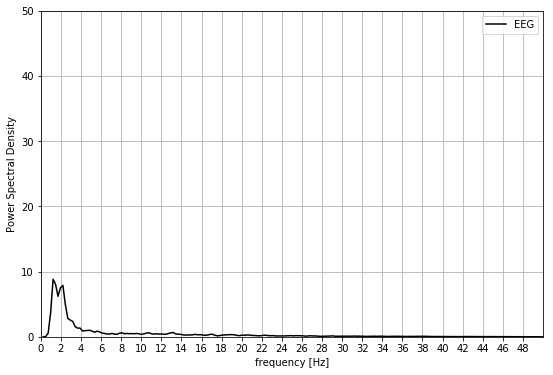

Opening raw data file /home/kovar/thesis_project/data/processed/108b.fif...
This filename (/home/kovar/thesis_project/data/processed/108b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20868 =      0.000 ...    83.472 secs
Ready.
resp             1
b/a              1
sex              0
age             65
sfreq          250
sc              11
sc_bef          27
sc_aft          11
dep             -1
dep_bef          0
dep_aft         -1
change     2.45455
Name: (108, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/108b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


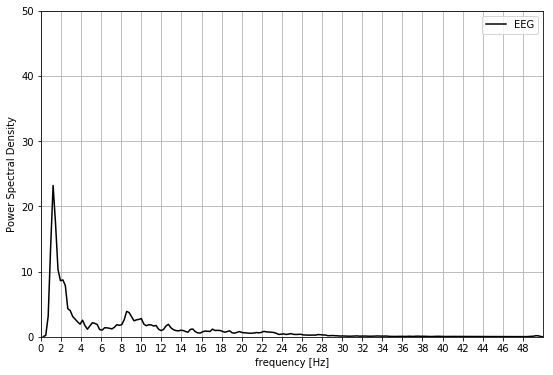

Opening raw data file /home/kovar/thesis_project/data/processed/86b.fif...
This filename (/home/kovar/thesis_project/data/processed/86b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16216 =      0.000 ...    64.864 secs
Ready.
resp             1
b/a              1
sex              0
age             30
sfreq          250
sc              17
sc_bef          35
sc_aft          17
dep             -1
dep_bef          1
dep_aft          0
change     2.05882
Name: (86, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/86b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


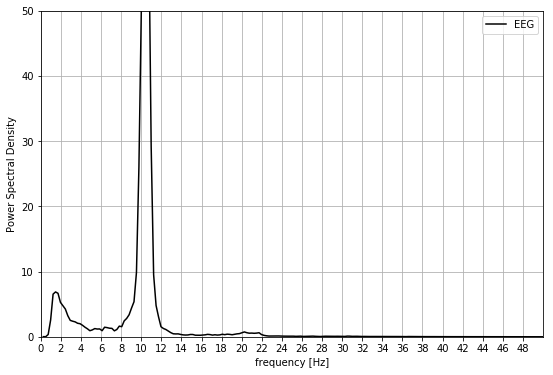

Opening raw data file /home/kovar/thesis_project/data/processed/109a.fif...
This filename (/home/kovar/thesis_project/data/processed/109a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 27887 =      0.000 ...   111.548 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/109a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              0
age             37
sfreq          250
sc              28
sc_bef          28
sc_aft          18
dep              1
dep_bef          0
dep_aft          0
change     1.55556
Name: (109, a), dtype: object


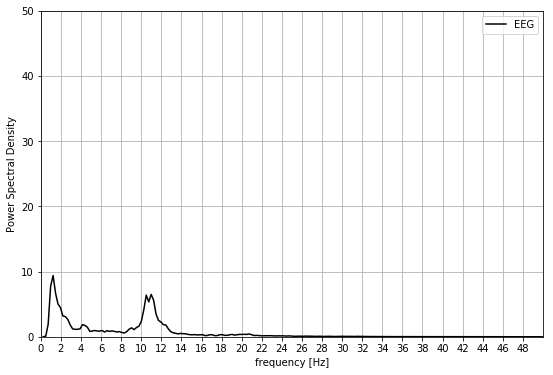

Opening raw data file /home/kovar/thesis_project/data/processed/124a.fif...
This filename (/home/kovar/thesis_project/data/processed/124a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 31310 =      0.000 ...   125.240 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/124a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              0
age             52
sfreq          250
sc              30
sc_bef          30
sc_aft          23
dep              1
dep_bef          1
dep_aft          1
change     1.30435
Name: (124, a), dtype: object


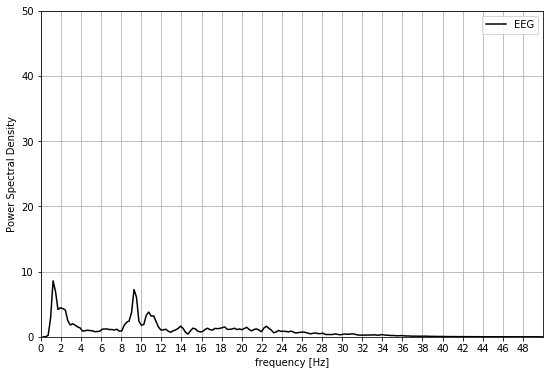

Opening raw data file /home/kovar/thesis_project/data/processed/3b.fif...
This filename (/home/kovar/thesis_project/data/processed/3b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16223 =      0.000 ...    64.892 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/3b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             1
b/a              1
sex              0
age             48
sfreq          250
sc               7
sc_bef          25
sc_aft           7
dep             -1
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (3, b), dtype: object


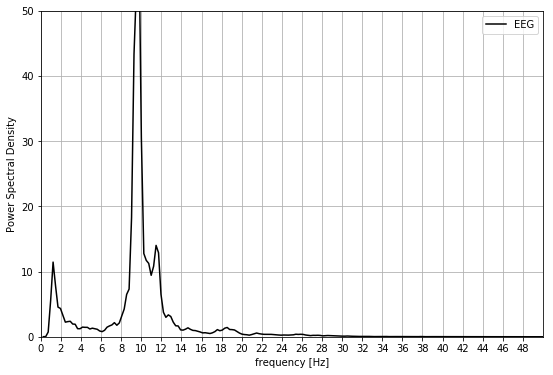

Opening raw data file /home/kovar/thesis_project/data/processed/55b.fif...
This filename (/home/kovar/thesis_project/data/processed/55b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19128 =      0.000 ...    76.512 secs
Ready.
resp         0
b/a          1
sex          0
age         59
sfreq      250
sc          32
sc_bef      32
sc_aft      32
dep          1
dep_bef      1
dep_aft      1
change       1
Name: (55, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/55b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


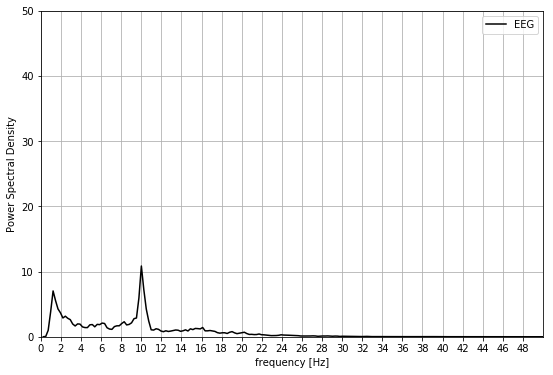

Opening raw data file /home/kovar/thesis_project/data/processed/29b.fif...
This filename (/home/kovar/thesis_project/data/processed/29b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17889 =      0.000 ...    71.556 secs
Ready.
resp             0
b/a              1
sex              1
age             54
sfreq         1000
sc              27
sc_bef          28
sc_aft          27
dep              1
dep_bef          0
dep_aft          1
change     1.03704
Name: (29, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/29b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


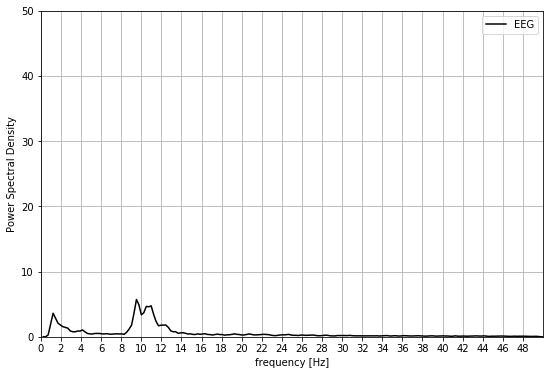

Opening raw data file /home/kovar/thesis_project/data/processed/6a.fif...
This filename (/home/kovar/thesis_project/data/processed/6a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 13421 =      0.000 ...    53.684 secs
Ready.
resp             0
b/a              0
sex              0
age             37
sfreq          250
sc              31
sc_bef          31
sc_aft          17
dep              1
dep_bef          1
dep_aft          0
change     1.82353
Name: (6, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/6a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


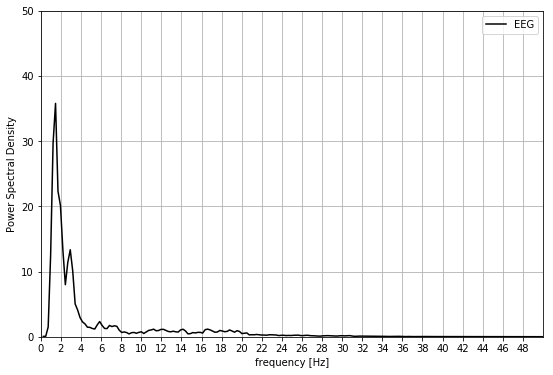

Opening raw data file /home/kovar/thesis_project/data/processed/81a.fif...
This filename (/home/kovar/thesis_project/data/processed/81a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16149 =      0.000 ...    64.596 secs
Ready.
resp             0
b/a              0
sex              1
age             30
sfreq          250
sc              24
sc_bef          24
sc_aft          22
dep              0
dep_bef         -1
dep_aft          1
change     1.09091
Name: (81, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/81a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


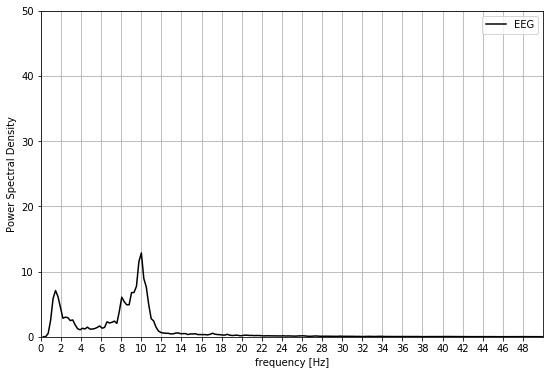

Opening raw data file /home/kovar/thesis_project/data/processed/47b.fif...
This filename (/home/kovar/thesis_project/data/processed/47b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15360 =      0.000 ...    61.440 secs
Ready.
resp         1
b/a          1
sex          0
age         43
sfreq      250
sc          10
sc_bef      21
sc_aft      10
dep         -1
dep_bef     -1
dep_aft     -1
change     2.1
Name: (47, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/47b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


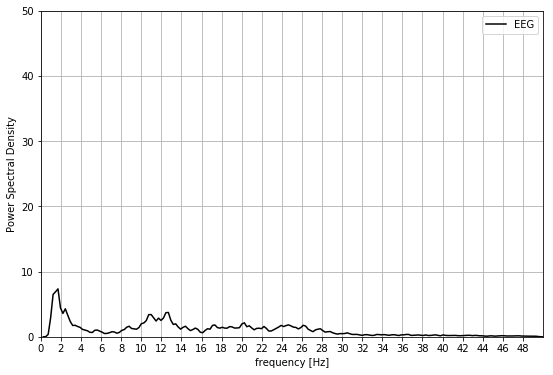

Opening raw data file /home/kovar/thesis_project/data/processed/73a.fif...
This filename (/home/kovar/thesis_project/data/processed/73a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20358 =      0.000 ...    81.432 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/73a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              0
age             53
sfreq          250
sc              23
sc_bef          23
sc_aft          18
dep              0
dep_bef         -1
dep_aft          0
change     1.27778
Name: (73, a), dtype: object


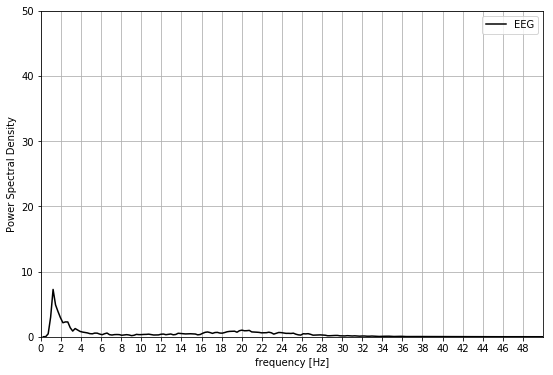

Opening raw data file /home/kovar/thesis_project/data/processed/1b.fif...
This filename (/home/kovar/thesis_project/data/processed/1b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17421 =      0.000 ...    69.684 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp         1
b/a          1
sex          0
age         49
sfreq      250
sc          13
sc_bef      26
sc_aft      13
dep         -1
dep_bef      0
dep_aft      0
change       2
Name: (1, b), dtype: object


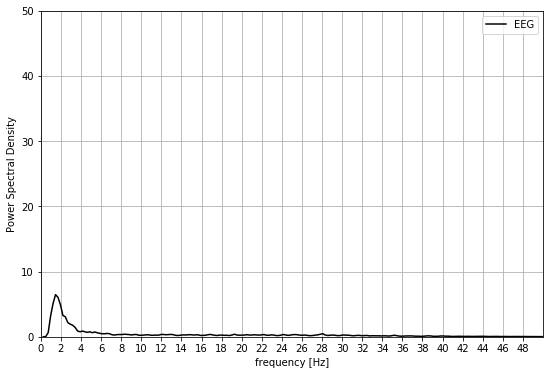

Opening raw data file /home/kovar/thesis_project/data/processed/16b.fif...
This filename (/home/kovar/thesis_project/data/processed/16b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17506 =      0.000 ...    70.024 secs
Ready.
resp             0
b/a              1
sex              0
age             39
sfreq          250
sc              24
sc_bef          29
sc_aft          24
dep              0
dep_bef          0
dep_aft          1
change     1.20833
Name: (16, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/16b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


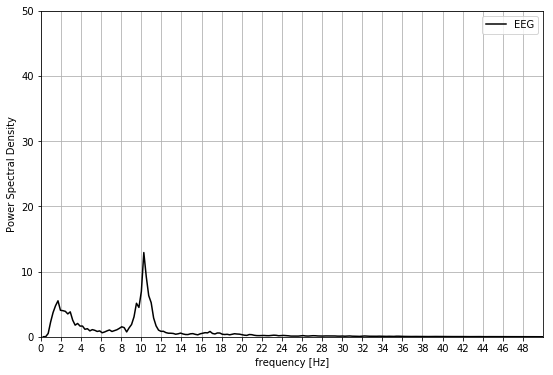

Opening raw data file /home/kovar/thesis_project/data/processed/105b.fif...
This filename (/home/kovar/thesis_project/data/processed/105b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 12493 =      0.000 ...    49.972 secs
Ready.
resp         1
b/a          1
sex          0
age         46
sfreq      250
sc           1
sc_bef      30
sc_aft       1
dep         -1
dep_bef      1
dep_aft     -1
change      30
Name: (105, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/105b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


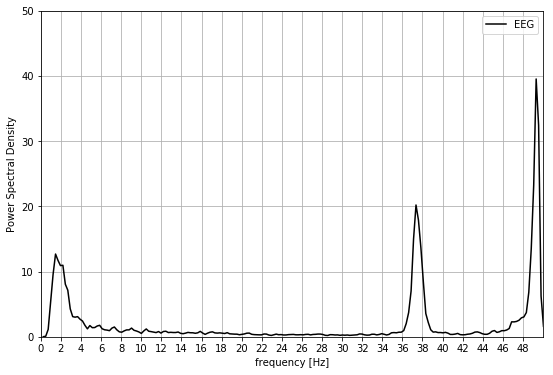

Opening raw data file /home/kovar/thesis_project/data/processed/102a.fif...
This filename (/home/kovar/thesis_project/data/processed/102a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15541 =      0.000 ...    62.164 secs
Ready.
resp         1
b/a          0
sex          1
age         56
sfreq      250
sc          18
sc_bef      18
sc_aft       6
dep         -1
dep_bef     -1
dep_aft     -1
change       3
Name: (102, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/102a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


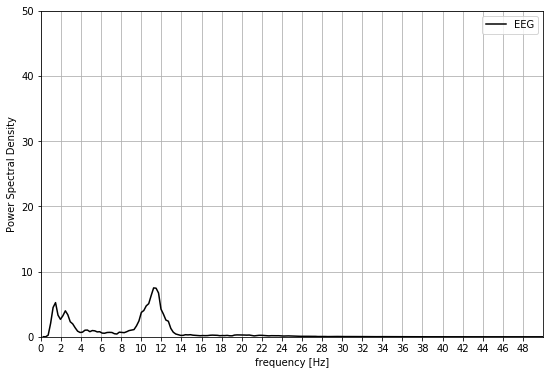

Opening raw data file /home/kovar/thesis_project/data/processed/70b.fif...
This filename (/home/kovar/thesis_project/data/processed/70b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20594 =      0.000 ...    82.376 secs
Ready.
resp             0
b/a              1
sex              0
age             50
sfreq         1000
sc              18
sc_bef          25
sc_aft          18
dep             -1
dep_bef         -1
dep_aft          0
change     1.38889
Name: (70, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/70b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


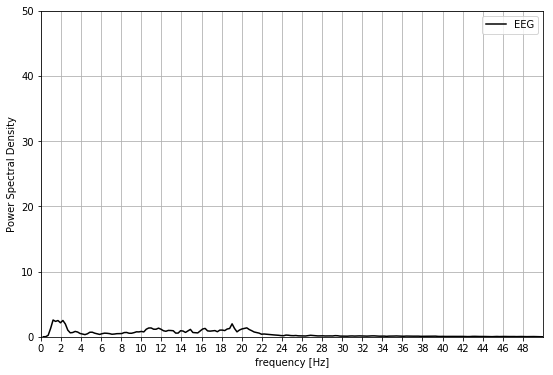

Opening raw data file /home/kovar/thesis_project/data/processed/67a.fif...
This filename (/home/kovar/thesis_project/data/processed/67a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16667 =      0.000 ...    66.668 secs
Ready.
resp             0
b/a              0
sex              0
age             54
sfreq          250
sc              24
sc_bef          24
sc_aft          23
dep              0
dep_bef         -1
dep_aft          1
change     1.04348
Name: (67, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/67a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


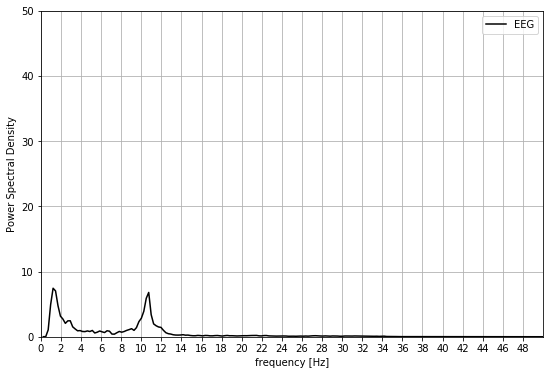

Opening raw data file /home/kovar/thesis_project/data/processed/19b.fif...
This filename (/home/kovar/thesis_project/data/processed/19b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 42710 =      0.000 ...   170.840 secs
Ready.
resp              0
b/a               1
sex               0
age              59
sfreq           250
sc               19
sc_bef           17
sc_aft           19
dep              -1
dep_bef          -1
dep_aft           0
change     0.894737
Name: (19, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/19b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


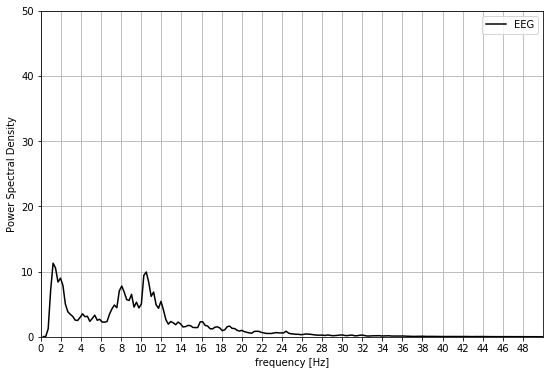

Opening raw data file /home/kovar/thesis_project/data/processed/111a.fif...
This filename (/home/kovar/thesis_project/data/processed/111a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17275 =      0.000 ...    69.100 secs
Ready.
resp          1
b/a           0
sex           0
age          42
sfreq      1000
sc           29
sc_bef       29
sc_aft        4
dep           1
dep_bef       0
dep_aft      -1
change     7.25
Name: (111, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/111a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


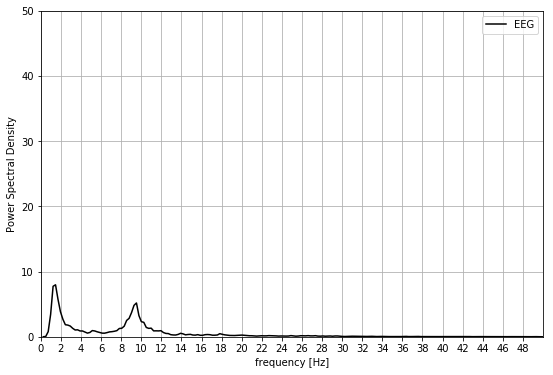

Opening raw data file /home/kovar/thesis_project/data/processed/33a.fif...
This filename (/home/kovar/thesis_project/data/processed/33a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              0
sex              0
age             62
sfreq          250
sc              25
sc_bef          25
sc_aft           7
dep              0
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (33, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/33a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


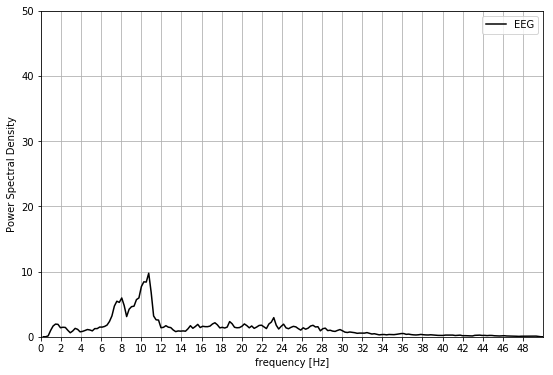

Opening raw data file /home/kovar/thesis_project/data/processed/129a.fif...
This filename (/home/kovar/thesis_project/data/processed/129a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21740 =      0.000 ...    86.960 secs
Ready.
resp         1
b/a          0
sex          0
age         38
sfreq      250
sc          27
sc_bef      27
sc_aft       6
dep          1
dep_bef      0
dep_aft     -1
change     4.5
Name: (129, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/129a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


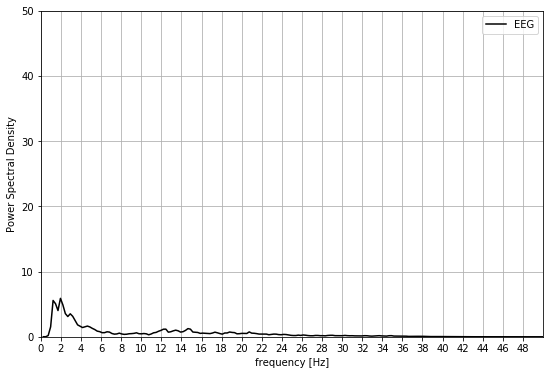

Opening raw data file /home/kovar/thesis_project/data/processed/106b.fif...
This filename (/home/kovar/thesis_project/data/processed/106b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18572 =      0.000 ...    74.288 secs
Ready.
resp             1
b/a              1
sex              0
age             35
sfreq          250
sc               7
sc_bef          31
sc_aft           7
dep             -1
dep_bef          1
dep_aft         -1
change     4.42857
Name: (106, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/106b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


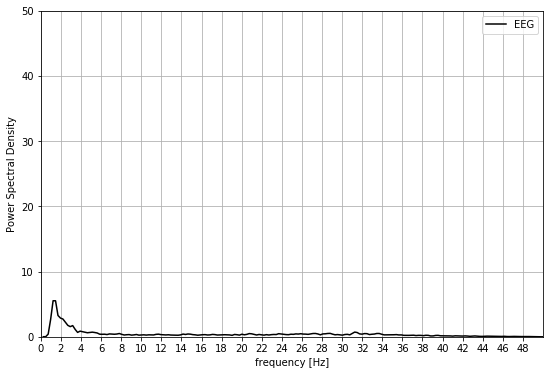

Opening raw data file /home/kovar/thesis_project/data/processed/89a.fif...
This filename (/home/kovar/thesis_project/data/processed/89a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18703 =      0.000 ...    74.812 secs
Ready.
resp             0
b/a              0
sex              0
age             52
sfreq         1000
sc              31
sc_bef          31
sc_aft          24
dep              1
dep_bef          1
dep_aft          1
change     1.29167
Name: (89, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/89a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


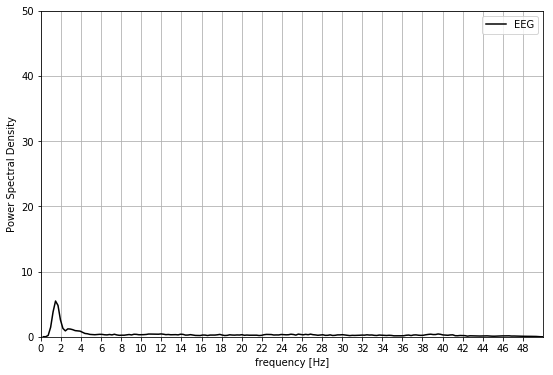

Opening raw data file /home/kovar/thesis_project/data/processed/83a.fif...
This filename (/home/kovar/thesis_project/data/processed/83a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              0
sex              1
age             63
sfreq          250
sc              41
sc_bef          41
sc_aft          34
dep              1
dep_bef          1
dep_aft          1
change     1.20588
Name: (83, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/83a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


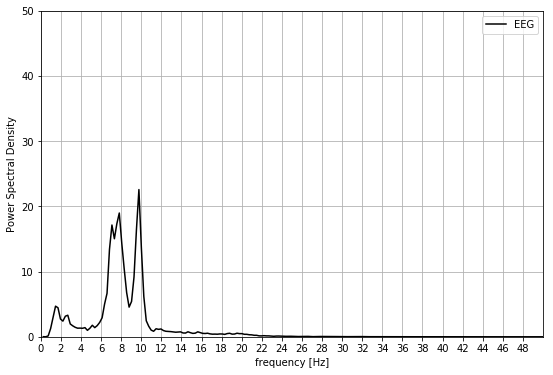

Opening raw data file /home/kovar/thesis_project/data/processed/39a.fif...
This filename (/home/kovar/thesis_project/data/processed/39a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15161 =      0.000 ...    60.644 secs
Ready.
resp             0
b/a              0
sex              1
age             51
sfreq          250
sc              23
sc_bef          23
sc_aft          15
dep              0
dep_bef         -1
dep_aft          0
change     1.53333
Name: (39, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/39a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


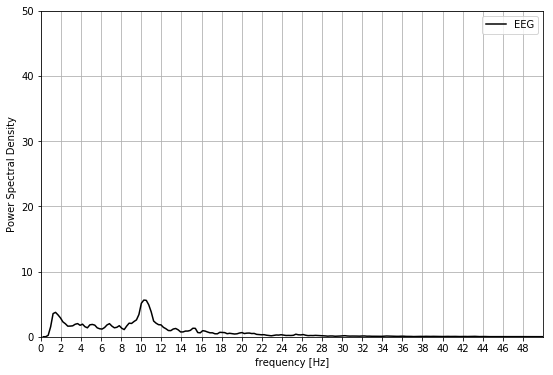

Opening raw data file /home/kovar/thesis_project/data/processed/12b.fif...
This filename (/home/kovar/thesis_project/data/processed/12b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 22053 =      0.000 ...    88.212 secs
Ready.
resp          1
b/a           1
sex           1
age          59
sfreq      1000
sc           12
sc_bef       30
sc_aft       12
dep          -1
dep_bef       1
dep_aft      -1
change      2.5
Name: (12, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/12b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


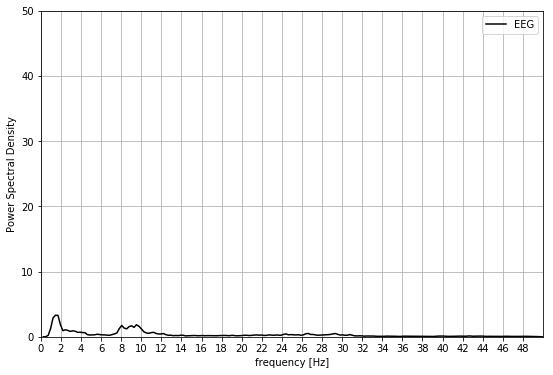

Opening raw data file /home/kovar/thesis_project/data/processed/102b.fif...
This filename (/home/kovar/thesis_project/data/processed/102b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17019 =      0.000 ...    68.076 secs
Ready.
resp         1
b/a          1
sex          1
age         56
sfreq      250
sc           6
sc_bef      18
sc_aft       6
dep         -1
dep_bef     -1
dep_aft     -1
change       3
Name: (102, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/102b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


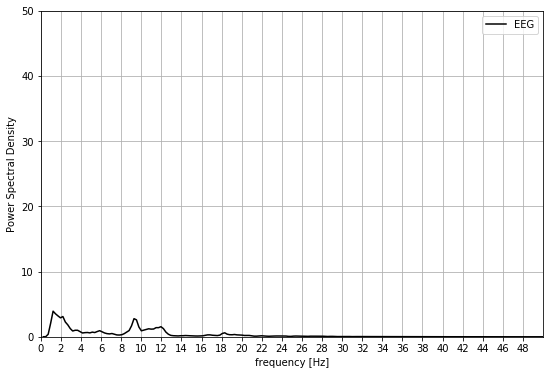

Opening raw data file /home/kovar/thesis_project/data/processed/36a.fif...
This filename (/home/kovar/thesis_project/data/processed/36a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17254 =      0.000 ...    69.016 secs
Ready.
resp           1
b/a            0
sex            1
age           53
sfreq        250
sc            25
sc_bef        25
sc_aft         8
dep            0
dep_bef       -1
dep_aft       -1
change     3.125
Name: (36, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/36a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


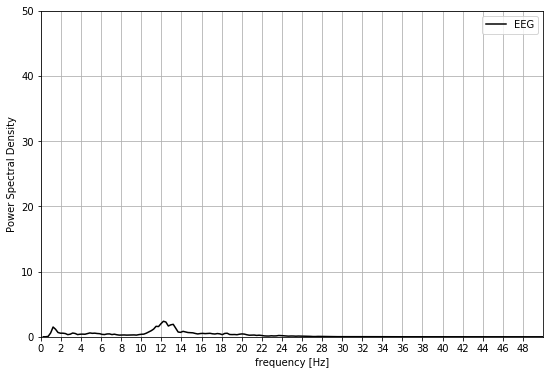

Opening raw data file /home/kovar/thesis_project/data/processed/94a.fif...
This filename (/home/kovar/thesis_project/data/processed/94a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20162 =      0.000 ...    80.648 secs
Ready.
resp             0
b/a              0
sex              0
age             55
sfreq          250
sc              34
sc_bef          34
sc_aft          28
dep              1
dep_bef          1
dep_aft          1
change     1.21429
Name: (94, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/94a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


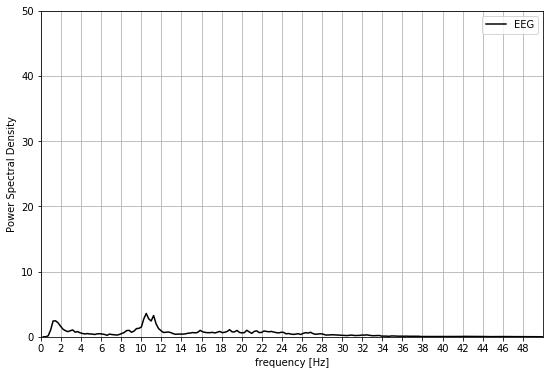

Opening raw data file /home/kovar/thesis_project/data/processed/87b.fif...
This filename (/home/kovar/thesis_project/data/processed/87b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 13043 =      0.000 ...    52.172 secs
Ready.
resp             0
b/a              1
sex              0
age             30
sfreq         1000
sc              24
sc_bef          28
sc_aft          24
dep              0
dep_bef          0
dep_aft          1
change     1.16667
Name: (87, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/87b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


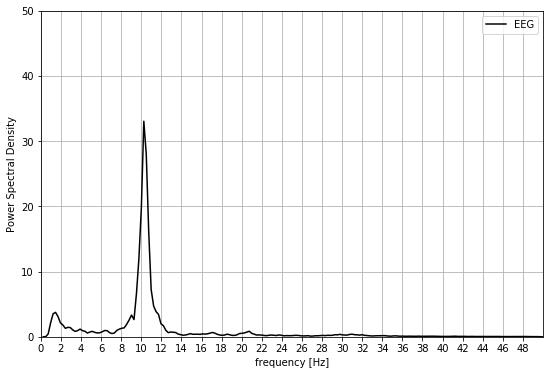

Opening raw data file /home/kovar/thesis_project/data/processed/63b.fif...
This filename (/home/kovar/thesis_project/data/processed/63b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 22252 =      0.000 ...    89.008 secs
Ready.
resp          1
b/a           1
sex           1
age          65
sfreq      1000
sc            4
sc_bef       26
sc_aft        4
dep          -1
dep_bef       0
dep_aft      -1
change      6.5
Name: (63, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/63b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


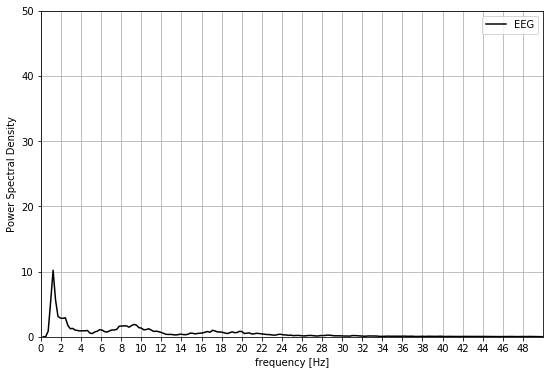

Opening raw data file /home/kovar/thesis_project/data/processed/69b.fif...
This filename (/home/kovar/thesis_project/data/processed/69b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 28704 =      0.000 ...   114.816 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/69b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp           0
b/a            1
sex            0
age           55
sfreq        250
sc            24
sc_bef        39
sc_aft        24
dep            0
dep_bef        1
dep_aft        1
change     1.625
Name: (69, b), dtype: object


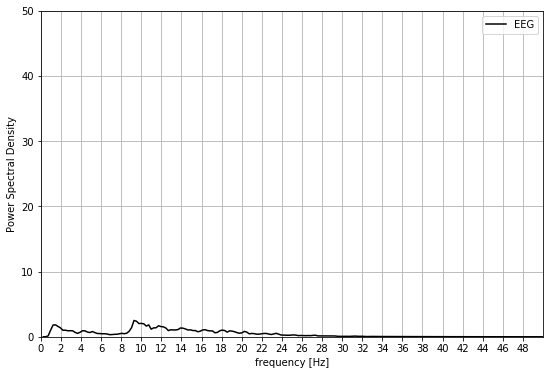

Opening raw data file /home/kovar/thesis_project/data/processed/59a.fif...
This filename (/home/kovar/thesis_project/data/processed/59a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19697 =      0.000 ...    78.788 secs
Ready.
resp             0
b/a              0
sex              1
age             42
sfreq         1000
sc              29
sc_bef          29
sc_aft          23
dep              1
dep_bef          0
dep_aft          1
change     1.26087
Name: (59, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/59a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


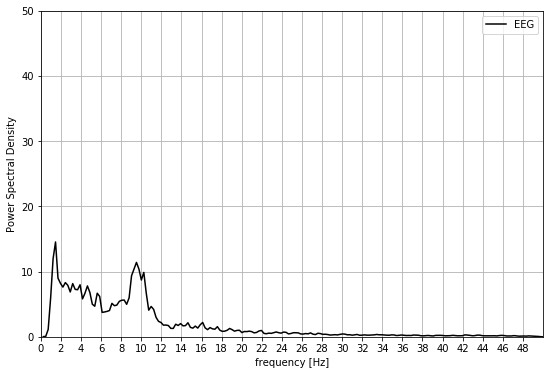

Opening raw data file /home/kovar/thesis_project/data/processed/32b.fif...
This filename (/home/kovar/thesis_project/data/processed/32b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21400 =      0.000 ...    85.600 secs
Ready.
resp             1
b/a              1
sex              0
age             54
sfreq          250
sc               7
sc_bef          25
sc_aft           7
dep             -1
dep_bef         -1
dep_aft         -1
change     3.57143
Name: (32, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/32b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


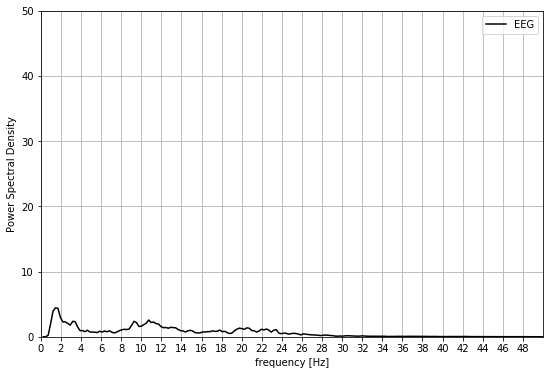

Opening raw data file /home/kovar/thesis_project/data/processed/84a.fif...
This filename (/home/kovar/thesis_project/data/processed/84a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17061 =      0.000 ...    68.244 secs
Ready.
resp         1
b/a          0
sex          1
age         49
sfreq      250
sc          28
sc_bef      28
sc_aft      14
dep          1
dep_bef      0
dep_aft      0
change       2
Name: (84, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/84a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


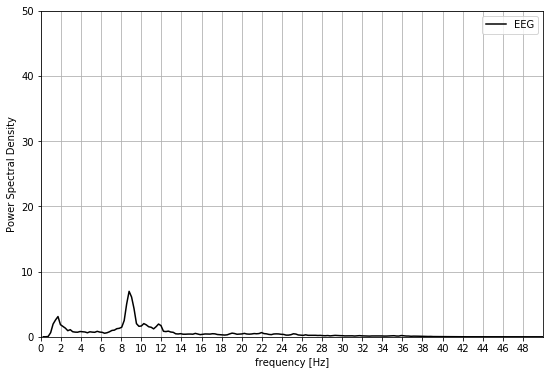

Opening raw data file /home/kovar/thesis_project/data/processed/111b.fif...
This filename (/home/kovar/thesis_project/data/processed/111b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21389 =      0.000 ...    85.556 secs
Ready.
resp          1
b/a           1
sex           0
age          42
sfreq      1000
sc            4
sc_bef       29
sc_aft        4
dep          -1
dep_bef       0
dep_aft      -1
change     7.25
Name: (111, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/111b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


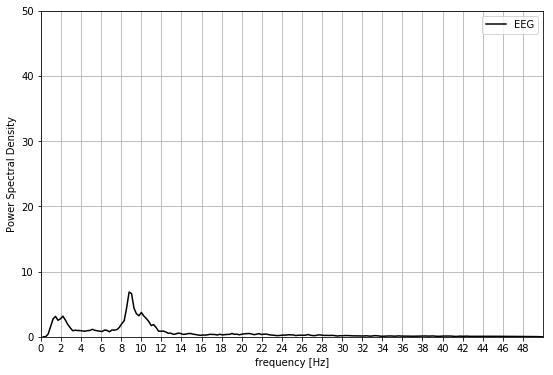

Opening raw data file /home/kovar/thesis_project/data/processed/7a.fif...
This filename (/home/kovar/thesis_project/data/processed/7a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15402 =      0.000 ...    61.608 secs
Ready.
resp         0
b/a          0
sex          0
age         63
sfreq      250
sc          30
sc_bef      30
sc_aft      25
dep          1
dep_bef      1
dep_aft      1
change     1.2
Name: (7, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/7a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


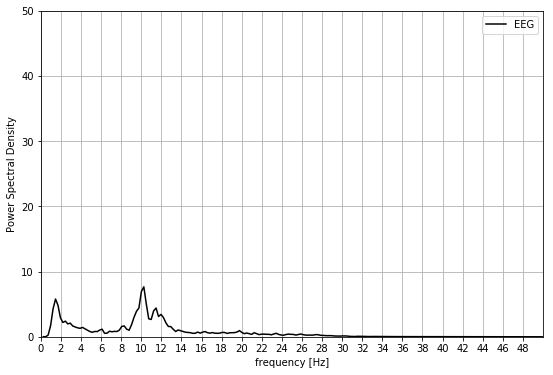

Opening raw data file /home/kovar/thesis_project/data/processed/125a.fif...
This filename (/home/kovar/thesis_project/data/processed/125a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              0
sex              0
age             56
sfreq          250
sc              26
sc_bef          26
sc_aft          11
dep              0
dep_bef          0
dep_aft         -1
change     2.36364
Name: (125, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/125a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


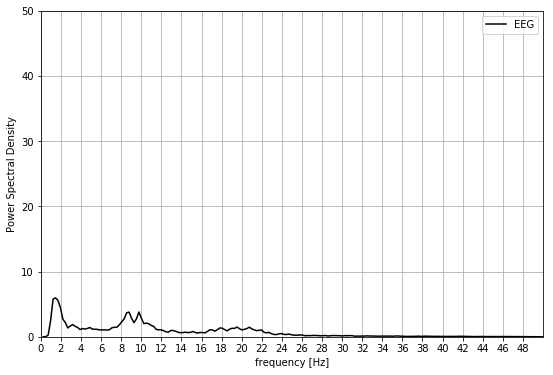

Opening raw data file /home/kovar/thesis_project/data/processed/97a.fif...
This filename (/home/kovar/thesis_project/data/processed/97a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15885 =      0.000 ...    63.540 secs
Ready.
resp             1
b/a              0
sex              0
age             49
sfreq          250
sc              23
sc_bef          23
sc_aft           6
dep              0
dep_bef         -1
dep_aft         -1
change     3.83333
Name: (97, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/97a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


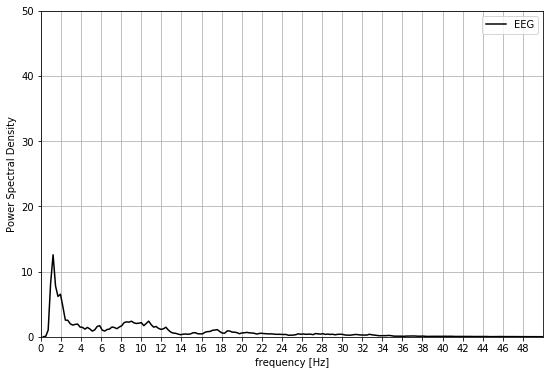

Opening raw data file /home/kovar/thesis_project/data/processed/79a.fif...
This filename (/home/kovar/thesis_project/data/processed/79a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15637 =      0.000 ...    62.548 secs
Ready.
resp             0
b/a              0
sex              0
age             47
sfreq         1000
sc              25
sc_bef          25
sc_aft          19
dep              0
dep_bef         -1
dep_aft          0
change     1.31579
Name: (79, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/79a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


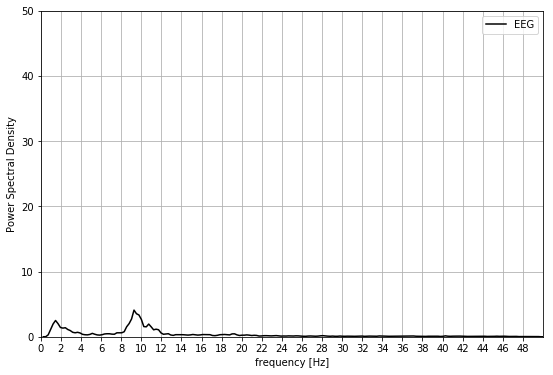

Opening raw data file /home/kovar/thesis_project/data/processed/69a.fif...
This filename (/home/kovar/thesis_project/data/processed/69a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16651 =      0.000 ...    66.604 secs
Ready.
resp           0
b/a            0
sex            0
age           55
sfreq        250
sc            39
sc_bef        39
sc_aft        24
dep            1
dep_bef        1
dep_aft        1
change     1.625
Name: (69, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/69a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


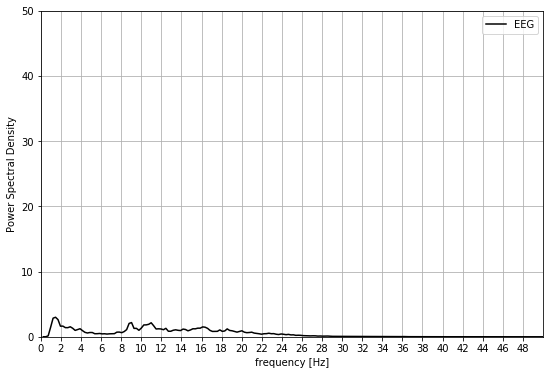

Opening raw data file /home/kovar/thesis_project/data/processed/9b.fif...
This filename (/home/kovar/thesis_project/data/processed/9b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15668 =      0.000 ...    62.672 secs
Ready.
resp             0
b/a              1
sex              1
age             59
sfreq          250
sc              27
sc_bef          34
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.25926
Name: (9, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/9b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


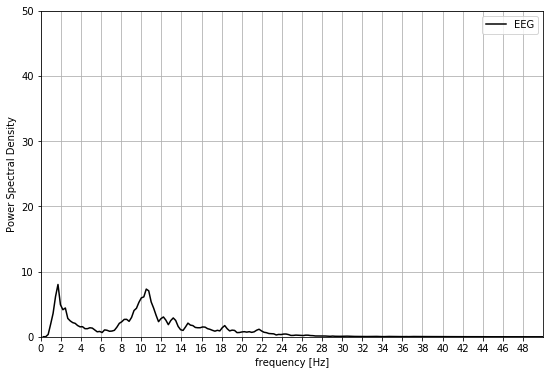

Opening raw data file /home/kovar/thesis_project/data/processed/72b.fif...
This filename (/home/kovar/thesis_project/data/processed/72b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18362 =      0.000 ...    73.448 secs
Ready.
resp             0
b/a              1
sex              0
age             55
sfreq          250
sc              18
sc_bef          23
sc_aft          18
dep             -1
dep_bef         -1
dep_aft          0
change     1.27778
Name: (72, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/72b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


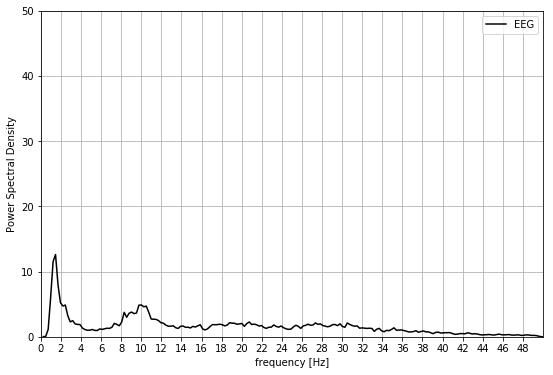

Opening raw data file /home/kovar/thesis_project/data/processed/131b.fif...
This filename (/home/kovar/thesis_project/data/processed/131b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15622 =      0.000 ...    62.488 secs
Ready.
resp             0
b/a              1
sex              0
age             35
sfreq          250
sc              17
sc_bef          25
sc_aft          17
dep             -1
dep_bef         -1
dep_aft          0
change     1.47059
Name: (131, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/131b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


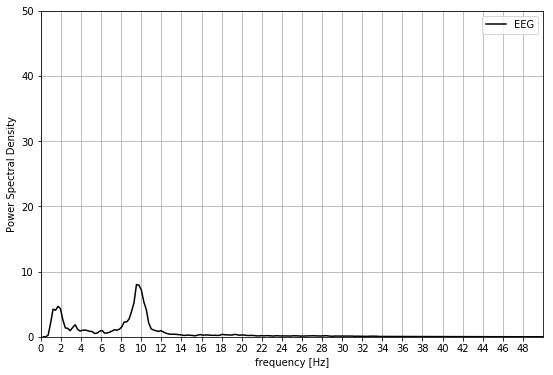

Opening raw data file /home/kovar/thesis_project/data/processed/82b.fif...
This filename (/home/kovar/thesis_project/data/processed/82b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 35099 =      0.000 ...   140.396 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/82b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp          1
b/a           1
sex           0
age          48
sfreq      1000
sc            4
sc_bef       25
sc_aft        4
dep          -1
dep_bef      -1
dep_aft      -1
change     6.25
Name: (82, b), dtype: object


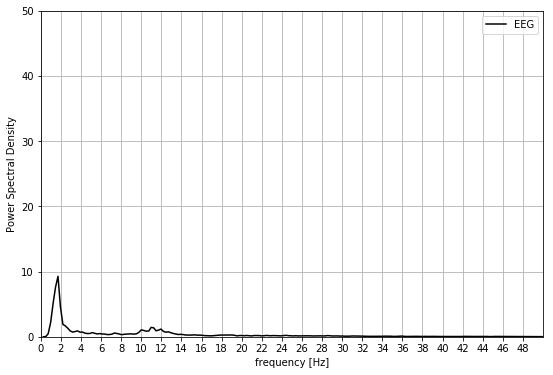

Opening raw data file /home/kovar/thesis_project/data/processed/130a.fif...
This filename (/home/kovar/thesis_project/data/processed/130a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21131 =      0.000 ...    84.524 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/130a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              0
age             38
sfreq         1000
sc              31
sc_bef          31
sc_aft          18
dep              1
dep_bef          1
dep_aft          0
change     1.72222
Name: (130, a), dtype: object


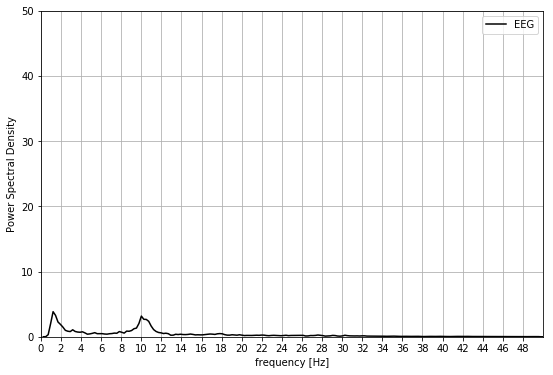

Opening raw data file /home/kovar/thesis_project/data/processed/112a.fif...
This filename (/home/kovar/thesis_project/data/processed/112a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 25135 =      0.000 ...   100.540 secs
Ready.
resp             0
b/a              0
sex              1
age             54
sfreq          250
sc              36
sc_bef          36
sc_aft          22
dep              1
dep_bef          1
dep_aft          1
change     1.63636
Name: (112, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/112a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


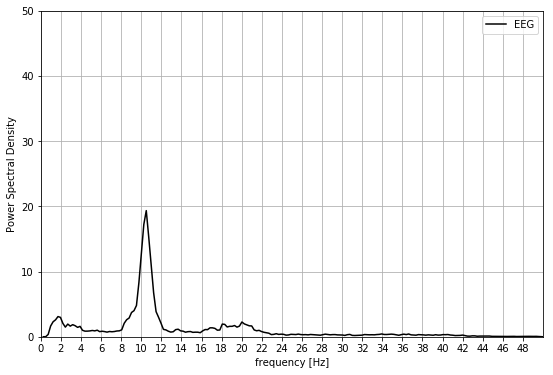

Opening raw data file /home/kovar/thesis_project/data/processed/122a.fif...
This filename (/home/kovar/thesis_project/data/processed/122a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20348 =      0.000 ...    81.392 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/122a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              0
sex              1
age             55
sfreq          250
sc              35
sc_bef          35
sc_aft          19
dep              1
dep_bef          1
dep_aft          0
change     1.84211
Name: (122, a), dtype: object


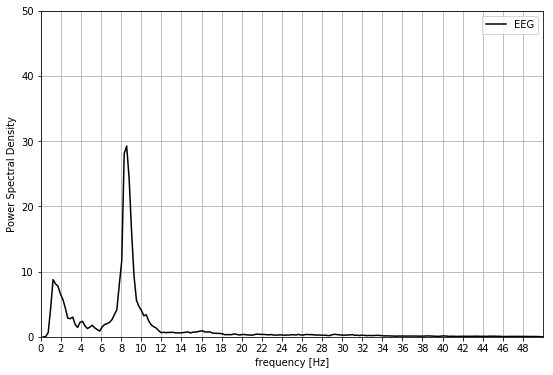

Opening raw data file /home/kovar/thesis_project/data/processed/40a.fif...
This filename (/home/kovar/thesis_project/data/processed/40a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 28206 =      0.000 ...   112.824 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/40a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp           1
b/a            0
sex            1
age           51
sfreq        250
sc            25
sc_bef        25
sc_aft         8
dep            0
dep_bef       -1
dep_aft       -1
change     3.125
Name: (40, a), dtype: object


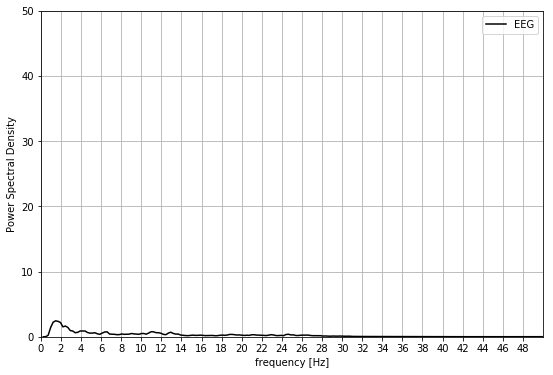

Opening raw data file /home/kovar/thesis_project/data/processed/101b.fif...
This filename (/home/kovar/thesis_project/data/processed/101b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18015 =      0.000 ...    72.060 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/101b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             47
sfreq          250
sc              15
sc_bef          28
sc_aft          15
dep             -1
dep_bef          0
dep_aft          0
change     1.86667
Name: (101, b), dtype: object


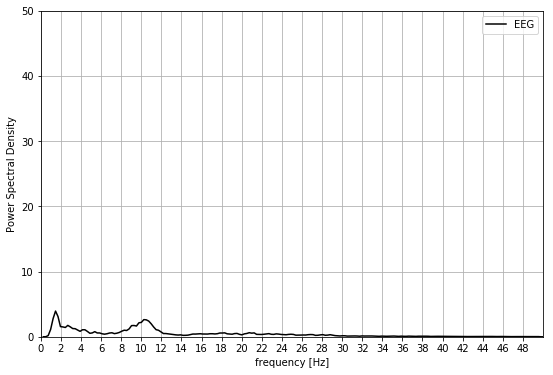

Opening raw data file /home/kovar/thesis_project/data/processed/87a.fif...
This filename (/home/kovar/thesis_project/data/processed/87a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              0
sex              0
age             30
sfreq         1000
sc              28
sc_bef          28
sc_aft          24
dep              1
dep_bef          0
dep_aft          1
change     1.16667
Name: (87, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/87a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


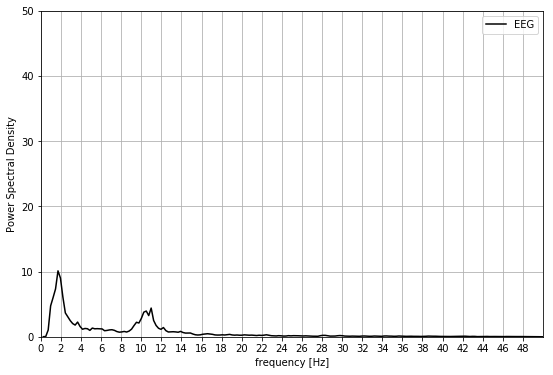

Opening raw data file /home/kovar/thesis_project/data/processed/95b.fif...
This filename (/home/kovar/thesis_project/data/processed/95b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             0
b/a              1
sex              0
age             45
sfreq          250
sc              18
sc_bef          29
sc_aft          18
dep             -1
dep_bef          0
dep_aft          0
change     1.61111
Name: (95, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/95b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


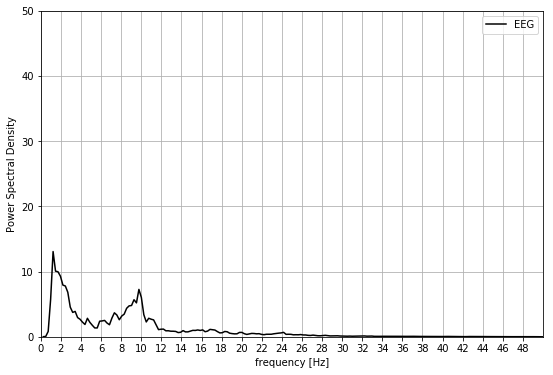

Opening raw data file /home/kovar/thesis_project/data/processed/118b.fif...
This filename (/home/kovar/thesis_project/data/processed/118b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 13024 =      0.000 ...    52.096 secs
Ready.
resp             1
b/a              1
sex              0
age             38
sfreq          250
sc               7
sc_bef          22
sc_aft           7
dep             -1
dep_bef         -1
dep_aft         -1
change     3.14286
Name: (118, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/118b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


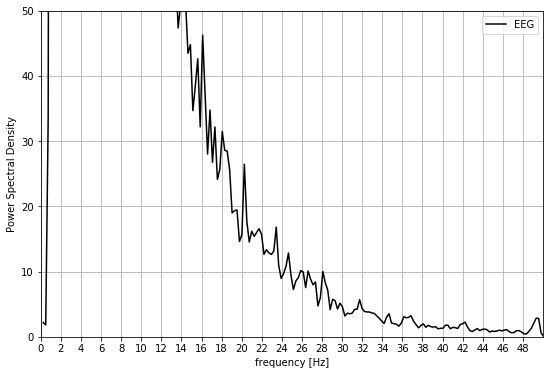

Opening raw data file /home/kovar/thesis_project/data/processed/97b.fif...
This filename (/home/kovar/thesis_project/data/processed/97b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17296 =      0.000 ...    69.184 secs
Ready.
resp             1
b/a              1
sex              0
age             49
sfreq          250
sc               6
sc_bef          23
sc_aft           6
dep             -1
dep_bef         -1
dep_aft         -1
change     3.83333
Name: (97, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/97b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


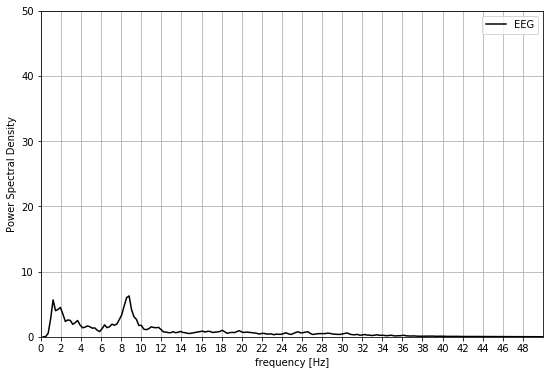

Opening raw data file /home/kovar/thesis_project/data/processed/20a.fif...
This filename (/home/kovar/thesis_project/data/processed/20a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16100 =      0.000 ...    64.400 secs
Ready.
resp             1
b/a              0
sex              0
age             49
sfreq          250
sc              27
sc_bef          27
sc_aft          13
dep              1
dep_bef          0
dep_aft          0
change     2.07692
Name: (20, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/20a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


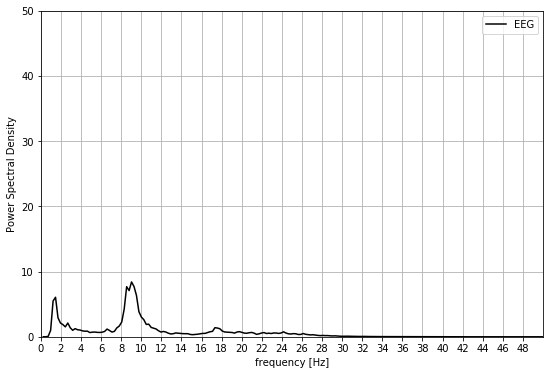

Opening raw data file /home/kovar/thesis_project/data/processed/132a.fif...
This filename (/home/kovar/thesis_project/data/processed/132a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21804 =      0.000 ...    87.216 secs
Ready.
resp         1
b/a          0
sex          0
age         55
sfreq      250
sc          27
sc_bef      27
sc_aft      10
dep          1
dep_bef      0
dep_aft     -1
change     2.7
Name: (132, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/132a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


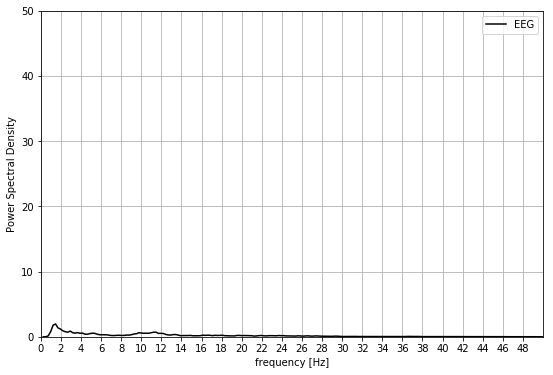

Opening raw data file /home/kovar/thesis_project/data/processed/92a.fif...
This filename (/home/kovar/thesis_project/data/processed/92a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16430 =      0.000 ...    65.720 secs
Ready.
resp         1
b/a          0
sex          0
age         61
sfreq      250
sc          29
sc_bef      29
sc_aft      10
dep          1
dep_bef      0
dep_aft     -1
change     2.9
Name: (92, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/92a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


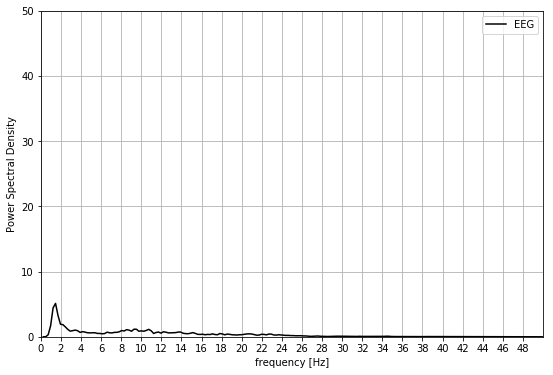

Opening raw data file /home/kovar/thesis_project/data/processed/81b.fif...
This filename (/home/kovar/thesis_project/data/processed/81b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 13127 =      0.000 ...    52.508 secs
Ready.
resp             0
b/a              1
sex              1
age             30
sfreq          250
sc              22
sc_bef          24
sc_aft          22
dep              0
dep_bef         -1
dep_aft          1
change     1.09091
Name: (81, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/81b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


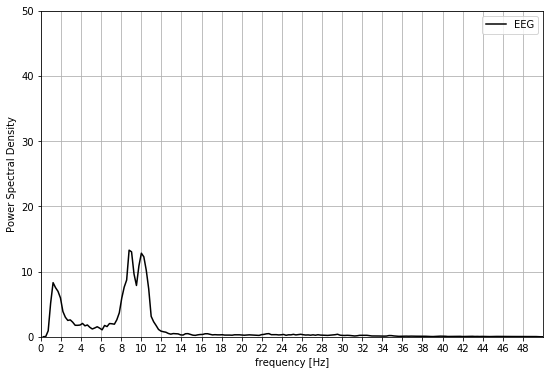

Opening raw data file /home/kovar/thesis_project/data/processed/46a.fif...
This filename (/home/kovar/thesis_project/data/processed/46a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 17443 =      0.000 ...    69.772 secs
Ready.
resp             1
b/a              0
sex              0
age             37
sfreq          250
sc              24
sc_bef          24
sc_aft          11
dep              0
dep_bef         -1
dep_aft         -1
change     2.18182
Name: (46, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/46a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


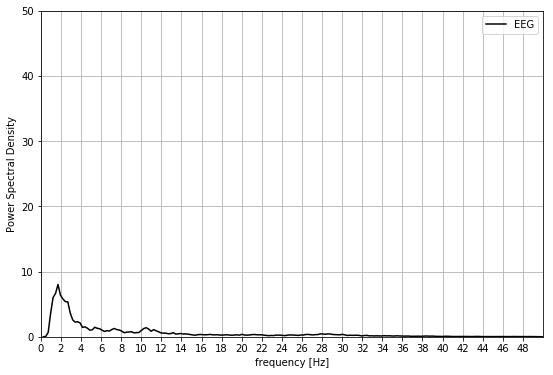

Opening raw data file /home/kovar/thesis_project/data/processed/88a.fif...
This filename (/home/kovar/thesis_project/data/processed/88a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20087 =      0.000 ...    80.348 secs
Ready.
resp             0
b/a              0
sex              0
age             39
sfreq         1000
sc              30
sc_bef          30
sc_aft          29
dep              1
dep_bef          1
dep_aft          1
change     1.03448
Name: (88, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/88a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


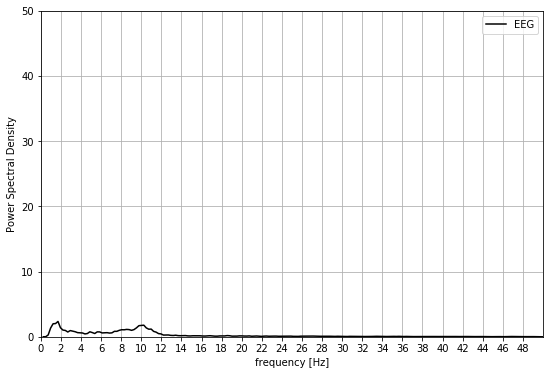

Opening raw data file /home/kovar/thesis_project/data/processed/133b.fif...
This filename (/home/kovar/thesis_project/data/processed/133b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16210 =      0.000 ...    64.840 secs
Ready.
resp             0
b/a              1
sex              0
age             64
sfreq          250
sc              27
sc_bef          33
sc_aft          27
dep              1
dep_bef          1
dep_aft          1
change     1.22222
Name: (133, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/133b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


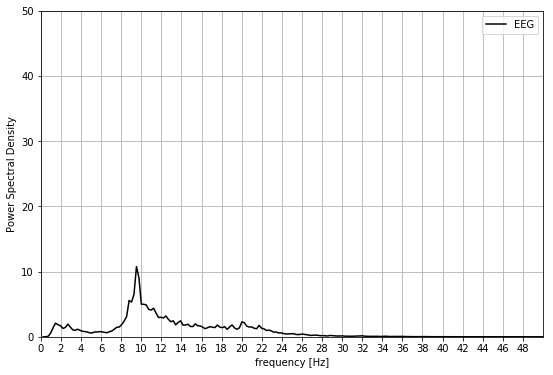

Opening raw data file /home/kovar/thesis_project/data/processed/17a.fif...
This filename (/home/kovar/thesis_project/data/processed/17a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16278 =      0.000 ...    65.112 secs
Ready.
resp             0
b/a              0
sex              0
age             53
sfreq          250
sc              34
sc_bef          34
sc_aft          18
dep              1
dep_bef          1
dep_aft          0
change     1.88889
Name: (17, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/17a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


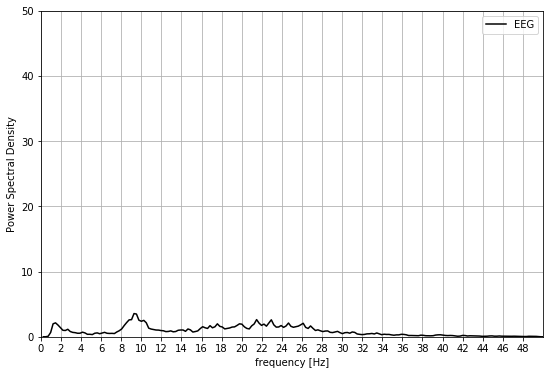

Opening raw data file /home/kovar/thesis_project/data/processed/50a.fif...
This filename (/home/kovar/thesis_project/data/processed/50a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 16930 =      0.000 ...    67.720 secs
Ready.
resp             1
b/a              0
sex              1
age             48
sfreq          250
sc              29
sc_bef          29
sc_aft          11
dep              1
dep_bef          0
dep_aft         -1
change     2.63636
Name: (50, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/50a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


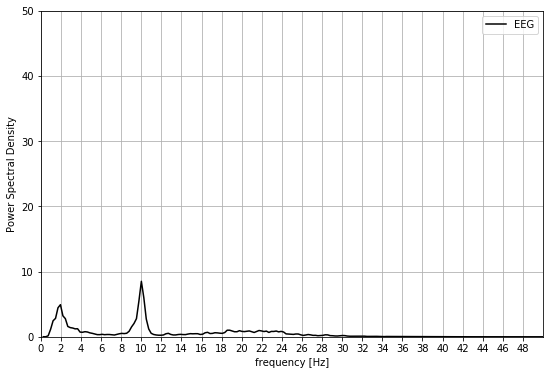

Opening raw data file /home/kovar/thesis_project/data/processed/110a.fif...
This filename (/home/kovar/thesis_project/data/processed/110a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21165 =      0.000 ...    84.660 secs
Ready.
resp              0
b/a               0
sex               1
age              35
sfreq           250
sc               30
sc_bef           30
sc_aft           31
dep               1
dep_bef           1
dep_aft           1
change     0.967742
Name: (110, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/110a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


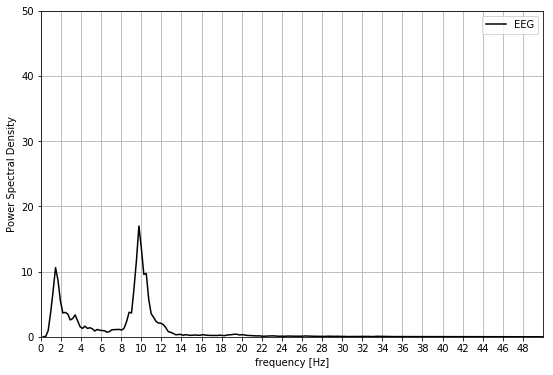

Opening raw data file /home/kovar/thesis_project/data/processed/27a.fif...
This filename (/home/kovar/thesis_project/data/processed/27a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15544 =      0.000 ...    62.176 secs
Ready.
resp             0
b/a              0
sex              1
age             32
sfreq          250
sc              29
sc_bef          29
sc_aft          27
dep              1
dep_bef          0
dep_aft          1
change     1.07407
Name: (27, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/27a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


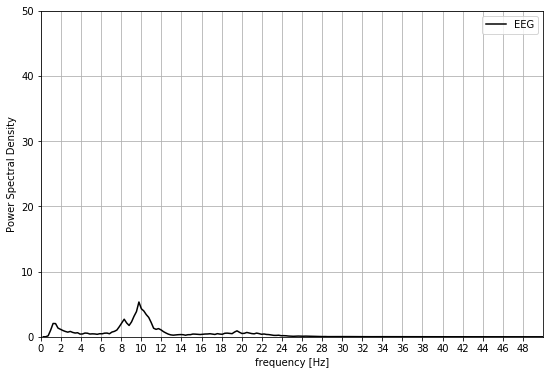

Opening raw data file /home/kovar/thesis_project/data/processed/57a.fif...
This filename (/home/kovar/thesis_project/data/processed/57a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp             1
b/a              0
sex              1
age             50
sfreq         1000
sc              25
sc_bef          25
sc_aft          12
dep              0
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (57, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/57a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


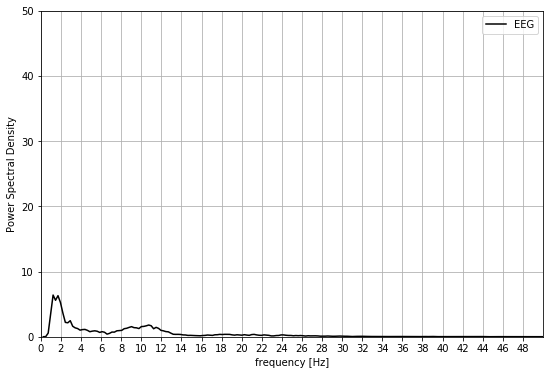

Opening raw data file /home/kovar/thesis_project/data/processed/75b.fif...
This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 35665 =      0.000 ...   142.660 secs
Ready.
resp         1
b/a          1
sex          0
age         30
sfreq      250
sc          10
sc_bef      20
sc_aft      10
dep         -1
dep_bef     -1
dep_aft     -1
change       2
Name: (75, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/75b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


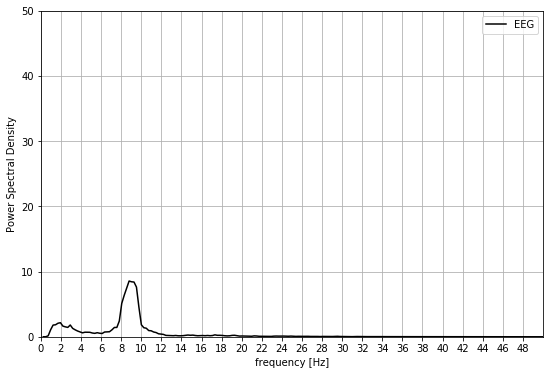

Opening raw data file /home/kovar/thesis_project/data/processed/26a.fif...
This filename (/home/kovar/thesis_project/data/processed/26a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 18679 =      0.000 ...    74.716 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/26a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp            1
b/a             0
sex             0
age            50
sfreq         250
sc             33
sc_bef         33
sc_aft         16
dep             1
dep_bef         1
dep_aft         0
change     2.0625
Name: (26, a), dtype: object


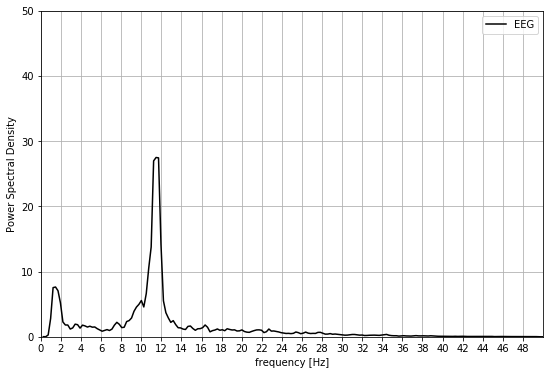

Opening raw data file /home/kovar/thesis_project/data/processed/45b.fif...
This filename (/home/kovar/thesis_project/data/processed/45b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 13759 =      0.000 ...    55.036 secs
Ready.
resp          0
b/a           1
sex           0
age          51
sfreq       250
sc           25
sc_bef       27
sc_aft       25
dep           0
dep_bef       0
dep_aft       1
change     1.08
Name: (45, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/45b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


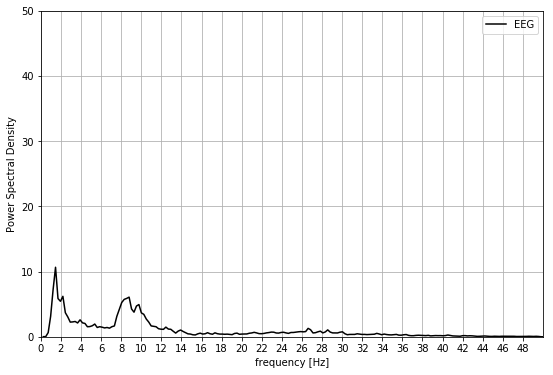

Opening raw data file /home/kovar/thesis_project/data/processed/74b.fif...
This filename (/home/kovar/thesis_project/data/processed/74b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15805 =      0.000 ...    63.220 secs
Ready.
resp             0
b/a              1
sex              0
age             38
sfreq          250
sc              19
sc_bef          26
sc_aft          19
dep             -1
dep_bef          0
dep_aft          0
change     1.36842
Name: (74, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/74b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


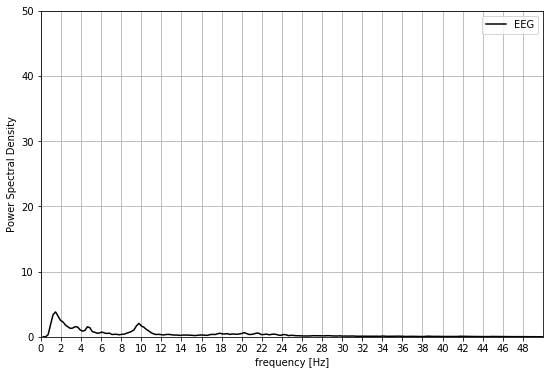

Opening raw data file /home/kovar/thesis_project/data/processed/104a.fif...
This filename (/home/kovar/thesis_project/data/processed/104a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 20761 =      0.000 ...    83.044 secs
Ready.
resp         1
b/a          0
sex          0
age         64
sfreq      250
sc          32
sc_bef      32
sc_aft       2
dep          1
dep_bef      1
dep_aft     -1
change      16
Name: (104, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/104a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


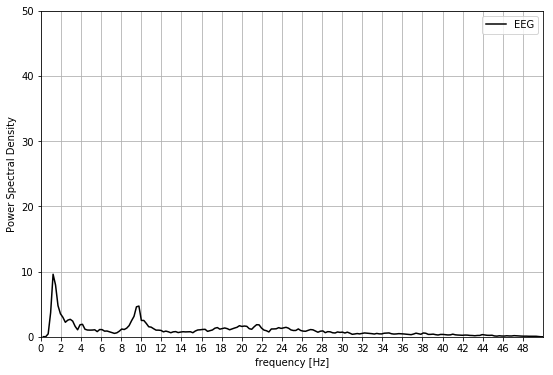

Opening raw data file /home/kovar/thesis_project/data/processed/4b.fif...
This filename (/home/kovar/thesis_project/data/processed/4b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 25508 =      0.000 ...   102.032 secs
Ready.
resp          0
b/a           1
sex           0
age          55
sfreq       250
sc           25
sc_bef       26
sc_aft       25
dep           0
dep_bef       0
dep_aft       1
change     1.04
Name: (4, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/4b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


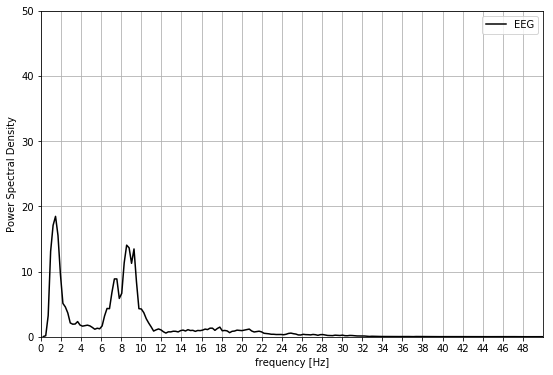

Opening raw data file /home/kovar/thesis_project/data/processed/29a.fif...
This filename (/home/kovar/thesis_project/data/processed/29a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21296 =      0.000 ...    85.184 secs
Ready.
resp             0
b/a              0
sex              1
age             54
sfreq         1000
sc              28
sc_bef          28
sc_aft          27
dep              1
dep_bef          0
dep_aft          1
change     1.03704
Name: (29, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/29a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


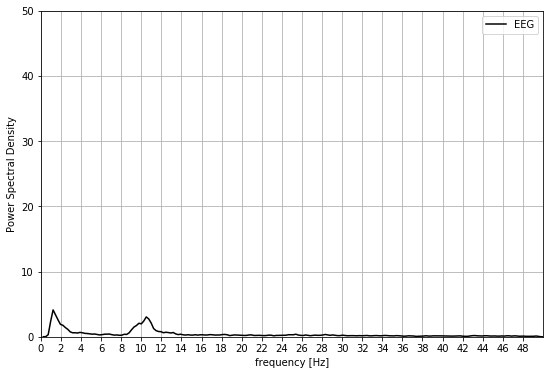

Opening raw data file /home/kovar/thesis_project/data/processed/130b.fif...
This filename (/home/kovar/thesis_project/data/processed/130b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 29189 =      0.000 ...   116.756 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/130b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             38
sfreq         1000
sc              18
sc_bef          31
sc_aft          18
dep             -1
dep_bef          1
dep_aft          0
change     1.72222
Name: (130, b), dtype: object


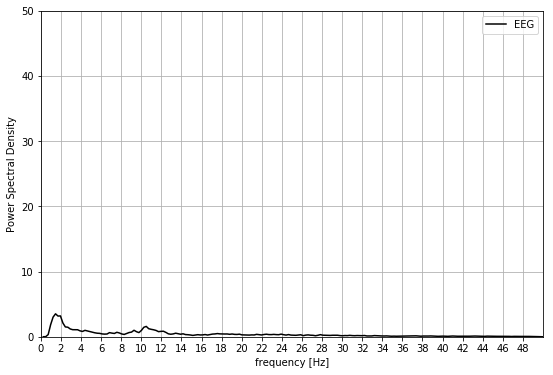

Opening raw data file /home/kovar/thesis_project/data/processed/49b.fif...
This filename (/home/kovar/thesis_project/data/processed/49b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21506 =      0.000 ...    86.024 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/49b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             0
b/a              1
sex              0
age             31
sfreq          250
sc              30
sc_bef          34
sc_aft          30
dep              1
dep_bef          1
dep_aft          1
change     1.13333
Name: (49, b), dtype: object


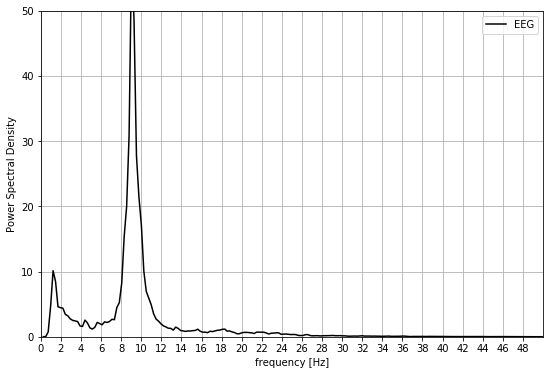

Opening raw data file /home/kovar/thesis_project/data/processed/125b.fif...
This filename (/home/kovar/thesis_project/data/processed/125b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 7655 =      0.000 ...    30.620 secs
Ready.
resp             1
b/a              1
sex              0
age             56
sfreq          250
sc              11
sc_bef          26
sc_aft          11
dep             -1
dep_bef          0
dep_aft         -1
change     2.36364
Name: (125, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/125b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


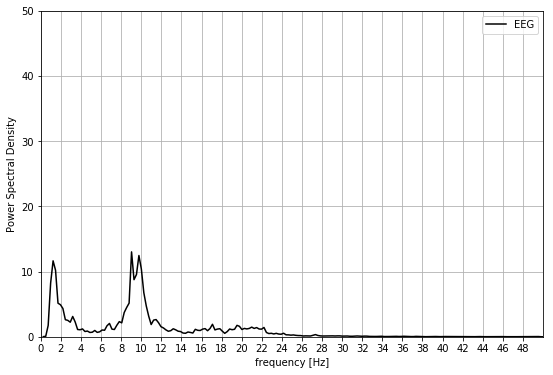

Opening raw data file /home/kovar/thesis_project/data/processed/31b.fif...
This filename (/home/kovar/thesis_project/data/processed/31b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21892 =      0.000 ...    87.568 secs
Ready.
resp             0
b/a              1
sex              0
age             61
sfreq          250
sc              19
sc_bef          25
sc_aft          19
dep             -1
dep_bef         -1
dep_aft          0
change     1.31579
Name: (31, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/31b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


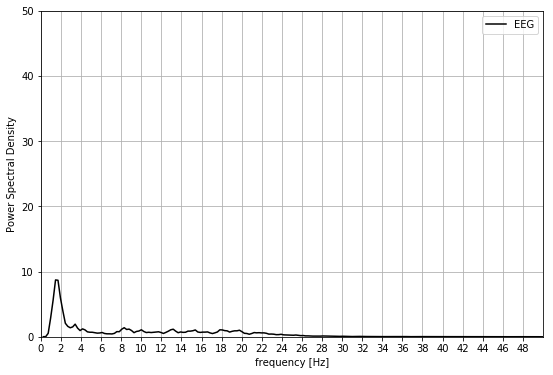

Opening raw data file /home/kovar/thesis_project/data/processed/46b.fif...
This filename (/home/kovar/thesis_project/data/processed/46b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 21897 =      0.000 ...    87.588 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/46b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             1
b/a              1
sex              0
age             37
sfreq          250
sc              11
sc_bef          24
sc_aft          11
dep             -1
dep_bef         -1
dep_aft         -1
change     2.18182
Name: (46, b), dtype: object


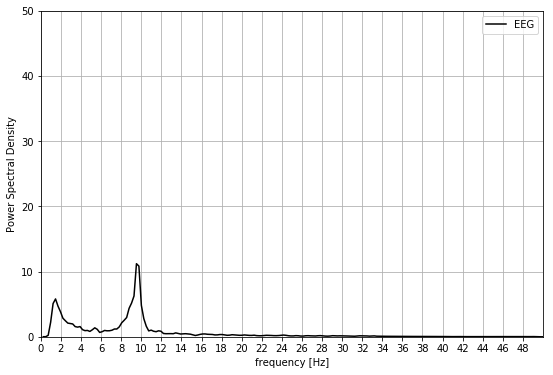

Opening raw data file /home/kovar/thesis_project/data/processed/114a.fif...
This filename (/home/kovar/thesis_project/data/processed/114a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15831 =      0.000 ...    63.324 secs
Ready.


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/114a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


resp             1
b/a              0
sex              0
age             55
sfreq          250
sc              25
sc_bef          25
sc_aft          12
dep              0
dep_bef         -1
dep_aft         -1
change     2.08333
Name: (114, a), dtype: object


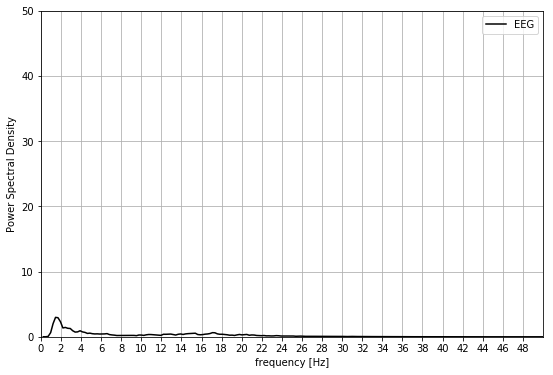

Opening raw data file /home/kovar/thesis_project/data/processed/119b.fif...
This filename (/home/kovar/thesis_project/data/processed/119b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.
resp          1
b/a           1
sex           1
age          61
sfreq       250
sc            4
sc_bef       23
sc_aft        4
dep          -1
dep_bef      -1
dep_aft      -1
change     5.75
Name: (119, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/119b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


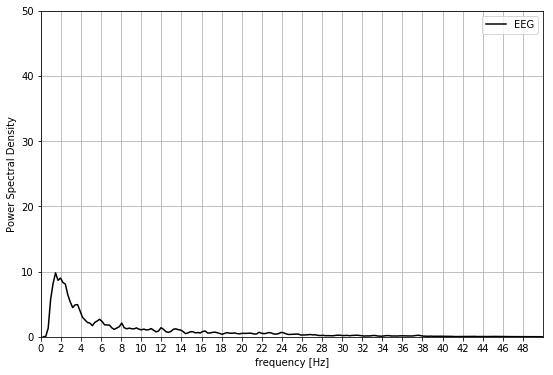

Opening raw data file /home/kovar/thesis_project/data/processed/40b.fif...
This filename (/home/kovar/thesis_project/data/processed/40b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 10044 =      0.000 ...    40.176 secs
Ready.
resp           1
b/a            1
sex            1
age           51
sfreq        250
sc             8
sc_bef        25
sc_aft         8
dep           -1
dep_bef       -1
dep_aft       -1
change     3.125
Name: (40, b), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/40b.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


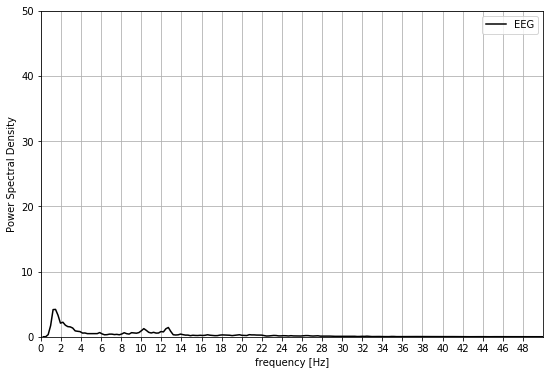

Opening raw data file /home/kovar/thesis_project/data/processed/93a.fif...
This filename (/home/kovar/thesis_project/data/processed/93a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 13452 =      0.000 ...    53.808 secs
Ready.
resp         1
b/a          0
sex          0
age         50
sfreq      250
sc          28
sc_bef      28
sc_aft      10
dep          1
dep_bef      0
dep_aft     -1
change     2.8
Name: (93, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/93a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


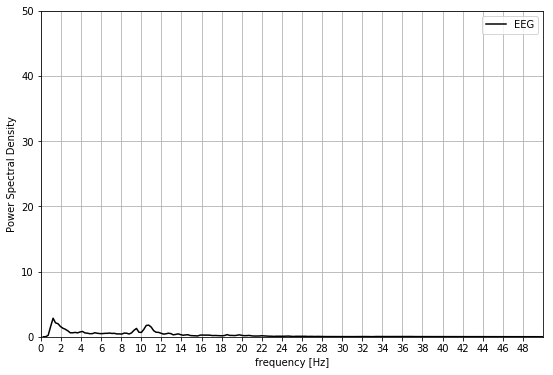

Opening raw data file /home/kovar/thesis_project/data/processed/30a.fif...
This filename (/home/kovar/thesis_project/data/processed/30a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 23295 =      0.000 ...    93.180 secs
Ready.
resp             0
b/a              0
sex              0
age             37
sfreq          250
sc              31
sc_bef          31
sc_aft          22
dep              1
dep_bef          1
dep_aft          1
change     1.40909
Name: (30, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/30a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


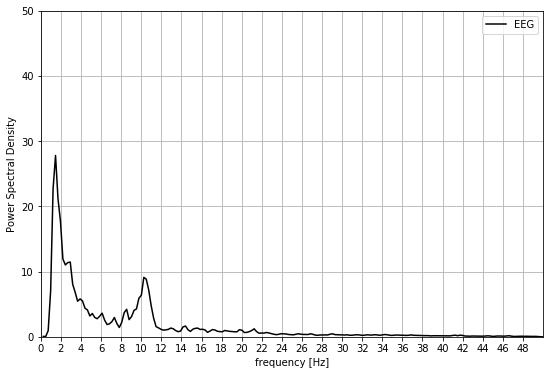

Opening raw data file /home/kovar/thesis_project/data/processed/82a.fif...
This filename (/home/kovar/thesis_project/data/processed/82a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 27593 =      0.000 ...   110.372 secs
Ready.
resp          1
b/a           0
sex           0
age          48
sfreq      1000
sc           25
sc_bef       25
sc_aft        4
dep           0
dep_bef      -1
dep_aft      -1
change     6.25
Name: (82, a), dtype: object


/home/kovar/thesis_project/src/data/data_files.py:25: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/82a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(file_path)


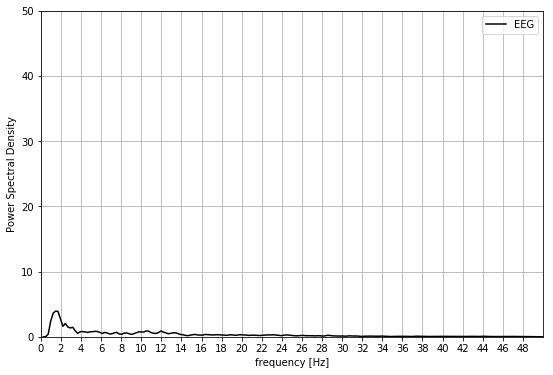

In [10]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from data.data_files import CHANNEL_NAMES, DataKind, files_builder
from scipy.signal import welch

def plot_psd(X, label, Fs, NFFT, color=None):

    noverlap = int(NFFT * 0.8)

    freqs, psd = welch(X, fs=Fs, window='hann', nperseg=NFFT,
                       noverlap=noverlap)

    f = freqs[freqs > np.zeros(len(freqs))]
    psd = psd[freqs > np.zeros(len(freqs))]

    plt.plot(f, psd.ravel(), label=label, color=color)

for file in files_builder(DataKind('processed')):
    plt.figure(figsize=(9, 6))
    values = file.df['FP1'][:15000]
    sfreq=250
    print(metapkl.loc[(file.id, file.trial), :])
    n_fft = 2 ** 10  # let's use long windows to see low frequencies
    plot_psd(values, Fs=sfreq, NFFT=n_fft, label='EEG', color='black')

    plt.legend()
    plt.xticks(np.arange(0, 50, 2))
    plt.xlim([0, 50])
    plt.ylim([0, 50])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power Spectral Density')
    plt.grid()
    plt.show()


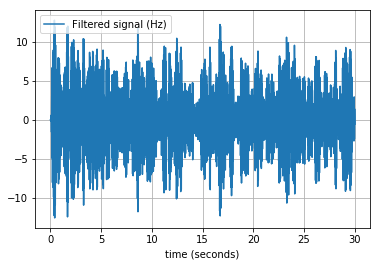

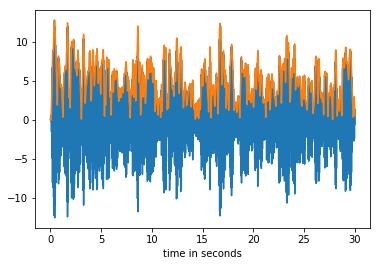

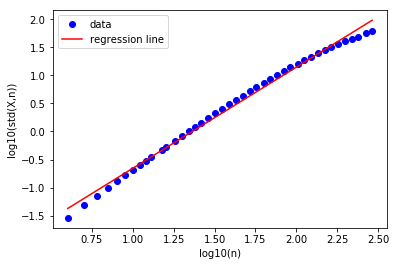

1.8020363881743497


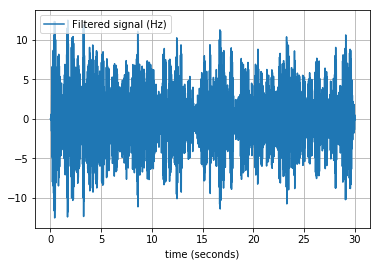

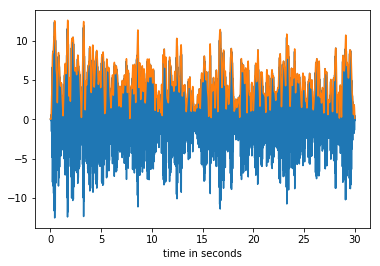

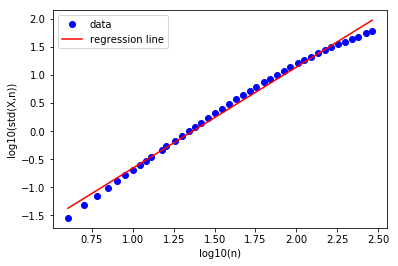

1.7996538802460331


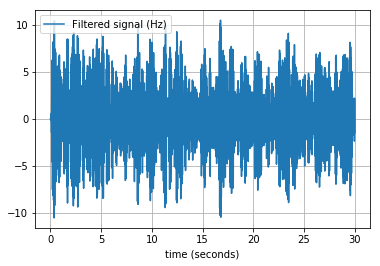

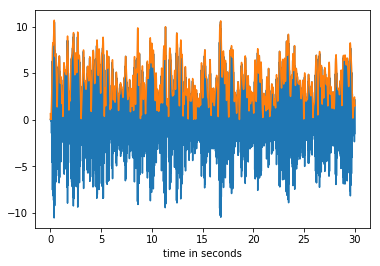

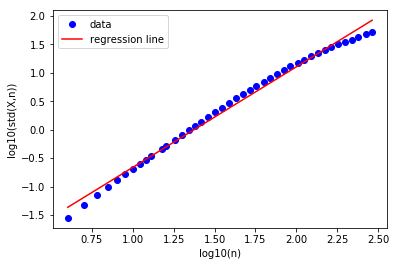

1.7665881203840113


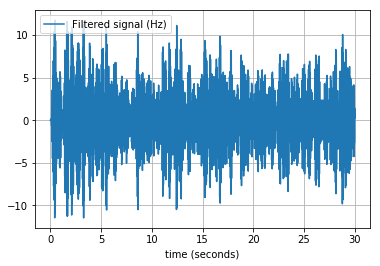

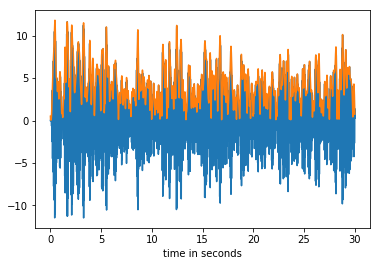

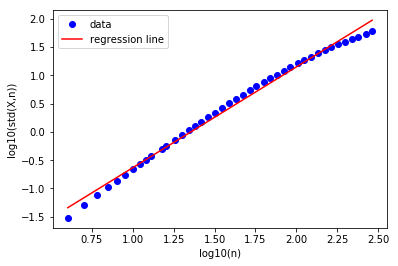

1.777227923579681


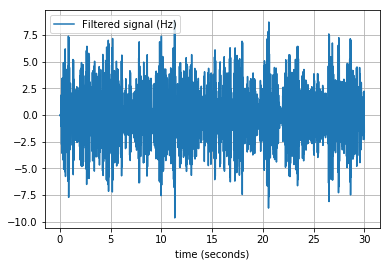

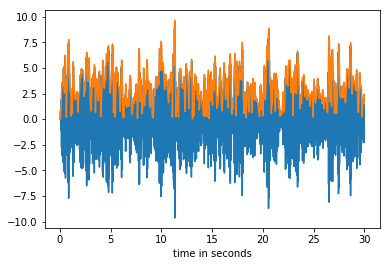

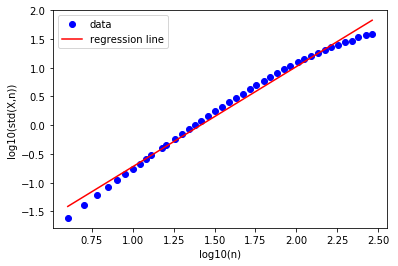

1.7406206538433047


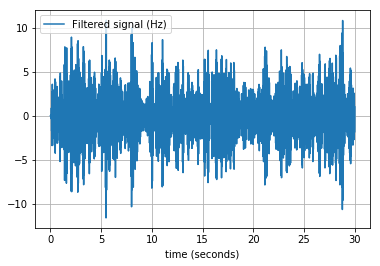

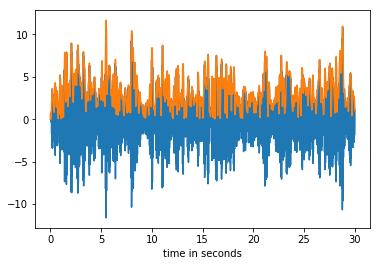

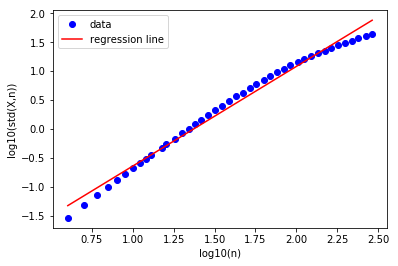

1.7183382414577772


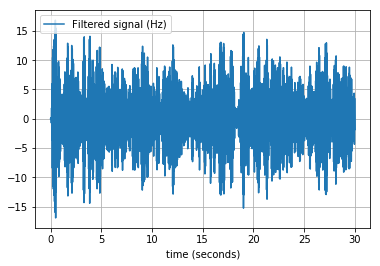

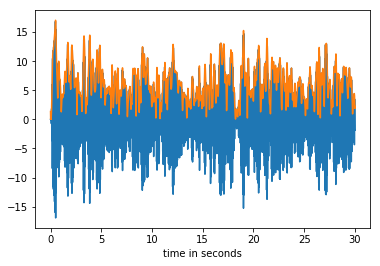

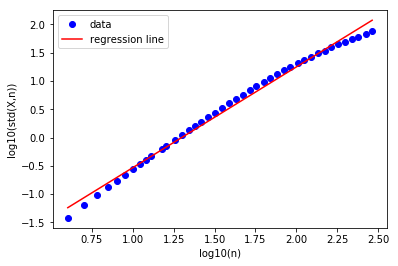

1.7787970201531222


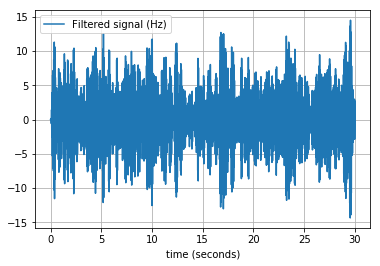

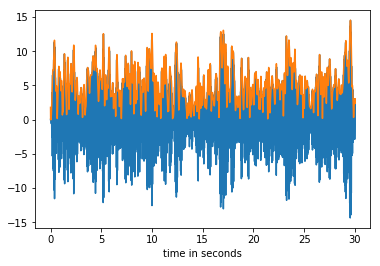

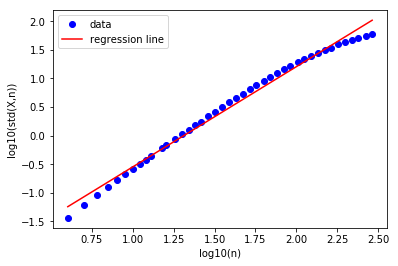

1.751862002558378


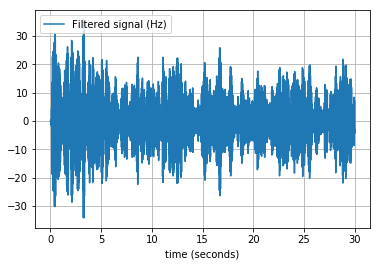

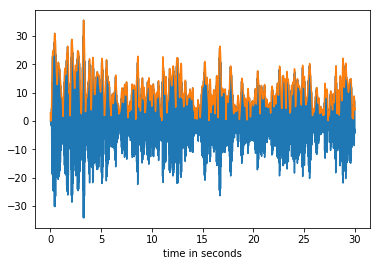

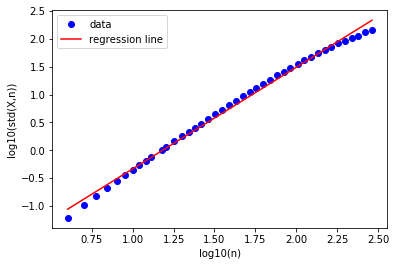

1.8227034579302825


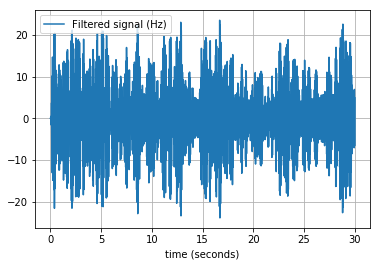

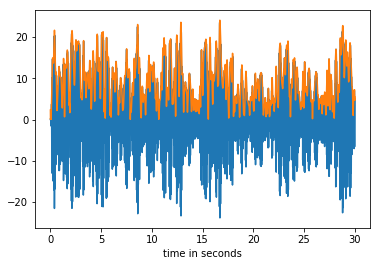

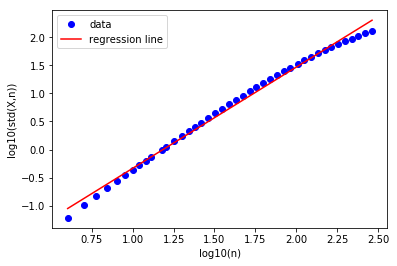

1.8013456155839835


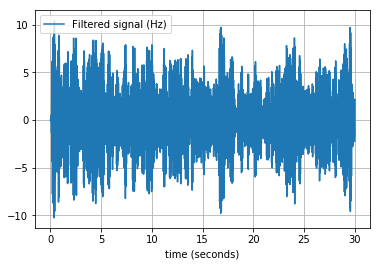

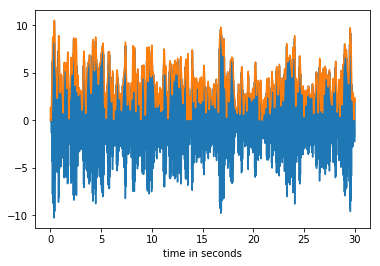

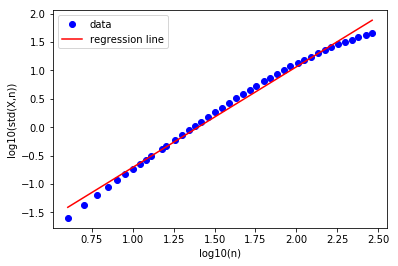

1.7701233115431916


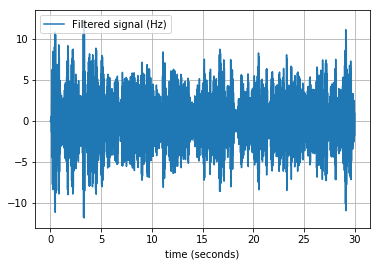

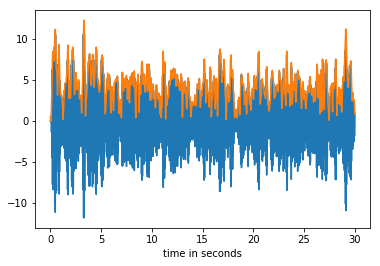

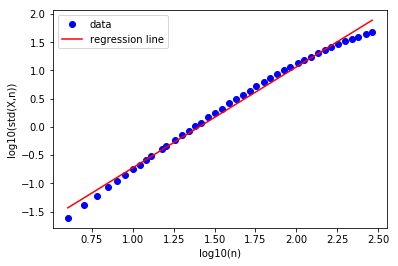

1.7847517837493647


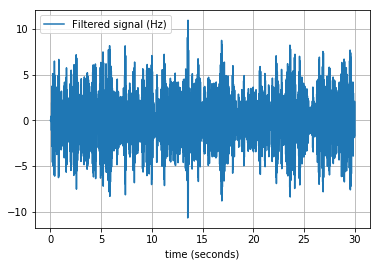

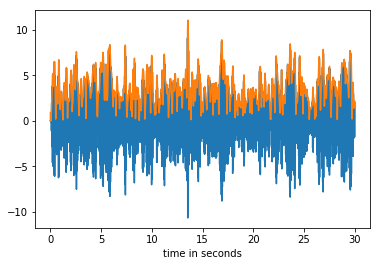

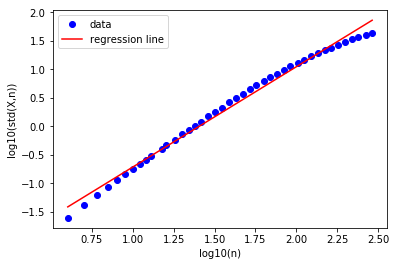

1.7559571466087174


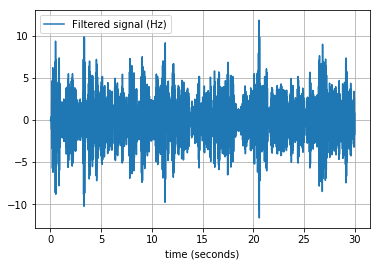

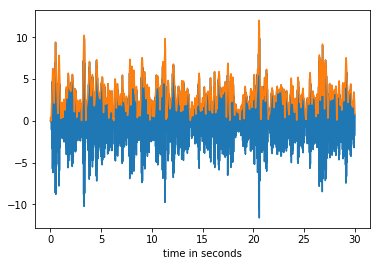

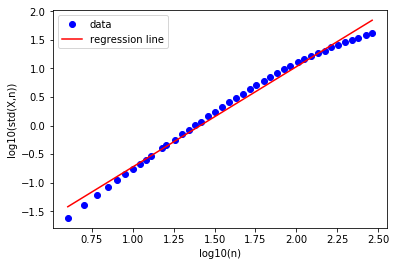

1.7523765382242598


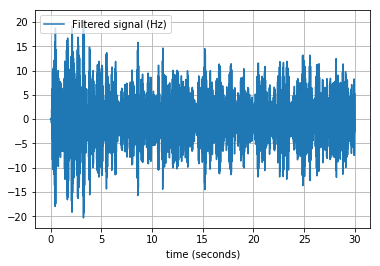

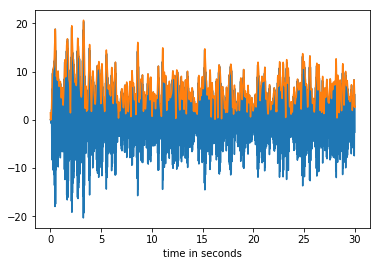

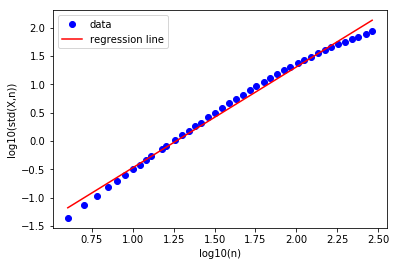

1.7803419182220455


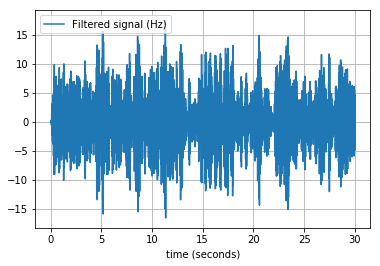

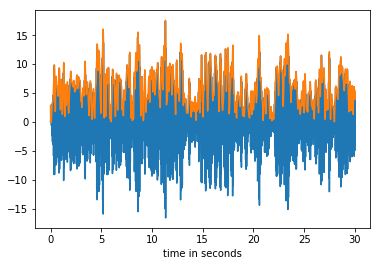

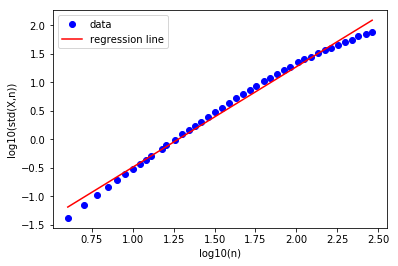

1.7592998963911626


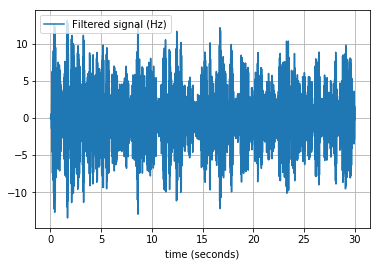

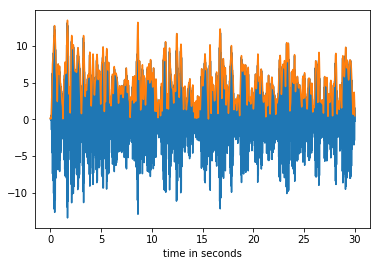

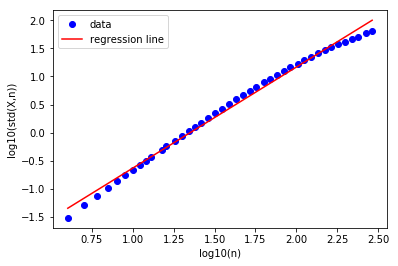

1.7954514597949676


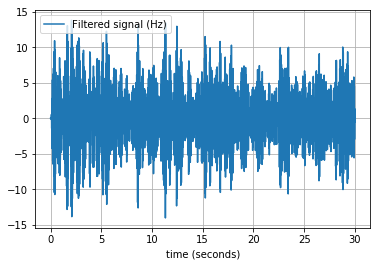

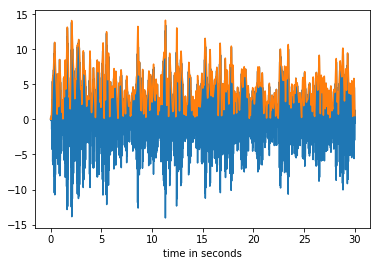

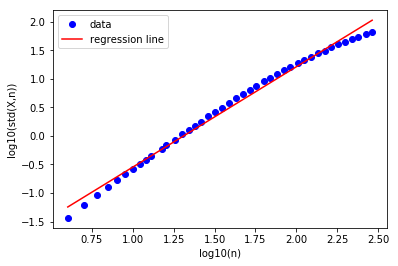

1.756087041296473


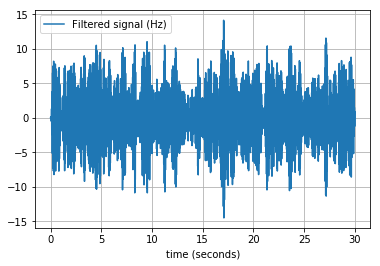

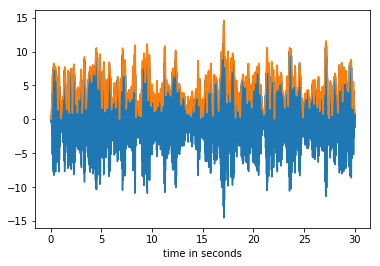

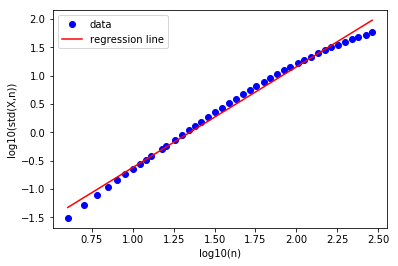

1.773394060526933


In [12]:
# from scipy.signal import fftconvolve, lfilter, firwin
from scipy.signal import butter, sosfilt, sosfreqz, hilbert

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y
    
T = 30
fs = 250
lowcut = 8
highcut = 12
for channel in CHANNEL_NAMES:
    x = data[channel][:15000]
    t = np.linspace(0, T, len(x), endpoint=False)

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=5)

    plt.figure()
    plt.plot(t, y, label='Filtered signal (Hz)')
    plt.xlabel('time (seconds)')
    # plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.legend(loc='upper left')

    signal = y
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)

    fig = plt.figure()
    plt.plot(t, signal, label='signal')
    plt.plot(t, amplitude_envelope, label='envelope')
    plt.xlabel("time in seconds")
    plt.show()

    from lib.nolds.nolds import measures
    nvals = measures.logarithmic_n(4, 300, 1.1)
    print(measures.dfa(amplitude_envelope, nvals=nvals, debug_plot=True, overlap=True))
    plt.show()

In [3]:
def bar_bands(x):
    fs = 256                                # Sampling rate (512 Hz)

    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(x))

    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(x), 1.0/fs)

    # Define EEG bands
    eeg_bands = {'Delta': (0, 4),
                 'Theta': (4, 8),
                 'Alpha': (8, 12),
                 'Beta': (12, 30),
                 'Gamma': (30, 45)}

    # Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

    # Plot the x (using pandas here cause it's easy)
    import pandas as pd
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EEG band")
    ax.set_ylabel("Mean band Amplitude")
    plt.show()

for file in files_builder(DataKind('processed')):
    bar_bands(file.df['FP1'][:15000])

NameError: name 'files_builder' is not defined